# Exploratory Data Analysis Project Group 8

**Genre and MBTI - Xiaotong 'Brandon' Ma**

**Time-series and MBTI - Sai Nandini**

**Geographic and MBTI - Xuhui 'Daniel' Zhan**

**MBTI and Scores - Yitian 'Ewan' Long**

**Other part - Shared responsibility**

## Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import matplotlib as mpl
import plotly.graph_objects as go
import os

## Data Import and Clean

This section's goal is to import different data sheet and clean them to make them meet our expectation of data and be ready for merging.

### mbti data sheet

In [3]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# MBTI data import
df_mbti = pd.read_csv("./data/raw/mbti.csv")

# Drop unrelated comlumns "stat", "enneagram", "img_url"
df_mbti = df_mbti.drop(["stat","enneagram","img_url"],axis = 1)

# Drop duplicated rows
df_mbti = df_mbti.drop_duplicates()

# Check if there is any NaN value or abnormal values in mbti columns 
print(df_mbti["mbti"].unique())
print(df_mbti["mbti"].isna().any())

# Drop the rows are "XXXX" (which is not a mbti type)
df_mbti = df_mbti[df_mbti["mbti"]!= "XXXX"]

# Make sure first letters are capitalized in "role" and "movie" columns
df_mbti["role"] = df_mbti["role"].str.title()
df_mbti["movie"] = df_mbti["movie"].str.title()

# Use str.strip() to remove spaces.
df_mbti["movie"] = df_mbti["movie"].str.strip()

# Regular expression pattern for extracting year: '(.*) \((\d{4})\)'
pattern_year = r'(.*) \((\d{4})\)'

# Extract movies with year
# Save the year into "release_year" columns
df_mbti[['movie_clean', 'release_year']] = df_mbti['movie'].str.extract(pattern_year)

# Regular expression pattern to match content in parentheses
pattern_parentheses = r'\s*\([^)]*\)'

# Remove content in parentheses
# Save movie names without parentheses into "movie_clean" columns
df_mbti['movie_clean'] = df_mbti['movie'].str.replace(pattern_parentheses, '', regex=True)

# Convert "release_year" column to datetime
df_mbti['release_year'] = pd.to_datetime(df_mbti['release_year'], format = '%Y').dt.year

# Drop "movie_name" column
df_mbti.drop("movie",axis=1, inplace=True)

# Rename columns to have consistency in all data sheets
df_mbti.rename(columns={'role': 'character','movie_clean':'movie_name'}, inplace=True)

df_mbti.to_csv("./data/cleaned/df_mbti.csv")

df_mbti.info()

['ESFP' 'XXXX' 'ESFJ' 'ESTP' 'ESTJ' 'ENFP' 'ENFJ' 'ENTP' 'ENTJ' 'ISFP'
 'ISFJ' 'ISTP' 'ISTJ' 'INFP' 'INFJ' 'INTP' 'INTJ']
False
<class 'pandas.core.frame.DataFrame'>
Index: 16727 entries, 0 to 18740
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbti          16727 non-null  object 
 1   character     16727 non-null  object 
 2   movie_name    16727 non-null  object 
 3   release_year  10939 non-null  float64
dtypes: float64(1), object(3)
memory usage: 653.4+ KB


In [4]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

df_mbti.sample(10)

mbti      character                 movie_name  release_year
11     ESFP   Marla Singer                 Fight Club        1999.0
6453   ENFP     Nick Lopez                     Planes        2013.0
568    ESFP   Palmer Dodge            Just Go With It        2011.0
1647   ESFJ    Rhomann Dey  Marvel Cinematic Universe           NaN
7307   ENFJ  Olivia Barron              Truth Or Dare           NaN
10658  ISFP        Moocher              Breaking Away        1979.0
10636  ISFP     Eva Ansley                 Just Mercy        2019.0
9027   ENTJ    Major Rocha             Tropa De Elite           NaN
1119   ESFP    Chris Smith                 Killer Joe        2011.0
4296   ESTJ  Lucius Malfoy               Harry Potter           NaN

### imdb_movies

In [5]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# imdb_movies data import
df_imdb_map = pd.read_csv("./data/raw/imdb_movies.csv")

# Drop unrelated comlumns "stat", "enneagram", "img_url"
df_imdb_map = df_imdb_map.drop(["overview","crew","orig_title","status","orig_lang"],axis = 1)

# Drop duplicated rows
df_imdb_map = df_imdb_map.drop_duplicates()

# Check if there is any NaN value in "names" columns 
print(df_imdb_map["names"].isna().any())

# Make sure first letters are capitalized in "names" and "genre" columns
df_imdb_map["names"] = df_imdb_map["names"].str.title()
df_imdb_map["genre"] = df_imdb_map["genre"].str.title()

# Strip whitespace
df_imdb_map['date_x'] = df_imdb_map['date_x'].str.strip()

# Convert "date_x" column to datetime
df_imdb_map['date_x'] = pd.to_datetime(df_imdb_map['date_x'], format='%m/%d/%Y')

# Create "release_year" column
df_imdb_map['release_year'] = df_imdb_map['date_x'].dt.year.astype('float')

# Rename columns to have consistency in all data sheets
df_imdb_map.rename(columns={'names': 'movie_name', 'date_x': 'release_date','budget_x':'budget'}, inplace=True)

df_imdb_map.to_csv("./data/cleaned/df_imdb_map.csv")

df_imdb_map.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_name    10178 non-null  object        
 1   release_date  10178 non-null  datetime64[ns]
 2   score         10178 non-null  float64       
 3   genre         10093 non-null  object        
 4   budget        10178 non-null  float64       
 5   revenue       10178 non-null  float64       
 6   country       10178 non-null  object        
 7   release_year  10178 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 636.2+ KB


In [6]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

df_imdb_map.sample(10)

movie_name release_date  score  \
7142                                        極道記者2 馬券転生篇   1994-11-19    0.0   
5069                                      Eat Pray Love   2010-10-07   62.0   
1709                                            The Bfg   2016-06-30   62.0   
7005                                         Rogue City   2020-10-30   59.0   
2513  Legend Quest: The Legend Of The Guanajuato Mum...   2014-10-30   79.0   
2144                         My Beautiful Man ～Eternal～   2023-04-07    0.0   
4970                               Hot Tub Time Machine   2010-04-22   60.0   
2395                                      The Lucky One   2012-04-19   71.0   
8381                                    Chinese Grandma   2010-08-26   32.0   
9706                                    Rescued By Ruby   2022-03-17   75.0   

                                             genre       budget      revenue  \
7142                                           NaN  167540000.0  175269998.8   
5069                                Drama, Romance   60000000.0  206598789.0   
1709                    Adventure, Family, Fantasy  140000000.0  199646680.0   
7005                Crime, Thriller, Action, Drama   13000000.0       8573.0   
2513  Animation, Horror, Adventure, Comedy, Family   28859454.6    6300000.0   
2144                                           NaN  167540000.0  175269998.8   
4970            Science Fiction, Comedy, Adventure   36000000.0   65967750.0   
2395                                Drama, Romance   25000000.0   96633833.0   
8381                                 Comedy, Drama    9641000.0   38139010.0   
9706                                 Family, Drama   78800000.0  472878915.2   

     country  release_year  
7142      JP        1994.0  
5069      AU        2010.0  
1709      AU        2016.0  
7005      FR        2020.0  
2513      MX        2014.0  
2144      JP        2023.0  
4970      AU        2010.0  
2395      AU        2012.0  
8381      RU        2010.0  
9706      US        2022.0

### imdb_db

In [7]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

#imdb_db data import
df_db = pd.read_csv("./data/raw/imdb_db.csv")

# Drop unrelated comlumns "Number of Votes","Time Duration (min)","Director","Actors","Restriction","Description","Serie Name","Serie Date"
df_db = df_db.drop(["Number of Votes","Time Duration (min)","Director","Actors","Restriction","Description","Serie Name","Serie Date"],axis = 1)

# Drop duplicated rows
df_db = df_db.drop_duplicates()

# Check if there is any NaN value in "Movie Name" columns 
print(df_db["Movie Name"].isna().any())

# Make sure first letters are capitalized in "Movie Name" and "Movie Type" columns
df_db["Movie Name"] = df_db["Movie Name"].str.title()
df_db["Movie Type"] = df_db["Movie Type"].str.title()

# Remove square brackets in "Movie Type" column
df_db['Movie Type'] = df_db['Movie Type'].str.replace(r'[\[\]]', '', regex=True)

# Remove single quotes in "Movie Type" column
df_db['Movie Type'] = df_db['Movie Type'].str.replace(r"'", '', regex=True)

# Rename columns to have consistency in all data sheets
df_db.rename(columns={'Movie Name': 'movie_name',
                            'Movie Date': 'release_year',
                            'Movie Type':'genre',
                            'Movie Revenue (M$)':'revenue',
                            'Score':'score',
                            'Metascore':'metascore'}, inplace=True)

df_db.to_csv("./data/cleaned/df_db.csv")
df_db.info()

False
<class 'pandas.core.frame.DataFrame'>
Index: 130482 entries, 0 to 189895
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movie_name    130482 non-null  object 
 1   release_year  130477 non-null  float64
 2   genre         130482 non-null  object 
 3   revenue       9082 non-null    float64
 4   score         130482 non-null  float64
 5   metascore     8672 non-null    float64
dtypes: float64(4), object(2)
memory usage: 7.0+ MB


In [8]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

df_db.sample(10)

movie_name  release_year                     genre  revenue  \
150149    Meurtre À L'Esprit        1997.0  Drama, Mystery, Thriller      NaN   
189583          Kolej Havasi        2019.0               Documentary      NaN   
181376     Le Fleuve De Sang        1952.0                     Drama      NaN   
26512               The Bill        1984.0              Crime, Drama      NaN   
50647                   Exit        2018.0                  Thriller      NaN   
188226   The Republic Of Two        2013.0    Comedy, Drama, Romance      NaN   
102846       Nezhnyy Vozrast        2000.0                     Drama      NaN   
157107               Kalifat        2020.0           Drama, Thriller      NaN   
93111       Casey À La Batte        1946.0  Animation, Short, Comedy      NaN   
54175   As If I Am Not There        2010.0                     Drama      NaN   

        score  metascore  
150149    5.4        NaN  
189583    8.9        NaN  
181376    7.4        NaN  
26512     6.5        NaN  
50647     6.1        NaN  
188226    5.1        NaN  
102846    7.3        NaN  
157107    8.3        NaN  
93111     6.9        NaN  
54175     7.3        NaN

In [9]:
#combined_dataset = pd.merge(df_imdb_map, df_db, on=['movie_name','release_year'], how='outer')
#combined_dataset.info()

### Merge df_db and df_mbti

In [10]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

# Split df_mbti into two datasets: one where release_year is not null and one where it is null
df_mbti_with_year = df_mbti[df_mbti['release_year'].notnull()]
df_mbti_no_year = df_mbti[df_mbti['release_year'].isnull()]

# Drop release_year for merge
df_mbti_no_year.drop('release_year', inplace=True, axis=1)

# Merge the datasets based only on 'movie_name' for those without a release year
merged_no_year = pd.merge(df_mbti_no_year, df_db, on='movie_name', how='inner')

# Drop abnormal rows (there are multiple matches from the imdb_db dataset which we don't know they are correct or not)
merged_no_year.drop_duplicates(subset=['movie_name','character'],keep = 'first',inplace=True)

# Merge the datasets based on 'movie_name_clean' and 'release_year' for those with a release year
merged_with_year = pd.merge(df_mbti_with_year, df_db, on=['movie_name', 'release_year'], how='inner')

# Drop abnormal rows (there are multiple matches from the imdb_db dataset which we don't know they are correct or not)
merged_with_year.drop_duplicates(subset=['movie_name','character','release_year'],keep = 'first',inplace=True)

# Combine the two merged datasets
final_merged_df = pd.concat([merged_with_year, merged_no_year])

# Display the first few rows of the final merged dataset
final_merged_df.sort_values(['movie_name','mbti'])

/var/folders/zq/p2d6bynj3zzdl_5hz8cv2qqr0000gn/T/ipykernel_25475/4040145265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbti_no_year.drop('release_year', inplace=True, axis=1)


mbti          character     movie_name  release_year  \
349   ENFP             Regina  12 Hour Shift        2020.0   
347   ESFP      Officer Myers  12 Hour Shift        2020.0   
348   ESTP          Jefferson  12 Hour Shift        2020.0   
350   INFJ              Mandy  12 Hour Shift        2020.0   
352   ENTP  Benjamin Franklin           1776        1972.0   
...    ...                ...            ...           ...   
600   INTP           Columbus     Zombieland        2013.0   
601   INTP          Flagstaff     Zombieland        2013.0   
597   ISFP        Little Rock     Zombieland        2013.0   
598   ISTP        Tallahassee     Zombieland        2013.0   
2602  ISTP           Æon Flux       Æon Flux        1991.0   

                             genre    revenue  score  metascore  
349       Comedy, Horror, Thriller        NaN    5.3       63.0  
347       Comedy, Horror, Thriller        NaN    5.3       63.0  
348       Comedy, Horror, Thriller        NaN    5.3       63.0  
350       Comedy, Horror, Thriller        NaN    5.3       63.0  
352         Drama, Family, History  6104000.0    7.6        NaN  
...                            ...        ...    ...        ...  
600      Adventure, Comedy, Horror        NaN    5.9        NaN  
601      Adventure, Comedy, Horror        NaN    5.9        NaN  
597      Adventure, Comedy, Horror        NaN    5.9        NaN  
598      Adventure, Comedy, Horror        NaN    5.9        NaN  
2602  Animation, Adventure, Sci-Fi        NaN    7.8        NaN  

[2811 rows x 8 columns]

In [11]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2811 entries, 0 to 2646
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbti          2811 non-null   object 
 1   character     2811 non-null   object 
 2   movie_name    2811 non-null   object 
 3   release_year  2811 non-null   float64
 4   genre         2811 non-null   object 
 5   revenue       384 non-null    float64
 6   score         2811 non-null   float64
 7   metascore     483 non-null    float64
dtypes: float64(4), object(4)
memory usage: 197.6+ KB


In [12]:
# Coded by Xiatong. Reviewed, tested and corrected by Daniel, Yitian, and Sai Nandini.

final_merged_df.sample(10)

mbti             character      movie_name  release_year  \
371   ENFP               Griffin    Men In Black        1934.0   
440   ENTP                Bombur      The Hobbit        1966.0   
1782  INTJ  Klimek 'The General'    The Informer        1929.0   
703   ISFJ              Ben King        Plus One        2019.0   
142   ENTP                 Lance    Pulp Fiction        1994.0   
277   ESTJ            The Monkey       Toy Story        1996.0   
1495  ESTP                 Ammer           Click        2010.0   
1165  ESFP                Nathan     Dear Nathan        2017.0   
1055  ISFP         Shin Godzilla        Godzilla        1956.0   
1139  ENTP                  John  The Babysitter        1995.0   

                          genre      revenue  score  metascore  
371               Comedy, Short          NaN    7.9        NaN  
440   Animation, Short, Fantasy          NaN    4.5        NaN  
1782                      Drama          NaN    7.0        NaN  
703      Comedy, Drama, Romance          NaN    6.6       65.0  
142                Crime, Drama  107928762.0    8.9       94.0  
277   Action, Adventure, Family          NaN    7.4        NaN  
1495     Drama, Horror, Mystery          NaN    3.5        NaN  
1165             Drama, Romance          NaN    7.0        NaN  
1055     Action, Horror, Sci-Fi          NaN    6.5       60.0  
1139            Drama, Thriller          NaN    4.3        NaN

In [13]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong.

final_merged_df.head()

mbti                  character movie_name  release_year           genre  \
0  ESFP                Jack Dawson    Titanic        1997.0  Drama, Romance   
1  ESTP               Brock Lovett    Titanic        1997.0  Drama, Romance   
2  ESTP  Fifth Officer Harold Lowe    Titanic        1997.0  Drama, Romance   
3  ESTJ      Caledon "Cal" Hockley    Titanic        1997.0  Drama, Romance   
4  ESTJ                Bruce Ismay    Titanic        1997.0  Drama, Romance   

       revenue  score  metascore  
0  659325379.0    7.8       75.0  
1  659325379.0    7.8       75.0  
2  659325379.0    7.8       75.0  
3  659325379.0    7.8       75.0  
4  659325379.0    7.8       75.0

In [14]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong.

# Converting the final dataset into csv file
final_merged_df.to_csv("./data/cleaned/df_merged.csv", index = False)


## Genre and MBTI - Xiaotong 'Brandon' Ma

In [15]:
df_mbti_genre = final_merged_df.copy()

# Since a movie can belong to multiple genres, we need to split the genre field and then explode it
df_mbti_genre['genre'] = df_mbti_genre['genre'].str.split(', ')

# Exploding the dataframe on the 'genre' column
df_mbti_genre = df_mbti_genre.explode('genre')

# Counting the number of each MBTI type across all movies, grouped by genre
mbti_count_by_genre = df_mbti_genre.groupby(['genre', 'mbti']).size().reset_index(name='count')

# Group by 'genre' and filter based on the sum of 'count'
mbti_count_by_genre = mbti_count_by_genre.groupby('genre').filter(lambda x: x['count'].sum() >= 100)

# Calculate the distribution based on normalization on genre
mbti_count_by_genre["total_count_each_genre"] = mbti_count_by_genre.groupby("genre")["count"].transform('sum')
mbti_count_by_genre["mbti_by_genre_proportion"] = mbti_count_by_genre["count"] / mbti_count_by_genre["total_count_each_genre"] * 100

# Calculate the distribution based on normalization both on genre and mbti
mbti_count_by_genre["total_count_each_mbti"] = mbti_count_by_genre.groupby("mbti")["mbti_by_genre_proportion"].transform('sum')
mbti_count_by_genre["genre_by_mbti_proportion"] = mbti_count_by_genre["mbti_by_genre_proportion"] / mbti_count_by_genre["total_count_each_mbti"] * 100

In [16]:
# Take a look
mbti_count_by_genre.sample(10)

genre  mbti  count  total_count_each_genre  mbti_by_genre_proportion  \
270     Sci-Fi  ESFJ      8                     360                  2.222222   
319   Thriller  ESTJ     10                     199                  5.025126   
243    Mystery  ISTJ     15                     187                  8.021390   
15      Action  ISTP    104                    1124                  9.252669   
187     Horror  ESFP     23                     285                  8.070175   
132     Family  ESFP     35                     382                  9.162304   
118      Drama  ESTP     63                     883                  7.134768   
285      Short  ENTP     18                     225                  8.000000   
23   Adventure  ESTP     83                    1048                  7.919847   
278     Sci-Fi  ISFJ     35                     360                  9.722222   

     total_count_each_mbti  genre_by_mbti_proportion  
270              63.093498                  3.522110  
319             105.041659                  4.783936  
243             104.064145                  7.708121  
15              102.121253                  9.060473  
187             106.784391                  7.557449  
132             106.784391                  8.580190  
118             121.417430                  5.876230  
285              81.098939                  9.864494  
23              121.417430                  6.522826  
278             107.487900                  9.044946

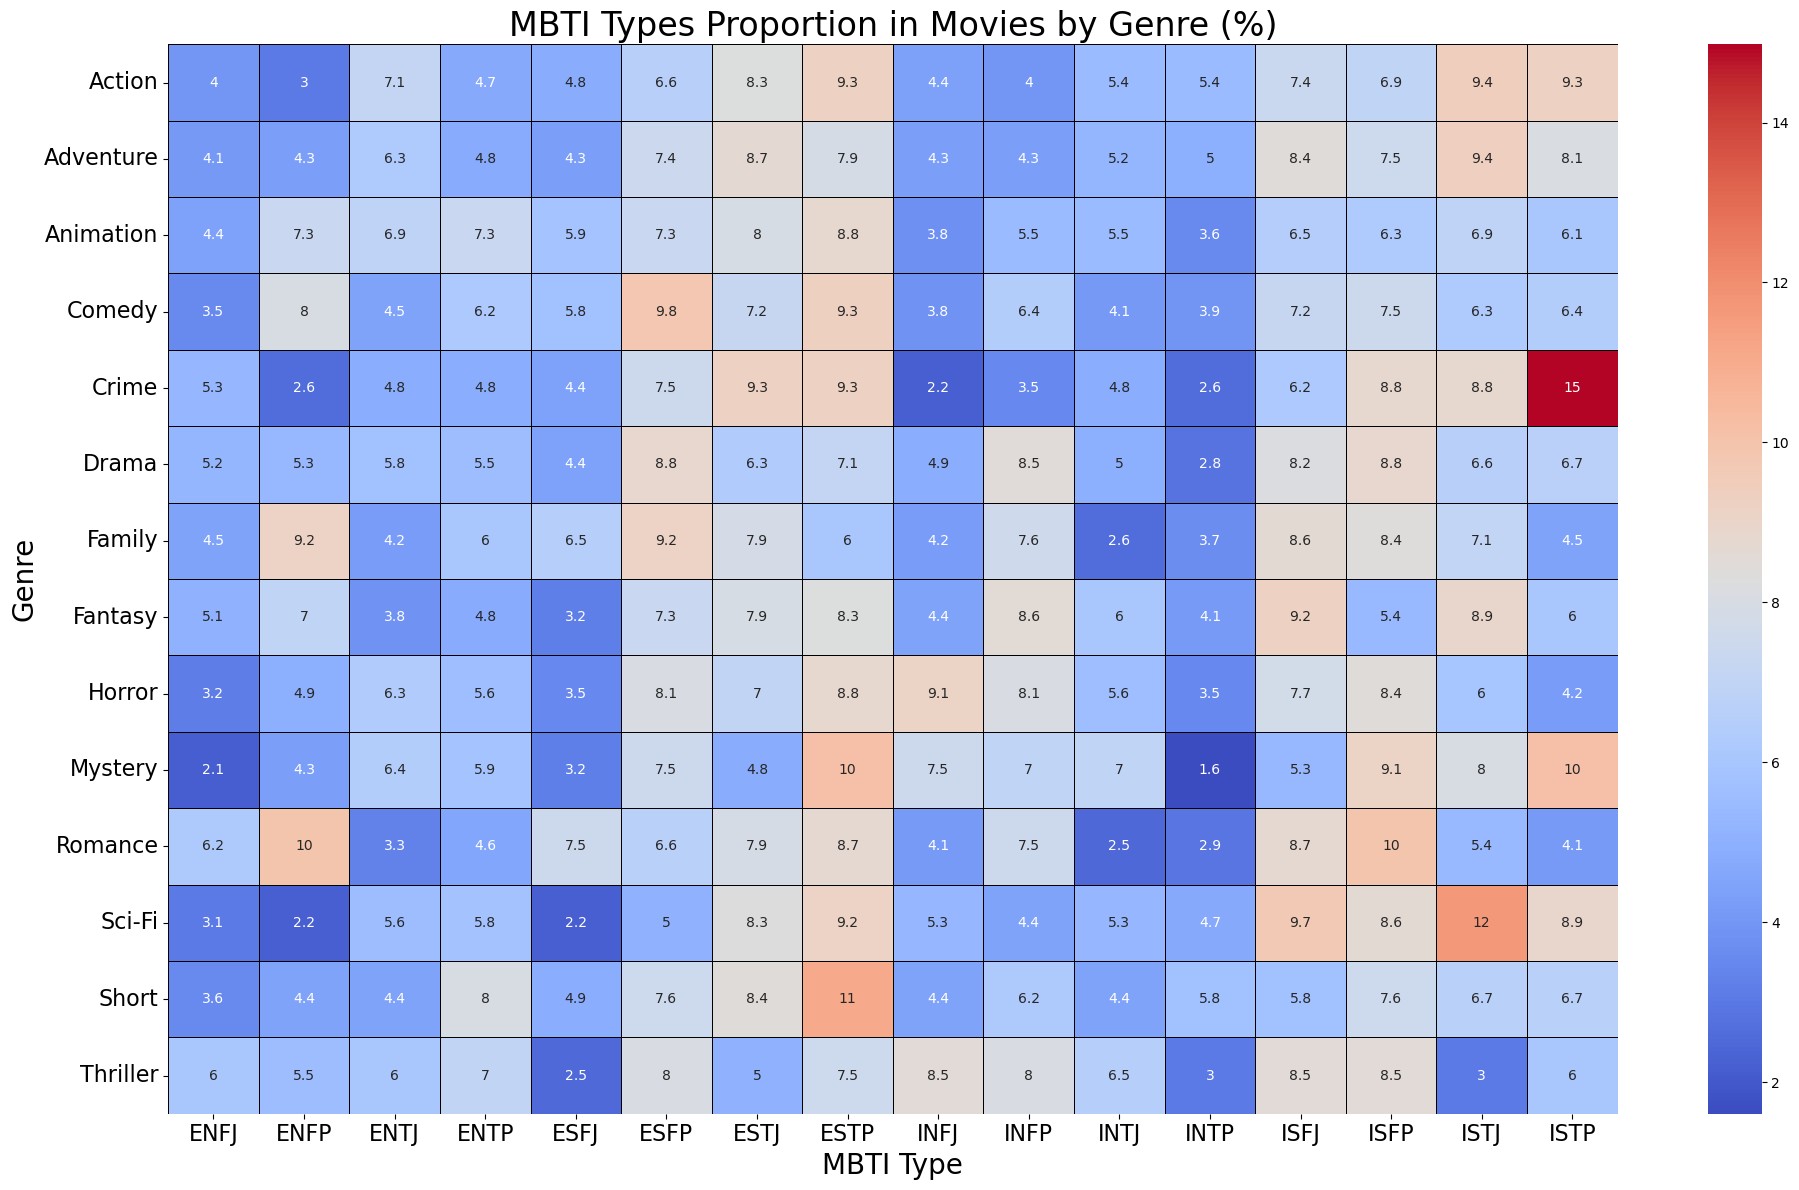

In [17]:
# Creating a pivot table for better plotting
pivot_table = mbti_count_by_genre.pivot_table(index='genre', columns='mbti', values='mbti_by_genre_proportion', fill_value=0)

# Convert counts to integers for better formatting in the heatmap
pivot_table = pivot_table.astype(float)

# Your existing code for creating the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title('MBTI Types Proportion in Movies by Genre (%)', fontsize=24)
plt.ylabel('Genre', fontsize=20)
plt.xlabel('MBTI Type', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/Genre/mbti_genre.png", dpi=300)  # Increase the dpi for better quality

# Show the plot
plt.show()

In [18]:
# Label four demensions
mbti_count_by_genre["I-E"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "INTJ", "ISTP", "INTP", "ISFJ", "INFJ", "ISFP", "INFP"])
mbti_count_by_genre["I-E"] = mbti_count_by_genre["I-E"].replace({True: 'Introverts', False: 'Extroverts'})

mbti_count_by_genre["S-N"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISTP", "ISFJ", "ISFP", "ESTJ", "ESTP", "ESFJ", "ESFP"])
mbti_count_by_genre["S-N"] = mbti_count_by_genre["S-N"].replace({True: 'Sensing', False: 'Intuition'})

mbti_count_by_genre["T-F"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISTP", "INTJ", "INTP", "ESTJ", "ESTP", "ENTJ", "ENTP"])
mbti_count_by_genre["T-F"] = mbti_count_by_genre["T-F"].replace({True: 'Thinking', False: 'Feeling'})

mbti_count_by_genre["J-P"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISFJ", "INTJ", "INFJ", "ESTJ", "ESFJ", "ENTJ", "ENFJ"])
mbti_count_by_genre["J-P"] = mbti_count_by_genre["J-P"].replace({True: 'Judging', False: 'Perceving'})

In [19]:
# Function to plot MBTI demensions and genre
def plot_mbti_proportions_genre(data, category, file_name, colors=("lightblue", "lightcoral")):
    """
    Function to plot MBTI proportions by genre, grouped by a specified MBTI category, with customizable colors.

    Parameters:
    data (DataFrame): The dataset containing MBTI information.
    category (str): The MBTI category to group by. Options: 'I-E', 'S-N', 'T-F', 'J-P'.
    filename (str): The filename assigned for local file
    colors (tuple): A tuple of two color values for the plot.
    """
    # Grouping the data by 'genre' and the specified category, summing 'mbti_by_genre_proportion'
    grouped_data = data.groupby(['genre', category])['mbti_by_genre_proportion'].sum().reset_index()

    # Plotting with the specified colors
    plt.figure(figsize=(20, 10))
    sns.barplot(x='genre', y='mbti_by_genre_proportion', hue=category, data=grouped_data, palette=colors)
    plt.title(f'Sum of MBTI Proportion in Each Genre Grouped by {category}', fontsize=24)
    plt.xticks(fontsize = 16)
    plt.yticks(rotation=0, fontsize=16) 
    plt.ylabel('MBTI Proportion (%)', fontsize=20)
    plt.xlabel('Genre', fontsize=20)
    plt.legend(title=category, fontsize = 14)
    plt.tight_layout()

    # Saving the plot to a file
    file_path = f"./images/Genre/{file_name}.png"
    plt.savefig(file_path)

    # Displaying the plot
    plt.show()

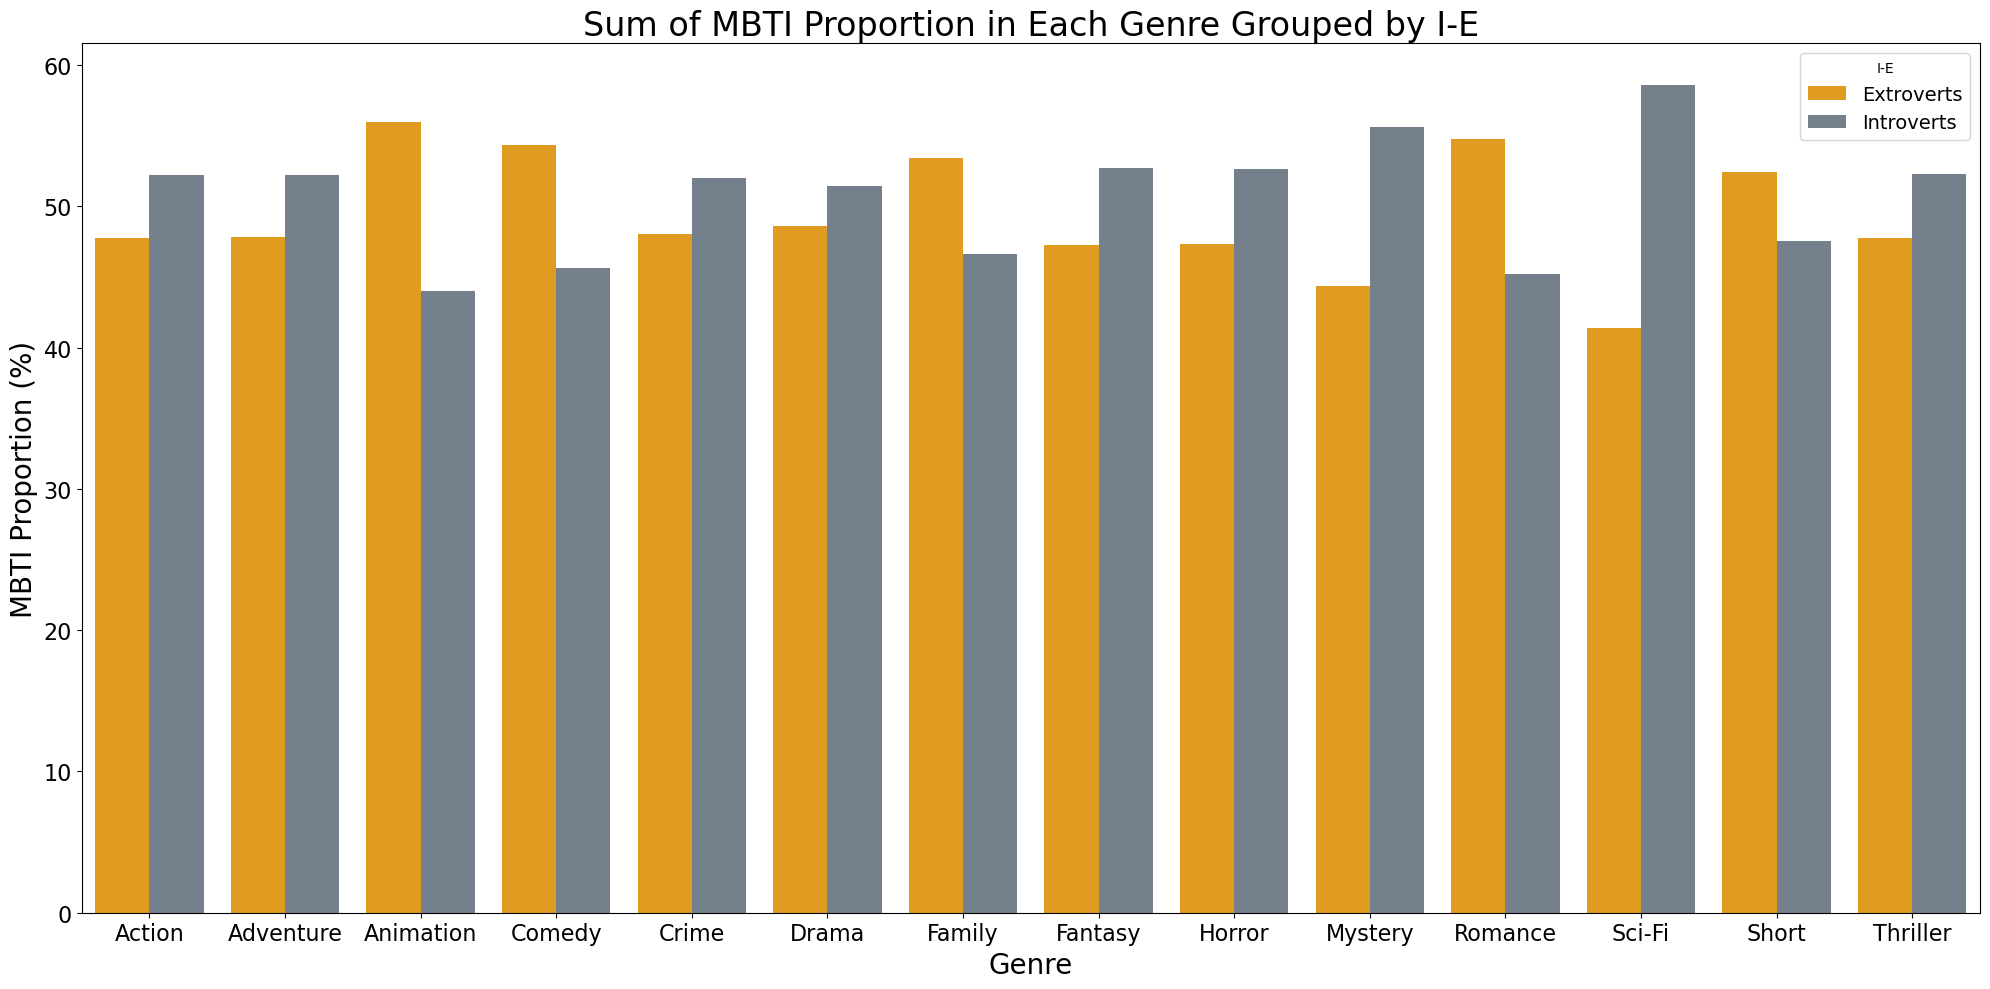

In [20]:
# I-E
plot_mbti_proportions_genre(mbti_count_by_genre, 'I-E',"Sum of MBTI Proportion in Each Genre Grouped by I-E", colors=("#FFA500", "#708090"))  # Custom colors for Introverts and Extroverts

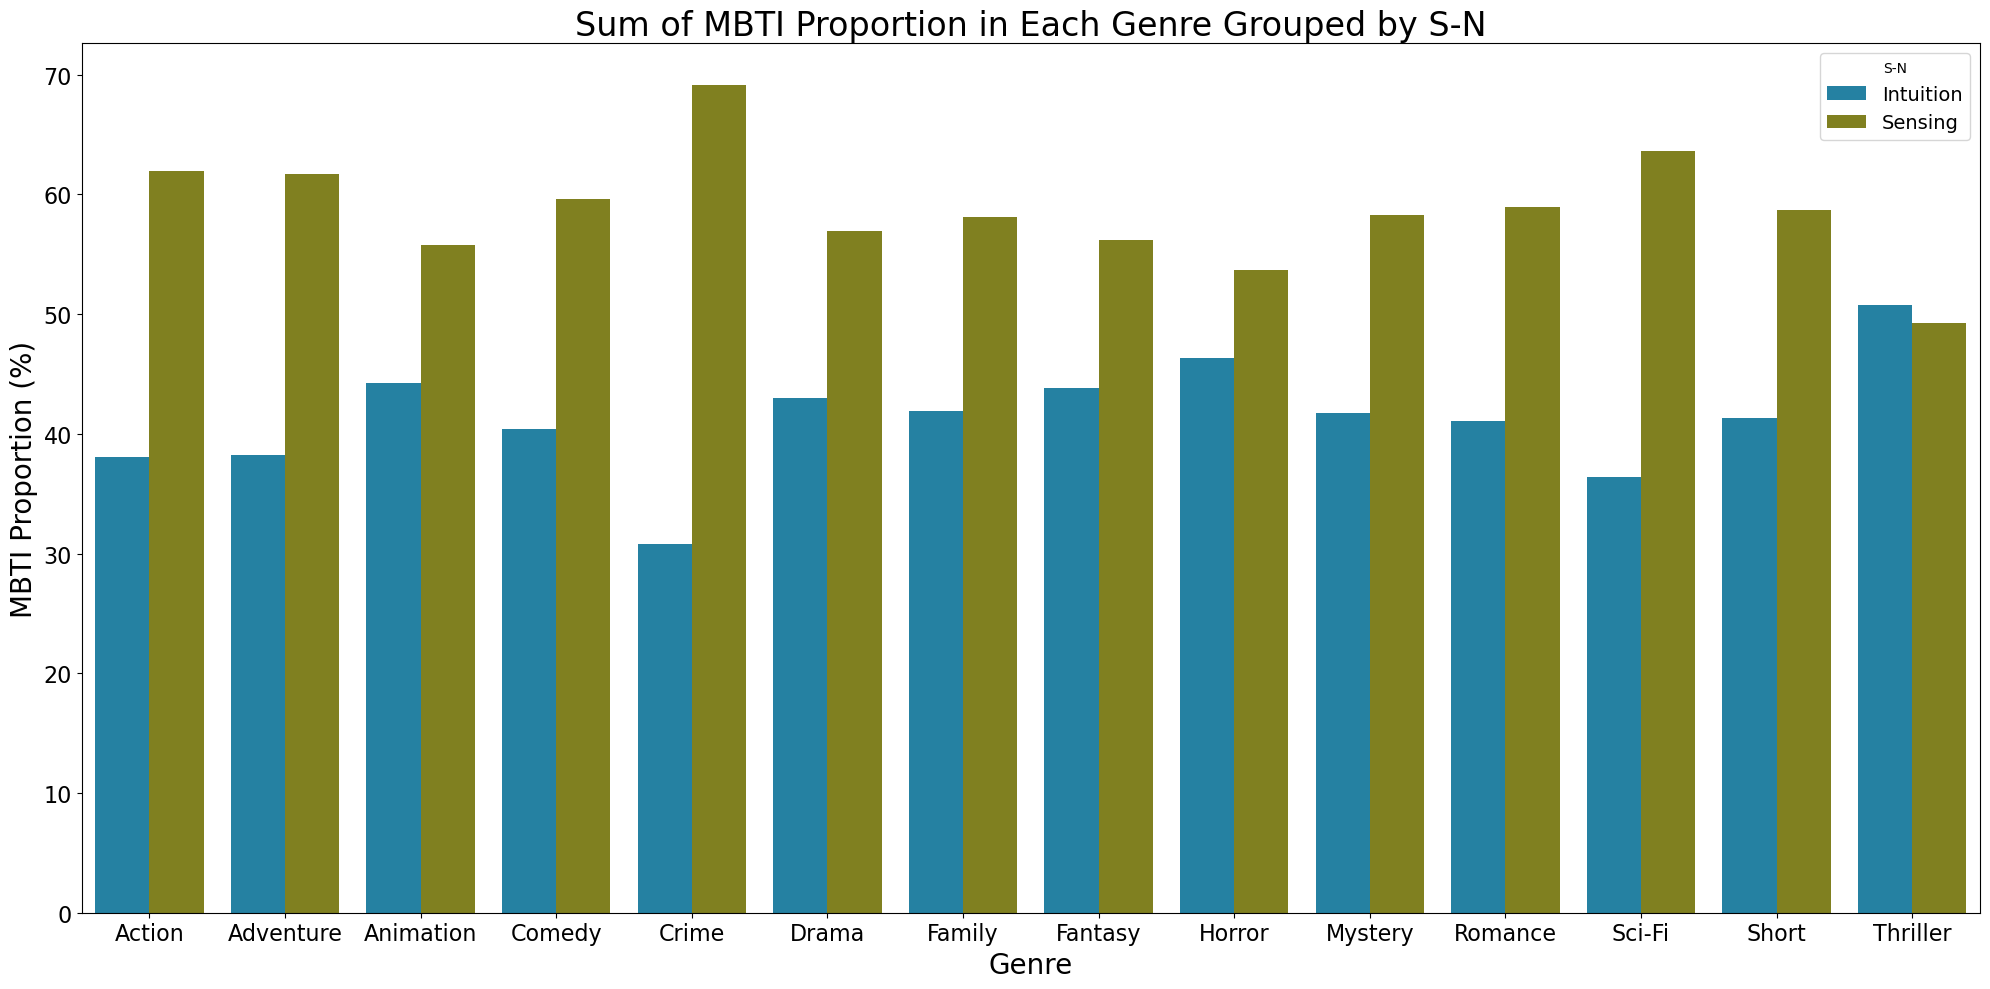

In [21]:
# S-N
plot_mbti_proportions_genre(mbti_count_by_genre, 'S-N',"Sum of MBTI Proportion in Each Genre Grouped by S-N", colors=("#108BB7", "#909010"))

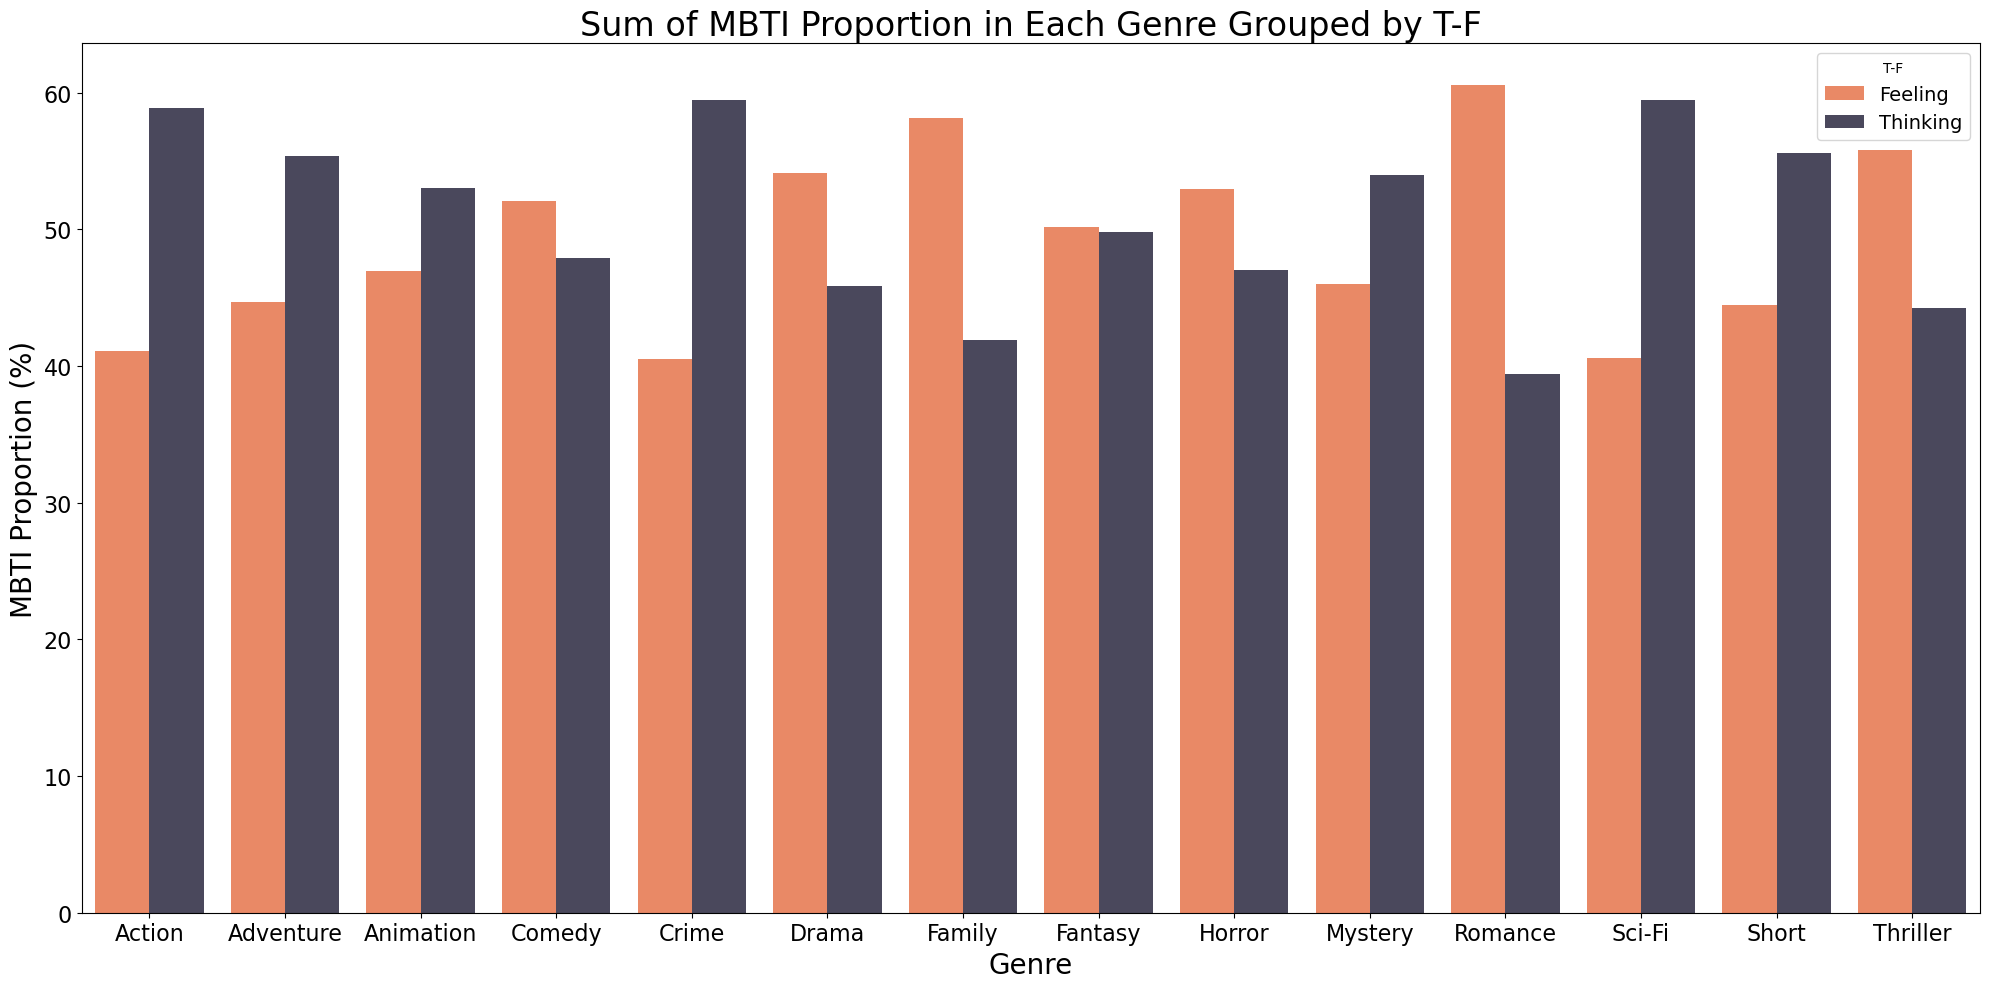

In [22]:
# T-F
plot_mbti_proportions_genre(mbti_count_by_genre, 'T-F',"Sum of MBTI Proportion in Each Genre Grouped by T-F", colors=("#FF7F50", "#47455F"))

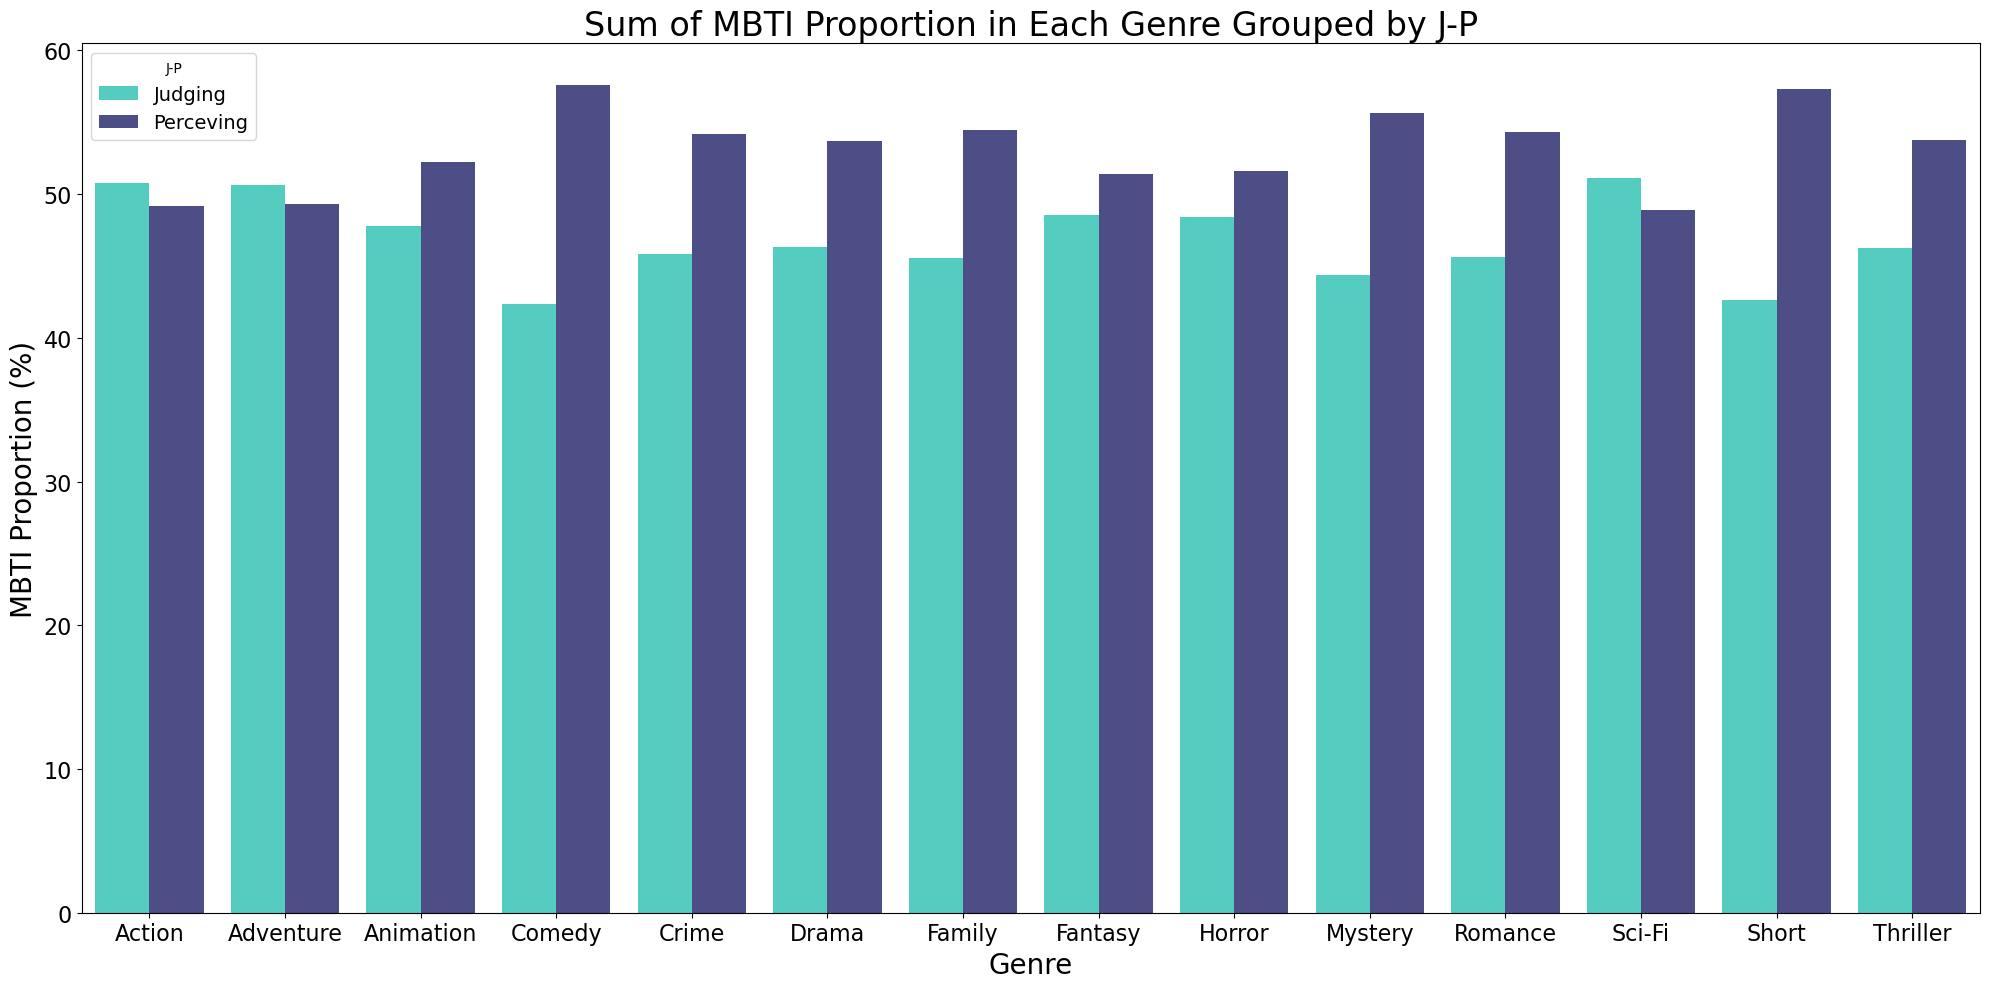

In [23]:
# J-P
plot_mbti_proportions_genre(mbti_count_by_genre, 'J-P',"Sum of MBTI Proportion in Each Genre Grouped by J-P", colors=("#40E0D0", "#444490"))

<Figure size 1800x1000 with 0 Axes>

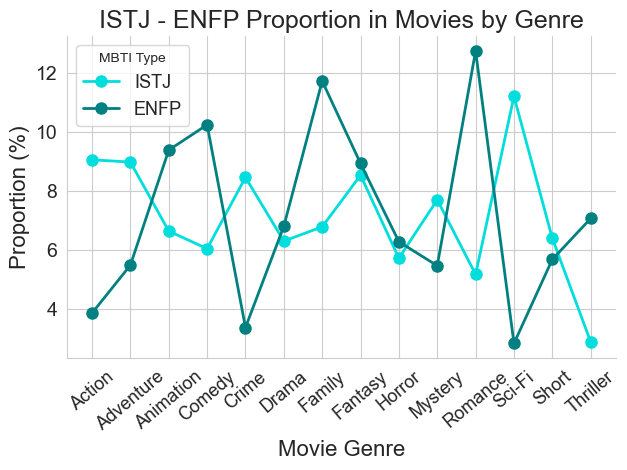

In [24]:
# Filtering for ISTJ and ENFP
filtered_df = mbti_count_by_genre[mbti_count_by_genre['mbti'].isin(['ISTJ', 'ENFP'])]

# Pivoting the DataFrame and reordering columns for correct legend
pivot_df = filtered_df.pivot(index='genre', columns='mbti', values='genre_by_mbti_proportion')
pivot_df = pivot_df[['ISTJ', 'ENFP']]  # Ensuring ISTJ is first and ENFP is second

# Adjusting the plot to make it wider
plt.figure(figsize=(18, 10))  # Increased width
sns.set_style("whitegrid")

# Line plot with wider plot size
ax = pivot_df.plot(kind='line', marker='o', color=['#00DDDD', '#008080'], linewidth=2, markersize=8)

# Customizing the plot with wider size
plt.xlabel('Movie Genre', fontsize=16)
plt.ylabel('Proportion (%)', fontsize=16)
plt.title('ISTJ - ENFP Proportion in Movies by Genre', fontsize=18)
plt.xticks(rotation=40, ticks=range(len(pivot_df.index)), labels=pivot_df.index, fontsize=13)
plt.yticks(fontsize=14)
ax.legend(['ISTJ', 'ENFP'], title='MBTI Type', fontsize=13)
sns.despine()

# Showing the plot with the corrected legend
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/Genre/ISTJ-ENFP_genre.png", dpi=300)  # Increase the dpi for better quality

plt.show()

## Time-series and MBTI - Sai Nandini

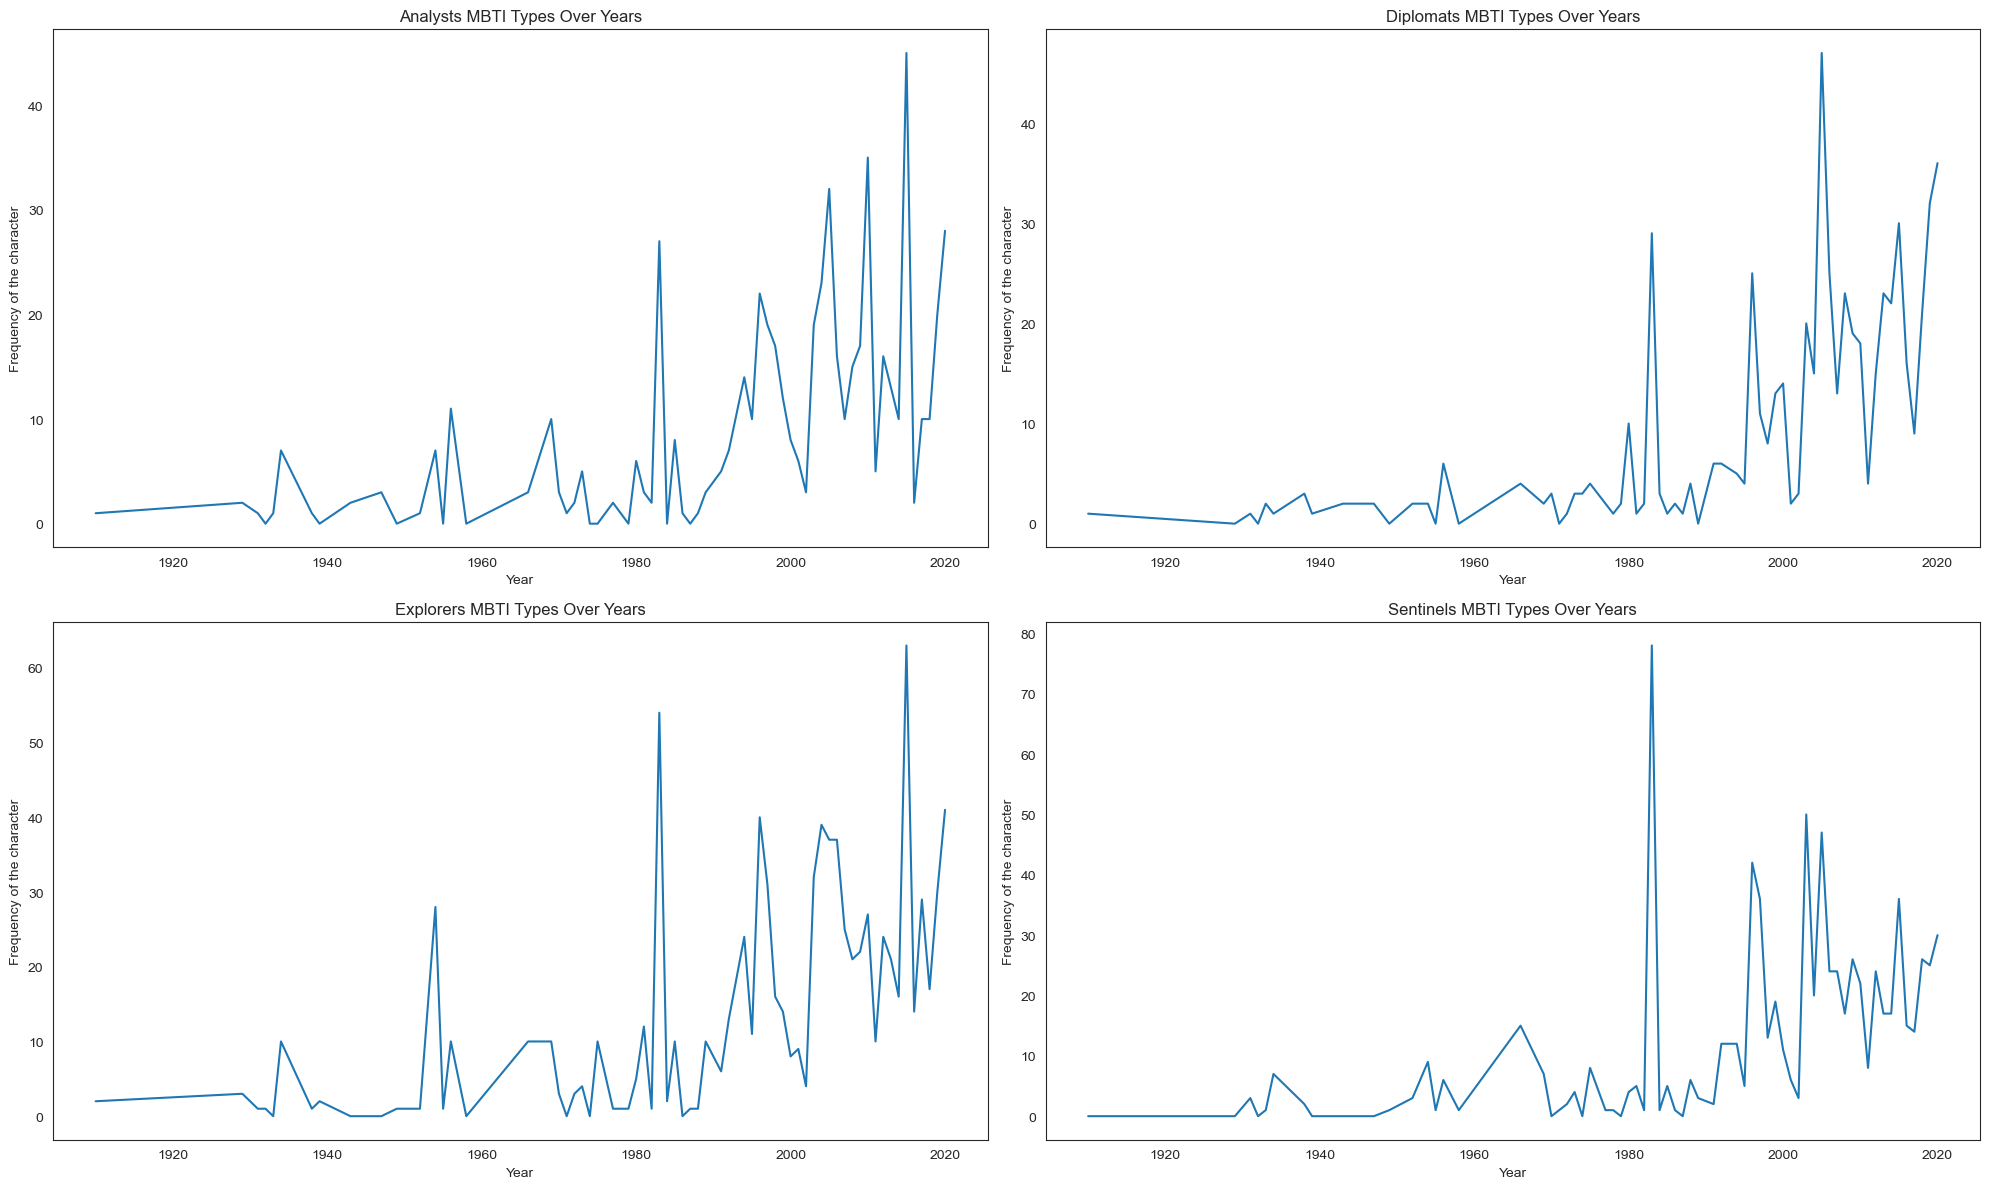

In [25]:
# Read Data
df = pd.read_csv("./data/cleaned/df_merged.csv") # Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong
df.sample(7)

# Frequency of each MBTI type over the years
# The 4 main types from the 16personalities website are: Analysts, Diplomats, Sentinels, Explorers
# Mapping the MBTI types to the main types as per the 16personalities classification
mbti_mapping = {
    'INTJ': 'Analysts', 'INTP': 'Analysts', 'ENTJ': 'Analysts', 'ENTP': 'Analysts',
    'INFJ': 'Diplomats', 'INFP': 'Diplomats', 'ENFJ': 'Diplomats', 'ENFP': 'Diplomats',
    'ISTJ': 'Sentinels', 'ISFJ': 'Sentinels', 'ESTJ': 'Sentinels', 'ESFJ': 'Sentinels',
    'ISTP': 'Explorers', 'ISFP': 'Explorers', 'ESTP': 'Explorers', 'ESFP': 'Explorers'
}

# Adding a column for the main type
df['main_type'] = df['mbti'].map(mbti_mapping)

# Grouping by year and main type, then counting the occurrences
year_main_type_counts = df.groupby(['release_year', 'main_type']).size().unstack(fill_value=0)

# Plotting time series for each main type
plt.figure(figsize=(20, 12))
sns.set_style("white")

for i, main_type in enumerate(year_main_type_counts.columns):
    plt.subplot(2, 2, i+1)
    sns.lineplot(data=year_main_type_counts[main_type])
    plt.title(f'{main_type} MBTI Types Over Years')
    plt.xlabel('Year')
    plt.ylabel('Frequency of the character')

plt.tight_layout()
plt.savefig("./images/TimeSeries/mbti_years.png")  # Save the graph as an image file
plt.show()


### Average Movie Score by Year

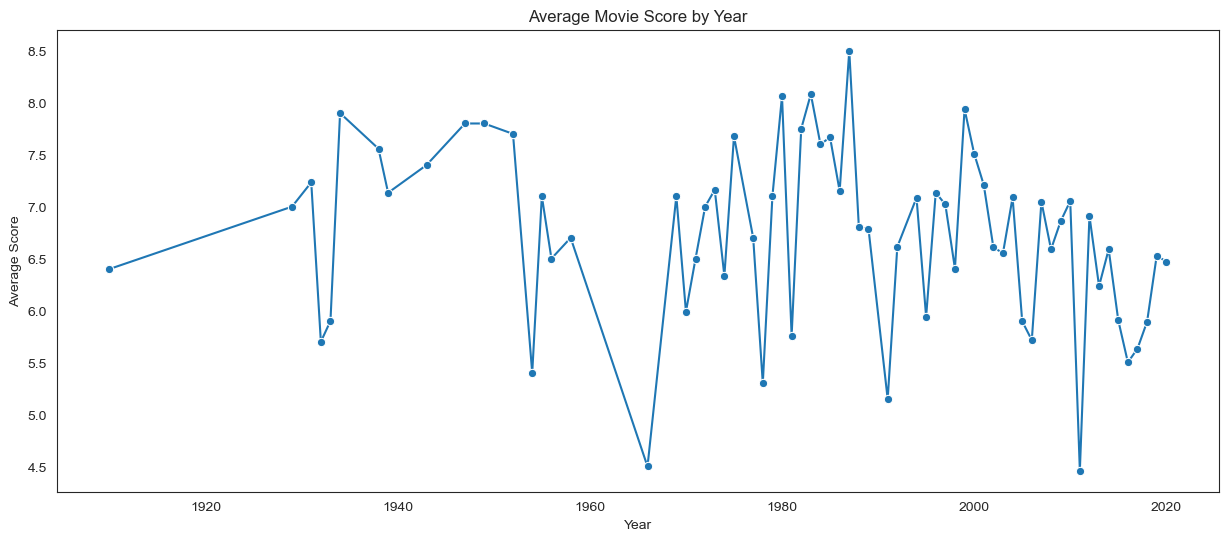

In [26]:
# Average Movie Score by Year
# Calculating the average movie score by year
average_score_by_year = df.groupby('release_year')['score'].mean()

# Creating the plot using seaborn
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=average_score_by_year, marker='o', ax=ax)

ax.set_title('Average Movie Score by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Score')
#plt.savefig('./images/Time-Series/score_years.png')  # Save the graph as an image file

plt.show()

### Annual Movie Revenue Trend - Line Chart

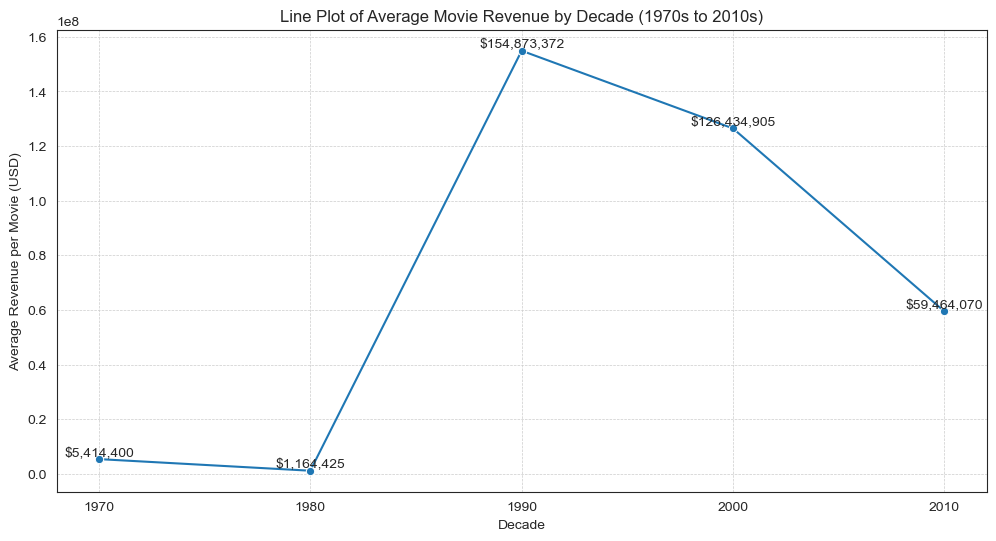

In [27]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong 
# Create a new column 'decade' that groups the 'release_year' into decades
df['decade'] = (df['release_year'] // 10) * 10

# Filter the data to include only the years from 1970 to 2010
df_filtered = df[(df['decade'] >= 1970) & (df['decade'] <= 2010)]

# Calculate the average revenue per movie for each decade
average_revenue_per_movie_decade = df_filtered.groupby('decade')['revenue'].mean()

# Replace NaN or infinite values with zero
average_revenue_per_movie_decade.replace([np.inf, -np.inf], np.nan, inplace=True)
average_revenue_per_movie_decade.fillna(0, inplace=True)

# Plotting the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_revenue_per_movie_decade, marker='o', linestyle='-')

# Annotate each point with its value
for x, y in zip(average_revenue_per_movie_decade.index, average_revenue_per_movie_decade.values):
    plt.text(x, y, f'${y:,.0f}', ha='center', va='bottom')

plt.title('Line Plot of Average Movie Revenue by Decade (1970s to 2010s)')
plt.xlabel('Decade')
plt.ylabel('Average Revenue per Movie (USD)')
plt.xticks(average_revenue_per_movie_decade.index)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('./images/TimeSeries/revenue_decade.png')  # Save the graph as an image file
plt.show()

### Selecting the top 5 MBTI types for the bump chart

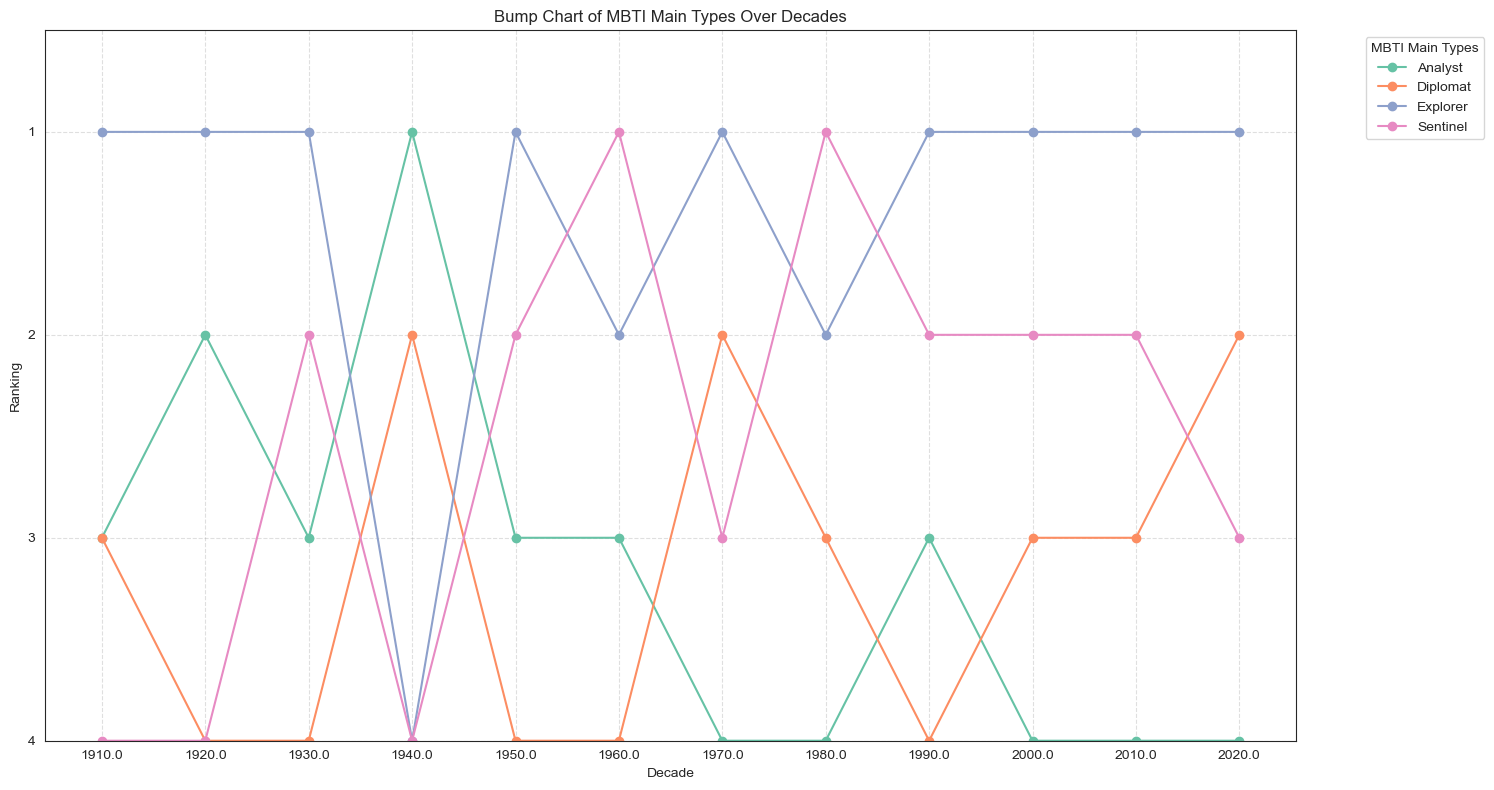

In [28]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong. 
# Mapping MBTI types to main types and creating a 'decade' column
main_type_mapping = {
    'Analyst': ['INTJ', 'INTP', 'ENTJ', 'ENTP'],
    'Diplomat': ['INFJ', 'INFP', 'ENFJ', 'ENFP'],
    'Sentinel': ['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ'],
    'Explorer': ['ISTP', 'ISFP', 'ESTP', 'ESFP']
}
mbti_to_main = {mbti: main for main, mbtis in main_type_mapping.items() for mbti in mbtis}
df['main_type'] = df['mbti'].map(mbti_to_main)
df['decade'] = (df['release_year'] // 10) * 10

# Grouping by decade and main type, then counting occurrences
decade_main_type_counts = df.groupby(['decade', 'main_type']).size().unstack(fill_value=0)

# Calculate the rankings for each main type per decade
rankings = decade_main_type_counts.rank(axis=1, method='max', ascending=False)

# Setting up the figure for the bump chart
fig, ax = plt.subplots(figsize=(15, 8))

# Color palette for the lines
colors = sns.color_palette("Set2", len(rankings.columns))

# Plotting each main type with a unique color and marker
for i, main_type in enumerate(rankings.columns):
    ax.plot(rankings.index, rankings[main_type], label=main_type, marker='o', color=colors[i], linestyle='-')

# Setting the y-axis to show rankings with a reversed order so 1 is at the top
ax.set_ylim(len(rankings.columns), 0.5)
ax.set_yticks(range(1, len(rankings.columns) + 1))
ax.set_yticklabels(range(1, len(rankings.columns) + 1))

# Setting the x-axis to show decades
ax.set_xticks(rankings.index)
ax.set_xticklabels(rankings.index)

# Grid and title settings
ax.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.set_title('Bump Chart of MBTI Main Types Over Decades')
ax.set_xlabel('Decade')
ax.set_ylabel('Ranking')

# Legend outside the plot
ax.legend(title='MBTI Main Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('./images/TimeSeries/MBTI_Decades.png')  # Save the graph as an image file
plt.show()



### Selecting the top 5 MBTI types for the slope chart

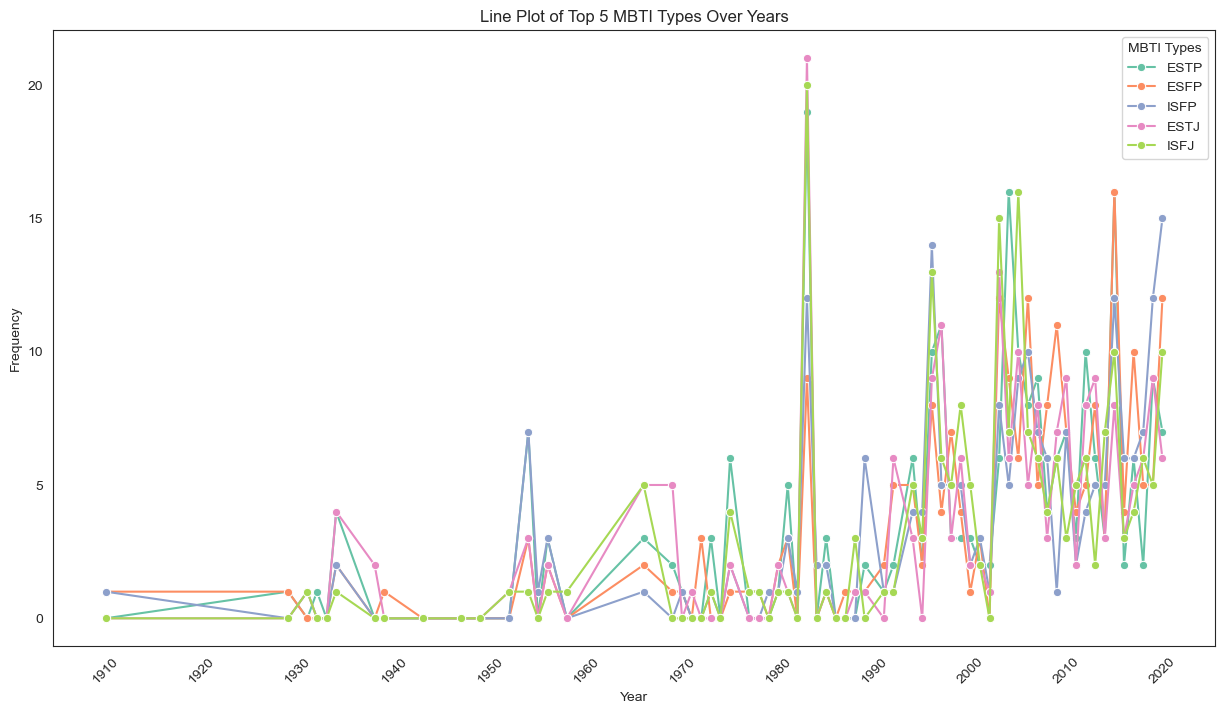

In [29]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong - change it from after 1970
# Grouping by year and MBTI type, then counting the occurrences
mbti_counts = df.groupby(['release_year', 'mbti']).size().unstack(fill_value=0)

# Selecting the top 5 most common MBTI types for the plot
top_mbti_types = mbti_counts.sum().sort_values(ascending=False).head(5).index

# Define a distinct but not too light color palette for the top 5 MBTI types
colors = sns.color_palette('Set2', len(top_mbti_types))

# Plotting a line chart for each of the top 5 MBTI types with distinct colors
plt.figure(figsize=(15, 8))
for i, mbti_type in enumerate(top_mbti_types):
    sns.lineplot(data=mbti_counts[mbti_type], label=mbti_type, marker='o', color=colors[i])

# Setting x-ticks to be one decade apart
decade_ticks = np.arange(mbti_counts.index.min(), mbti_counts.index.max() + 1, 10)
plt.xticks(decade_ticks)

plt.title('Line Plot of Top 5 MBTI Types Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='MBTI Types')
plt.xticks(rotation=45)
plt.savefig('./images/TimeSeries/MBTI_years_TOP5.png')  # Save the graph as an image file
plt.show()

### Genre vs Year 

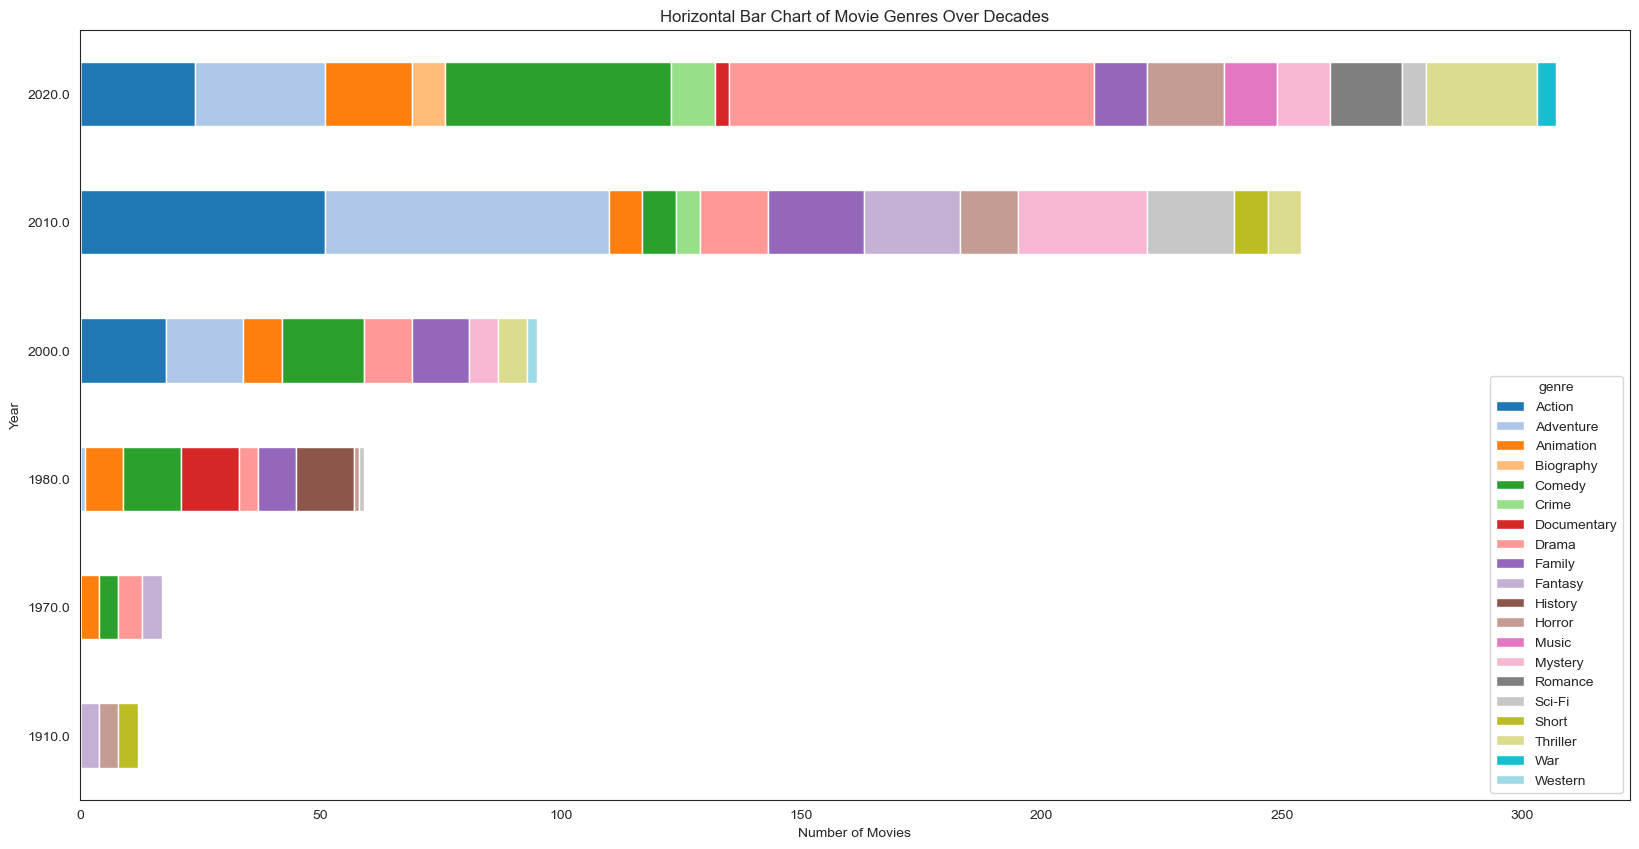

In [30]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Splitting genres into individual genres for each movie
df_expanded_genre_year = df.drop('genre', axis=1).join(
    df['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
)

# Filtering the data for years with a decade gap
decade_gap_years = np.arange(df['release_year'].min(), df['release_year'].max() + 1, 10)
genre_year_data_decade = df_expanded_genre_year[df_expanded_genre_year['release_year'].isin(decade_gap_years)]

# Grouping by year and genre and counting occurrences
genre_year_counts = genre_year_data_decade.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Plotting a horizontal bar chart for each genre
fig, ax = plt.subplots(figsize=(20, 10))
genre_year_counts.plot(kind='barh', stacked=True, ax=ax, colormap='tab20')
ax.set_title('Horizontal Bar Chart of Movie Genres Over Decades')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Year')
plt.savefig('./images/TimeSeries/Genre_Decades.png')  # Save the graph as an image file

plt.show()


## MBTI and Scores - Yitian 'Ewan' Long

In [31]:
# Get working directory
current_wd = os.getcwd()
data_wd = f"{current_wd}/data/cleaned"

# Load the df_merged dataset
df_merged = pd.read_csv(data_wd + "/df_merged.csv")

# Display the first few rows of the dataframe
df_merged.head()

mbti                  character movie_name  release_year           genre  \
0  ESFP                Jack Dawson    Titanic        1997.0  Drama, Romance   
1  ESTP               Brock Lovett    Titanic        1997.0  Drama, Romance   
2  ESTP  Fifth Officer Harold Lowe    Titanic        1997.0  Drama, Romance   
3  ESTJ      Caledon "Cal" Hockley    Titanic        1997.0  Drama, Romance   
4  ESTJ                Bruce Ismay    Titanic        1997.0  Drama, Romance   

       revenue  score  metascore  
0  659325379.0    7.8       75.0  
1  659325379.0    7.8       75.0  
2  659325379.0    7.8       75.0  
3  659325379.0    7.8       75.0  
4  659325379.0    7.8       75.0

### Average Movie Scores by Release Year

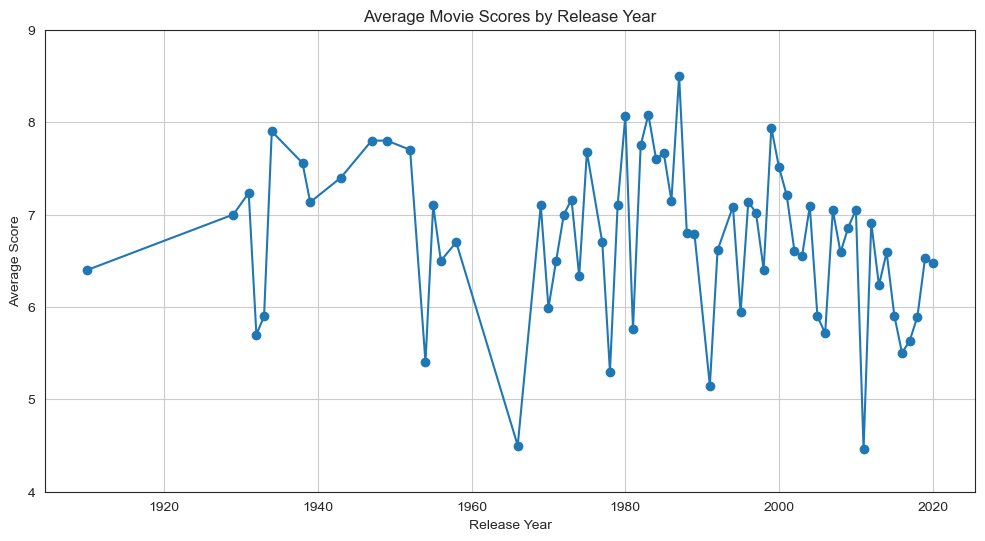

In [32]:
# Grouping the data by release year and calculating the average score for each year
# This is done by using the groupby method on the 'release_year' column 
# and then applying the mean function to the 'score' column.
average_scores_by_year = df_merged.groupby('release_year')['score'].mean().reset_index()

# Creating a line chart to visualize the data:
plt.figure(figsize=(12, 6))  # Setting the size of the plot
plt.plot(average_scores_by_year['release_year'], average_scores_by_year['score'], marker='o')  # Plotting the data with markers for each year
plt.title('Average Movie Scores by Release Year')  # Adding a title to the chart
plt.ylim(4, 9)  # Setting y-axis limits to 4 to 9
plt.xlabel('Release Year')  # Labeling the x-axis as 'Release Year'
plt.ylabel('Average Score')  # Labeling the y-axis as 'Average Score'
plt.grid(True)  # Adding a grid to the plot for better readability
plt.show()  # Displaying the plot


### Density Plot of IMDb Scores for Each MBTI Personality

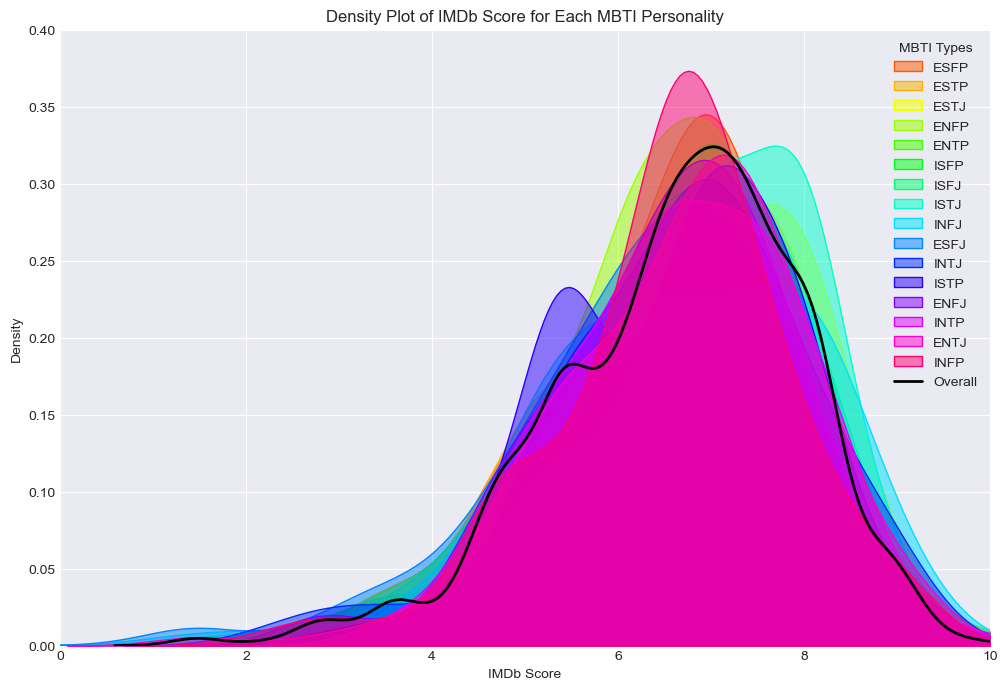

In [33]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for each MBTI type
fig, ax = plt.subplots(figsize=(12, 8))

# Getting unique MBTI types
mbti_types = df_merged['mbti'].unique()

# Creating a colorful palette with enough colors for each MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(mbti_types))

# Plotting the KDE plot for each MBTI type
for i, mbti in enumerate(mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Each MBTI Personality')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()

### Density Plot of IMDb Scores for Each MBTI Personality Type Combination

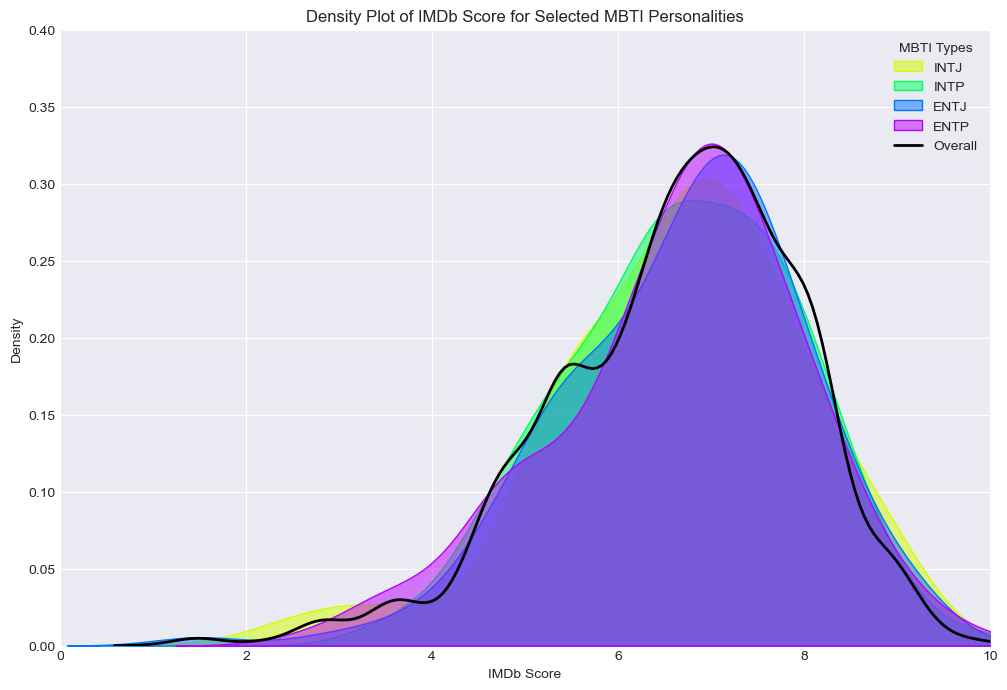

In [34]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for selected MBTI types
fig, ax = plt.subplots(figsize=(12, 8))

# Defining the selected MBTI types
selected_mbti_types = ['INTJ', 'INTP', 'ENTJ', 'ENTP']

# Creating a colorful palette with enough colors for each of the selected MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(selected_mbti_types))

# Plotting the KDE plot for each selected MBTI type
for i, mbti in enumerate(selected_mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score for overall comparison
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Selected MBTI Personalities')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()


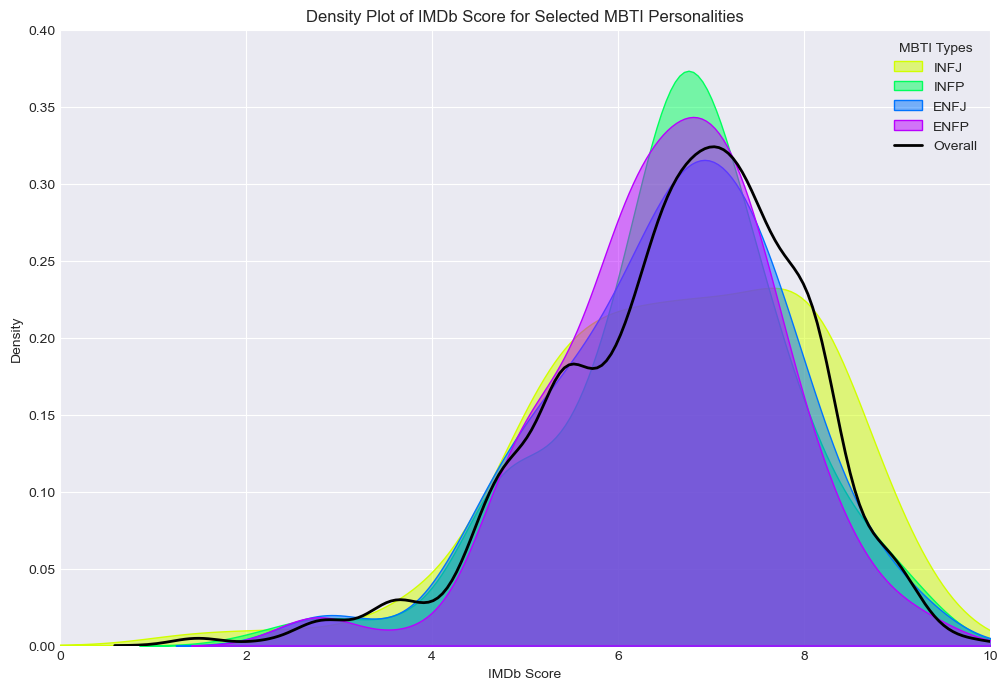

In [35]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for selected MBTI types
fig, ax = plt.subplots(figsize=(12, 8))

# Defining the selected MBTI types
selected_mbti_types = ['INFJ', 'INFP', 'ENFJ', 'ENFP']

# Creating a colorful palette with enough colors for each of the selected MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(selected_mbti_types))

# Plotting the KDE plot for each selected MBTI type
for i, mbti in enumerate(selected_mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score for overall comparison
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Selected MBTI Personalities')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()


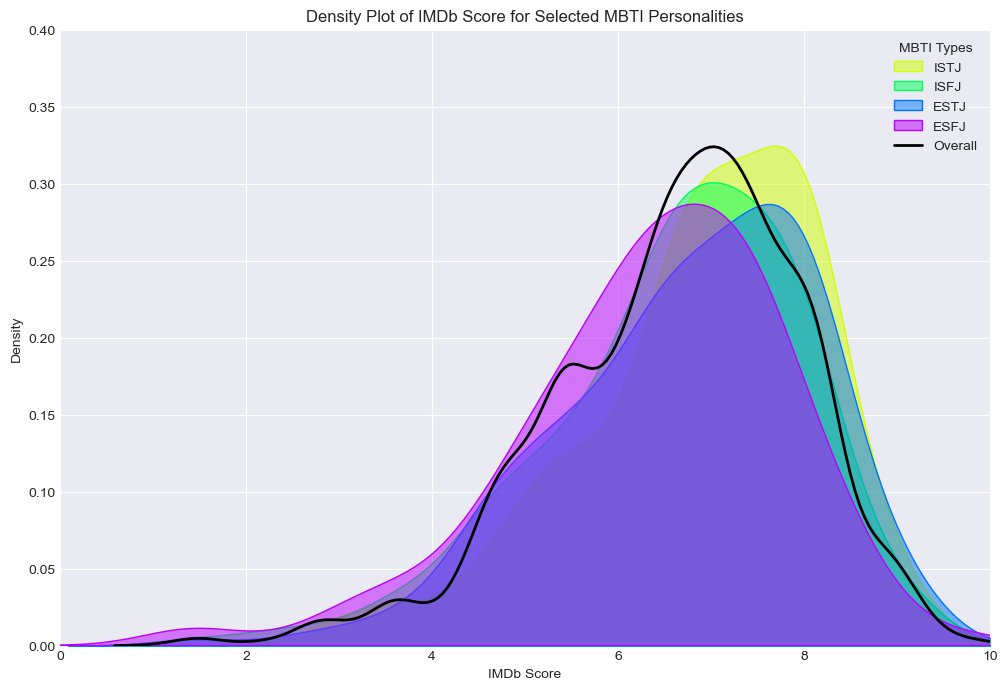

In [36]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for selected MBTI types
fig, ax = plt.subplots(figsize=(12, 8))

# Defining the selected MBTI types
selected_mbti_types = ['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ']

# Creating a colorful palette with enough colors for each of the selected MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(selected_mbti_types))

# Plotting the KDE plot for each selected MBTI type
for i, mbti in enumerate(selected_mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score for overall comparison
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Selected MBTI Personalities')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()


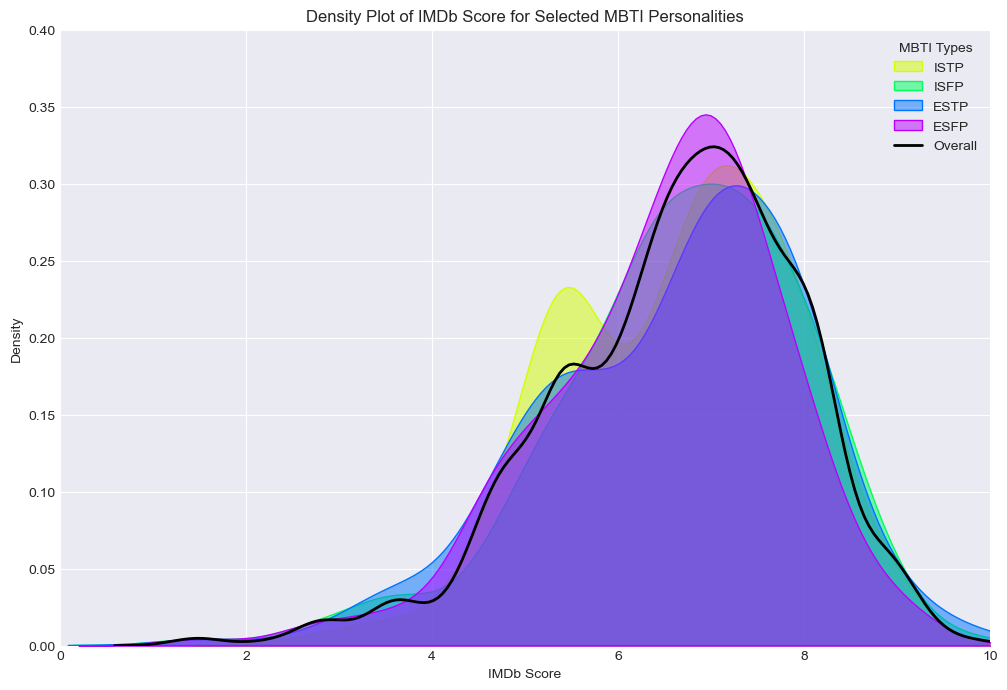

In [37]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the density plot for selected MBTI types
fig, ax = plt.subplots(figsize=(12, 8))

# Defining the selected MBTI types
selected_mbti_types = ['ISTP', 'ISFP', 'ESTP', 'ESFP']

# Creating a colorful palette with enough colors for each of the selected MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(selected_mbti_types))

# Plotting the KDE plot for each selected MBTI type
for i, mbti in enumerate(selected_mbti_types):
    sns.kdeplot(df_merged[df_merged['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

# Overlaying a density line of score for overall comparison
sns.kdeplot(df_merged['score'], ax=ax, color='black', lw=2, label='Overall')

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of IMDb Score for Selected MBTI Personalities')
ax.legend(title='MBTI Types')
plt.xlim(0, 10)  # Setting x-axis limits to 0 to 10
plt.ylim(0, 0.4)  # Setting y-axis limits to 0 to 0.4

plt.show()


### Density Plot of High IMDb Score (8-10) for Each MBTI Personality

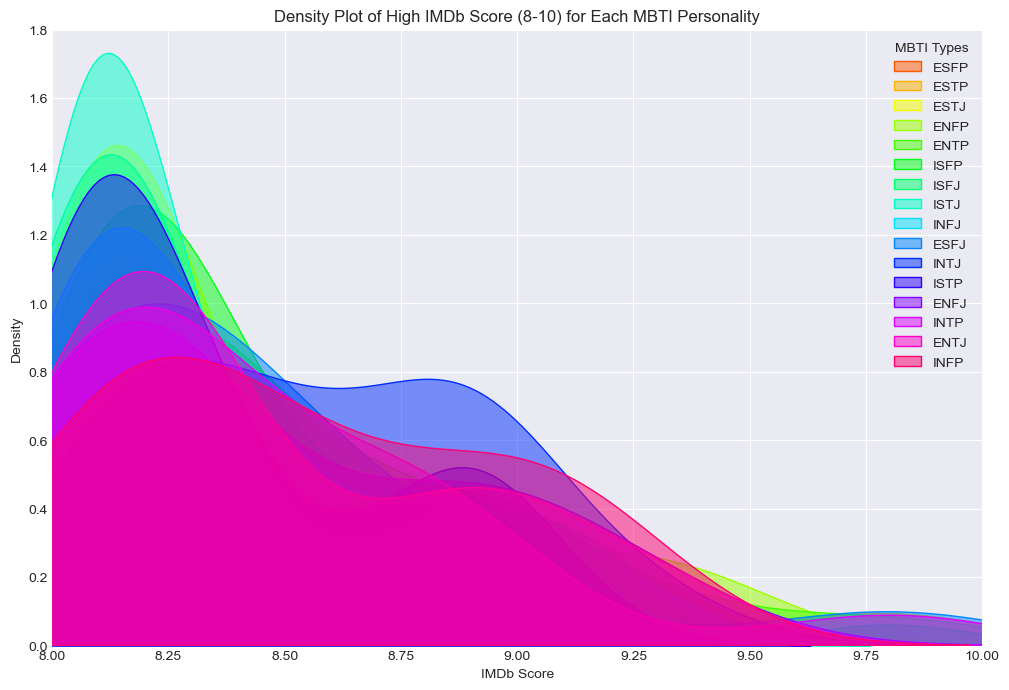

In [38]:
# Setting the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Filtering the dataset for scores between 8 and 10
high_score_df = df_merged[df_merged['score'].between(8, 10)]

# Creating a colorful palette with enough colors for each MBTI type
# Using hsv palette for a full spectrum of colors
palette = sns.color_palette("hsv", len(mbti_types))

# Plotting the density plot for each MBTI type
fig, ax = plt.subplots(figsize=(12, 8))

for i, mbti in enumerate(mbti_types):
    sns.kdeplot(high_score_df[high_score_df['mbti'] == mbti]['score'], ax=ax, label=mbti, color=palette[i], fill=True, alpha=0.5)

ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of High IMDb Score (8-10) for Each MBTI Personality')
ax.legend(title='MBTI Types')
plt.xlim(8, 10)  # Setting x-axis limits to 8 to 10
plt.ylim(0, 1.8)  # Setting y-axis limits to 0 to 1.8

plt.show()

### Trends in Average Movie Scores by Popular MBTI Categories Over Decades

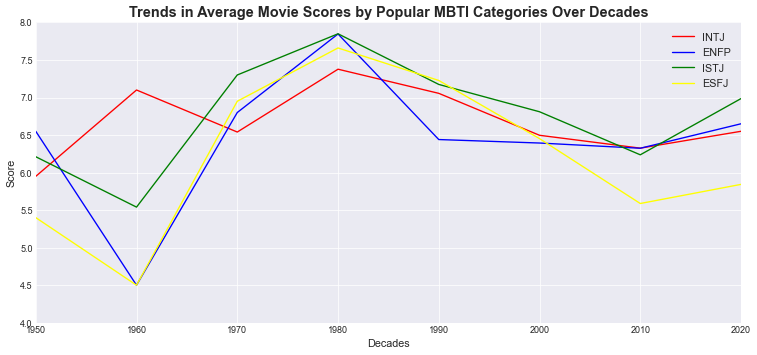

In [39]:
# Convert release year to decade
df_merged['Decade'] = (df_merged['release_year'] // 10 * 10).astype(int)

# List of MBTI types
mbti_types = ['INTJ', 'ENFP', 'ISTJ', 'ESFJ']

# Create a dictionary of dataframes for each MBTI type
df_mbti_dict = {mbti: df_merged[df_merged['mbti'] == mbti] for mbti in mbti_types}

# Colors for each MBTI type
c_list = ['red', 'blue', 'green', 'yellow']

# Labels for each MBTI type
label_list = ['INTJ', 'ENFP', 'ISTJ', 'ESFJ']

# Create a single subplot
fig, ax = plt.subplots(figsize=(14, 6), dpi=65)

# Plot each MBTI type
for (mbti, df_mbti), colour, label in zip(df_mbti_dict.items(), c_list, label_list):
    df_grouped = df_mbti.groupby('Decade')['score'].mean().dropna()
    ax.plot(df_grouped.index, df_grouped.values, c=colour, label=label, alpha=1)

# Set title and labels
ax.set_title('Trends in Average Movie Scores by Popular MBTI Categories Over Decades', fontsize=16, fontweight='bold')
ax.set_xlabel('Decades', fontsize=12)
ax.set_ylabel('Score', fontsize=12)

# Setting x-axis as decades
plt.xlim(1950, 2020)
plt.xticks(range(1950, 2030, 10))

plt.ylim(4, 8)  # Setting y-axis limits to 4 to 8

# Add legend
ax.legend(loc='upper right', fontsize='large')

# Show the plot
plt.show()


### Trends in Average Movie Scores by MBTI Personality Type Combination Over Decades

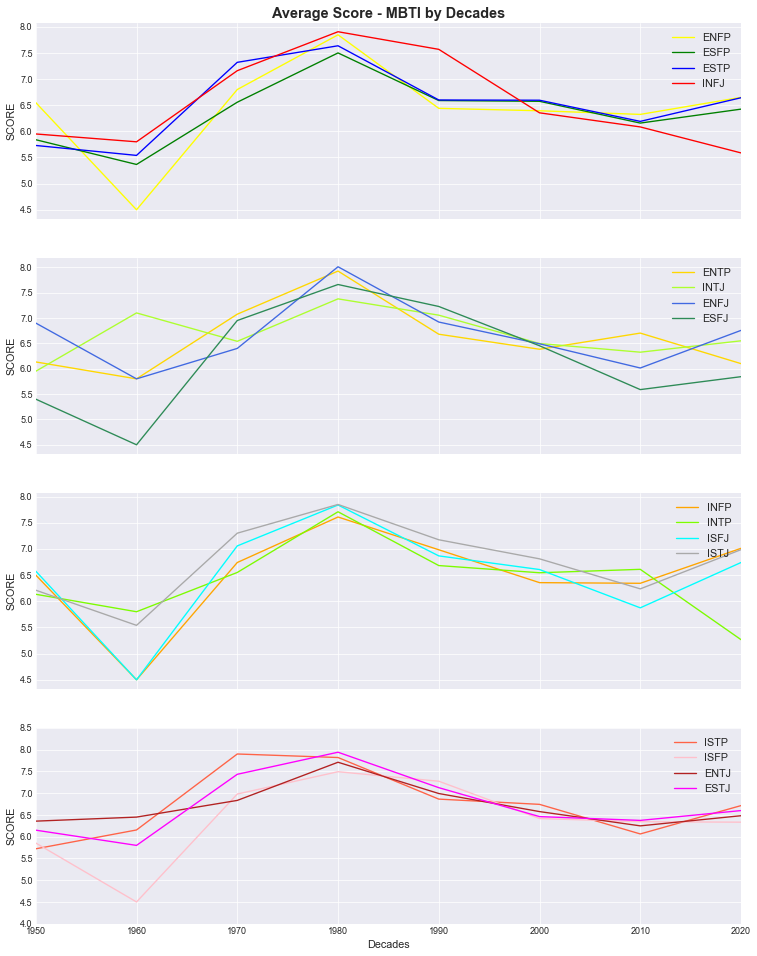

In [40]:
# Convert release year to decade
df_merged['Decade'] = (df_merged['release_year'] // 10 * 10).astype(int)

# MBTI types categorized into four groups
mbti_groups = {
    'Group1': ['ENFP', 'ESFP', 'ESTP', 'INFJ'],
    'Group2': ['ENTP', 'INTJ', 'ENFJ', 'ESFJ'],
    'Group3': ['INFP', 'INTP', 'ISFJ', 'ISTJ'],
    'Group4': ['ISTP', 'ISFP', 'ENTJ', 'ESTJ']
}

# Colors for each group
color_groups = {
    'Group1': ['yellow', 'green', 'blue', 'red'],
    'Group2': ['gold', 'greenyellow', 'royalblue', 'seagreen'],
    'Group3': ['orange', 'lawngreen', 'aqua', 'darkgray'],
    'Group4': ['tomato', 'pink', 'firebrick', 'fuchsia']
}

# Create a dictionary of dataframes for each MBTI type
df_mbti_dict = {mbti: df_merged[df_merged['mbti'] == mbti] for mbti in mbti_groups['Group1'] + mbti_groups['Group2'] + mbti_groups['Group3'] + mbti_groups['Group4']}

# Create subplots
fig, axes = plt.subplots(figsize=(14,18), nrows=4, dpi=65, sharex=True)

# Plot each group in its respective subplot
for i, (group, ax) in enumerate(zip(mbti_groups.keys(), axes)):
    for mbti, color in zip(mbti_groups[group], color_groups[group]):
        df_grouped = df_mbti_dict[mbti].groupby('Decade')['score'].mean().dropna()
        ax.plot(df_grouped.index, df_grouped.values, c=color, label=mbti, alpha=1)
        ax.legend(loc='upper right', fontsize='large')
        ax.set_ylabel('SCORE', fontsize=12)

# Set common features of the plot
axes[0].set_title('Average Score - MBTI by Decades', fontsize=16, fontweight='bold')
plt.xlim(1950, 2020) # Setting x-axis limits to 1950 to 2020
plt.ylim(4, 8.5)  # Setting y-axis limits to 4 to 8.5
plt.xticks(range(1950, 2030, 10))
plt.xlabel('Decades', fontsize=12)

# Show the plot
plt.show()


### Distribution of Average Scores by MBTI Type

In [41]:
# Calculate the average score for each MBTI type and sort them
score_mbti = df_merged.groupby('mbti')['score'].mean().sort_values(ascending=False)
score_mbti_lst = score_mbti.index.tolist()

# Create a DataFrame for box plot
score_mbti_df = df_merged[df_merged['mbti'].isin(score_mbti_lst)]

# Create the box plot
fig = px.box(score_mbti_df, 
             x='mbti', 
             y='score', 
             color='mbti',
             category_orders={'mbti': score_mbti_lst})

# Update layout
fig.update_layout(
    title_text='Distribution of Average Scores by MBTI Type',  
    xaxis=dict(
        title='MBTI',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Score',
        titlefont_size=16
    ),
    template='plotly_white'
)

# Update traces
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)

# Show the plot
fig.show()


### MBTI VS Score Heatmap by Decade

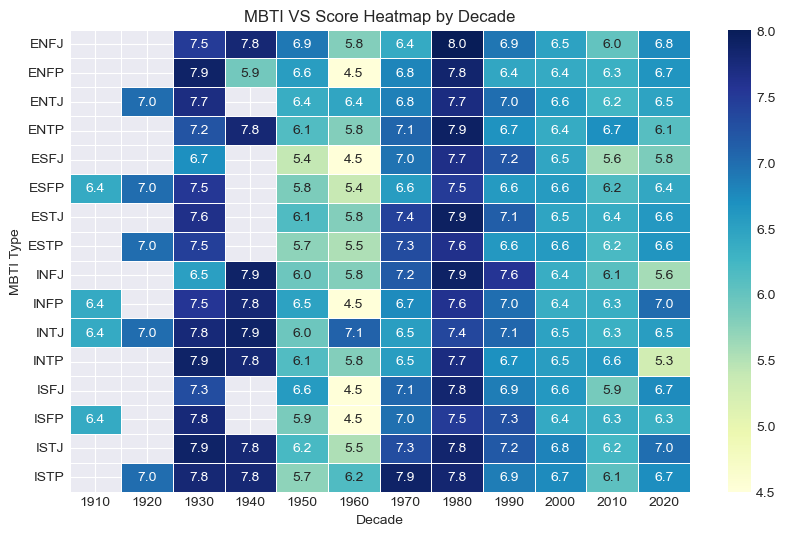

In [42]:
# Creating a pivot table for the heatmap data
heatmap_data = df_merged.pivot_table(values='score', index='mbti', columns='Decade', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('MBTI VS Score Heatmap by Decade')
plt.ylabel('MBTI Type')
plt.xlabel('Decade')
plt.show()

### Top 3 MBTI Types by Average Score Across Years

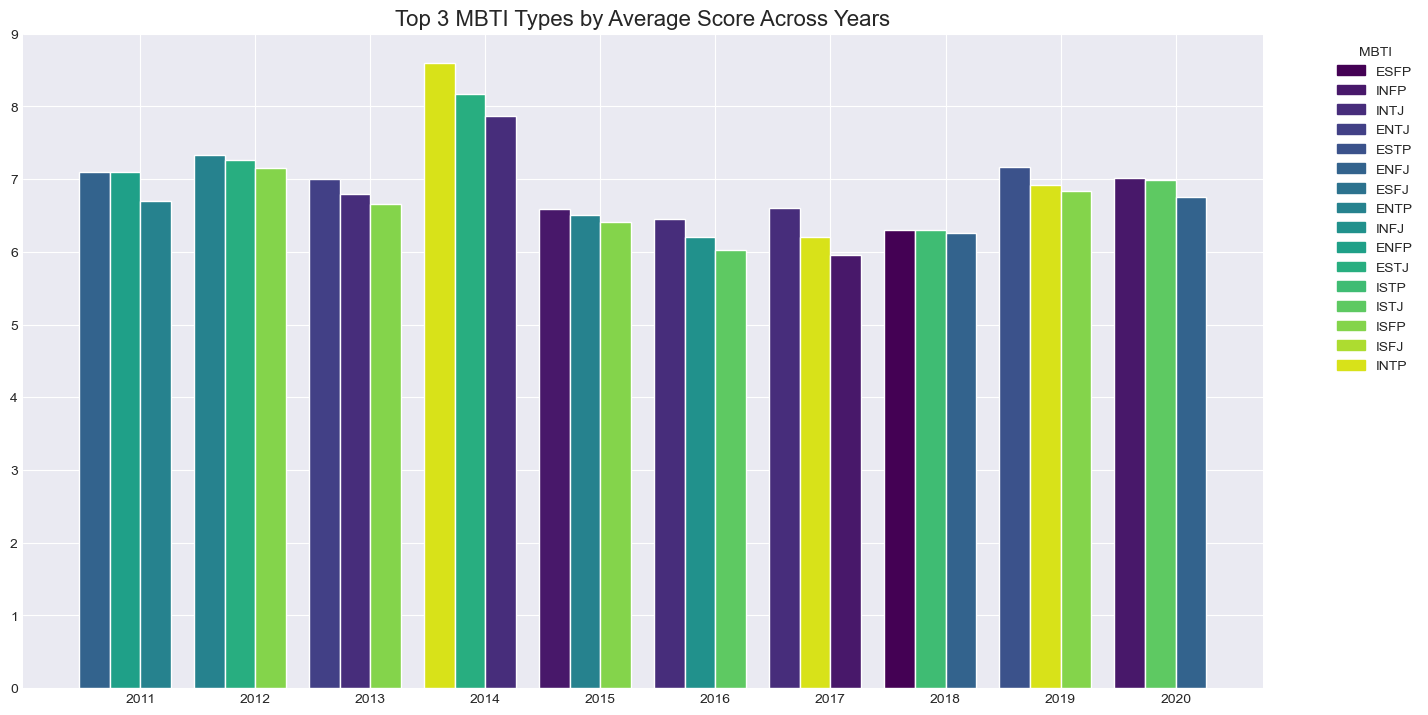

In [43]:
# Calculate the average score for each MBTI type per release year
average_score = df_merged.groupby(['release_year', 'mbti'])['score'].mean().reset_index()

# Extract the top three MBTI types for each release year based on the average score
top3_mbti = average_score.groupby('release_year').apply(lambda x: x.nlargest(3, 'score')).reset_index(drop=True)

mbtis = top3_mbti['mbti'].unique()

# Selecting the last 30 entries to focus on more recent data
num_rows = top3_mbti.shape[0]
subset_df = top3_mbti.iloc[num_rows-30:num_rows].copy()  # Explicitly create a copy to avoid SettingWithCopyWarning

# Converting 'release_year' to integer for better x-axis formatting
subset_df['release_year'] = subset_df['release_year'].astype(int)

# Create a new figure and axis for plotting
fig, ax = plt.subplots(figsize=(16, 8.5))

# Calculate bar width based on the number of unique MBTI types per year
year_mbti_count = subset_df.groupby('release_year')['mbti'].nunique()
max_count = year_mbti_count.max()
bar_width = 0.8 / max_count  # Width of each bar

# Using the colormap directly without specifying the number of colors
color_map = mpl.colormaps.get_cmap('viridis')
# Normalizing the index for each MBTI type to fit within the colormap range
mbti_colors = {mbti: color_map(i / len(mbtis)) for i, mbti in enumerate(mbtis)}

# Plot bars for each MBTI type per year
for year in sorted(subset_df['release_year'].unique()):
    year_data = subset_df[subset_df['release_year'] == year]
    for i, (index, row) in enumerate(year_data.iterrows()):
        color = mbti_colors[row['mbti']]
        ax.bar(year + i * bar_width, row['score'], width=bar_width, color=color, label=row['mbti'] if year == min(subset_df['release_year']) and i == 0 else "")

# Set x-ticks to be in the middle of the groups
ax.set_xticks([year + bar_width * year_mbti_count[year] / 2 for year in sorted(subset_df['release_year'].unique())])
ax.set_xticklabels(sorted(subset_df['release_year'].unique()))

plt.ylim(0, 9)  # Setting y-axis limits to 0 to 9

# Set the title and legend of the plot
ax.set_title('Top 3 MBTI Types by Average Score Across Years', fontsize=16)

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=mbti_colors[mbti]) for mbti in mbtis]
ax.legend(handles, mbtis, title='MBTI', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

### Correlation Between MBTI Types and IMDb Scores

r^2 = 0.066


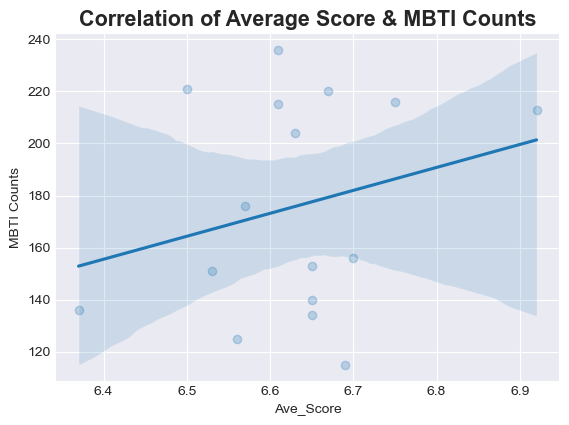

In [44]:
# Add a count column to the dataframe
df_merged['Count'] = 1

# Group by MBTI, calculate mean score and count, then sort by score
df_rate_dir = df_merged.groupby('mbti').agg({'score': 'mean', 'Count': 'sum'}).sort_values(by='score', ascending=False)
df_rate_dir['score'] = round(df_rate_dir['score'], 2)
df_rate_dir.columns = ['Ave_Score', 'MBTI Counts']

# Set up the plot
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Plot data using seaborn's regplot
sns.regplot(x='Ave_Score', y='MBTI Counts', data=df_rate_dir, ax=ax, scatter_kws={'alpha': 0.25})
ax.set_title('Correlation of Average Score & MBTI Counts', fontsize=15.5, fontweight='heavy')

# Calculate and print R^2 value
lin_reg = LinearRegression().fit(df_rate_dir[['Ave_Score']], df_rate_dir['MBTI Counts'])
r2 = lin_reg.score(df_rate_dir[['Ave_Score']], df_rate_dir['MBTI Counts'])
print(f'r^2 = {round(r2, 3)}')

# Remove top and right borders
sns.despine()

# Show the plot
plt.show()


## Geographic and MBTI - Xuhui 'Daniel' Zhan

In [45]:
# Read the data
map_data_path = 'data/cleaned/df_imdb_map.csv'
mbti_data_path = 'data/cleaned/df_mbti.csv'
fig_save_path = "images/Geographical"

In [46]:
# Loading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(set(world['continent']))

# Only keep the continents
world = world[world['continent'].isin(['Asia', 'Oceania', 'Seven seas (open ocean)', 'Europe', 'South America', 'North America', 'Africa'])]

df_imdb_map = pd.read_csv(map_data_path)

df_mbti = pd.read_csv(mbti_data_path)

{'Africa', 'Asia', 'Antarctica', 'Seven seas (open ocean)', 'Oceania', 'North America', 'Europe', 'South America'}


In [47]:
print(world.head())

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


In [48]:
average_scores_revenues = df_imdb_map.groupby('country').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()
average_scores_revenues.head()

country      score       revenue
0      AR  66.073171  4.565608e+08
1      AT  67.000000  7.228277e+07
2      AU  66.706039  1.929454e+08
3      BE  55.571429  3.283100e+08
4      BO  52.000000  6.383325e+08

### Overview by country

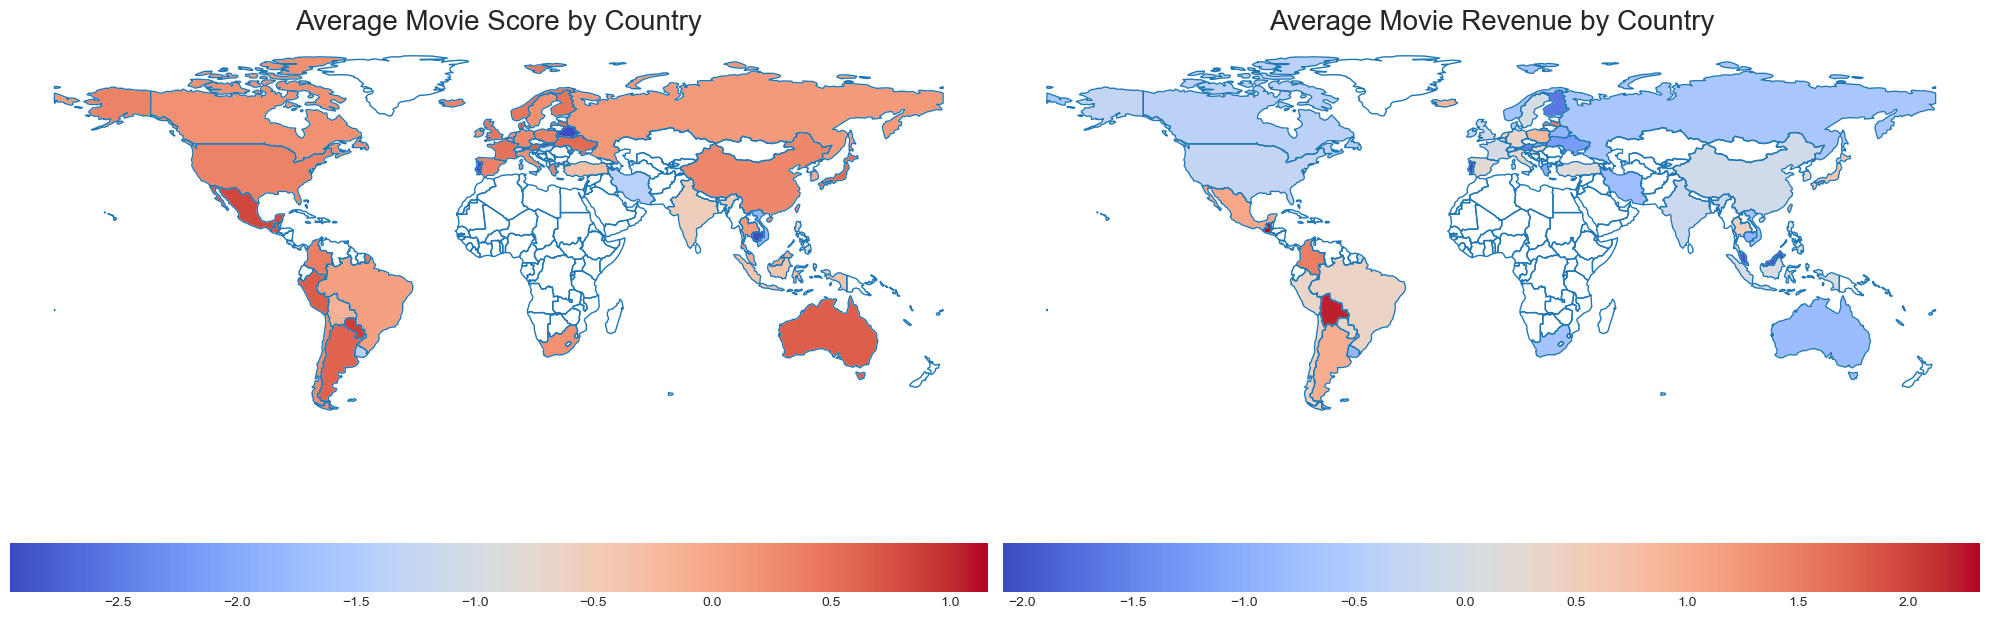

In [49]:
# Creating a mapping of country codes in the movie dataset to country names in the world map dataset
# This requires some knowledge of country codes and names
country_mapping = {
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BE': 'Belgium',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BY': 'Belarus',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CN': 'China',
    'CO': 'Colombia',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HK': 'Hong Kong',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IR': 'Iran',
    'IS': 'Iceland',
    'IT': 'Italy',
    'JP': 'Japan',
    'KH': 'Cambodia',
    'KR': 'South Korea',
    'LV': 'Latvia',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PL': 'Poland',
    'PR': 'Puerto Rico',
    'PT': 'Portugal',
    'PY': 'Paraguay',
    'RU': 'Russia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SK': 'Slovakia',
    'SU': 'Soviet Union',
    'TH': 'Thailand',
    'TR': 'Turkey',
    'TW': 'Taiwan',
    'UA': 'Ukraine',
    'US': 'United States of America',
    'UY': 'Uruguay',
    'VN': 'Vietnam',
    'XC': 'Czechoslovakia',
    'ZA': 'South Africa'
}

# Mapping the country codes to country names in the movie dataset
df_imdb_map['country'] = df_imdb_map['country'].map(country_mapping).fillna(df_imdb_map['country'])

# Now let's try merging again and plotting on the map
# Merging our movie data with the world map data again

# Creating a dataframe for average score and revenue by country to merge with the world map
average_scores_revenues = df_imdb_map.groupby('country').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()

# Standardizing the data
average_scores_revenues['score'] = StandardScaler().fit_transform(average_scores_revenues[['score']])
average_scores_revenues['revenue'] = StandardScaler().fit_transform(average_scores_revenues[['revenue']])

# Merging with the world map data
world_average = world.merge(average_scores_revenues, left_on='name', right_on="country", how='left')

# Set sns style
sns.set_style('whitegrid')

# print(world.head())

# Plotting the data on the world map
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for average movie score by country
world_average.boundary.plot(ax=axes[0], linewidth=1)
world_average.plot(column='score', ax=axes[0], legend=True, legend_kwds={'orientation': "horizontal"}, cmap='coolwarm')
axes[0].set_title('Average Movie Score by Country', fontsize=20)
axes[0].axis('off')

# Plot for average movie revenue by country
world_average.boundary.plot(ax=axes[1], linewidth=1)
world_average.plot(column='revenue', ax=axes[1], legend=True, legend_kwds={ 'orientation': "horizontal"}, cmap="coolwarm")
axes[1].set_title('Average Movie Revenue by Country', fontsize=20)
axes[1].axis('off')
plt.tight_layout()
plt.savefig('images/Geographic/Score_Revenue_Country.png')  # Save the graph as an image file
plt.show()

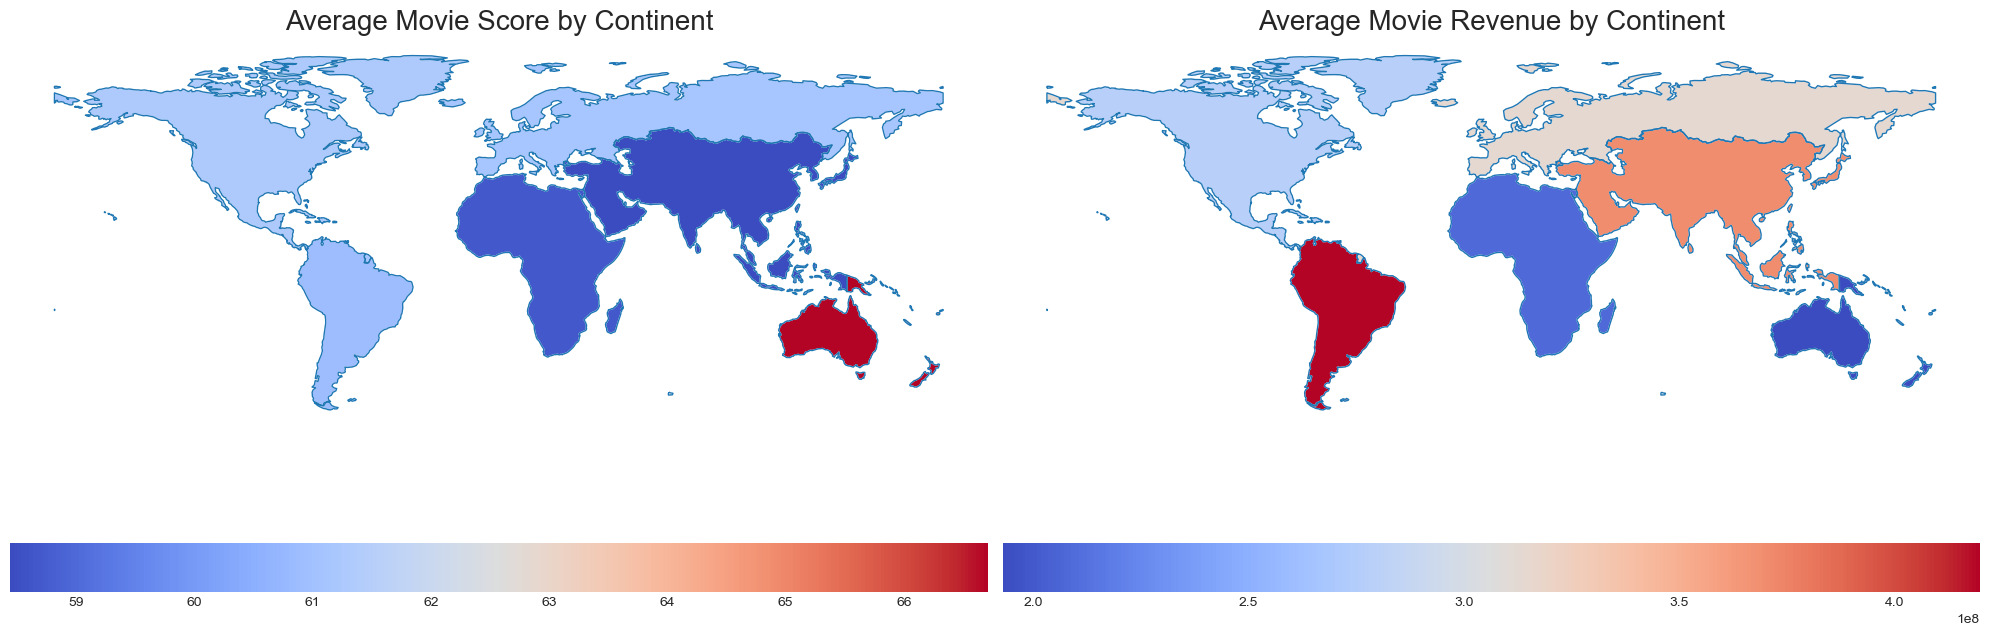

In [50]:
# instead of grouping by country, we can group by continent
# Creating a dataframe for average score and revenue by continent to merge with the world map
# Create a continent column in the movie dataset 
# This requires some knowledge of country codes and names
#Creating a mapping of countries to continents
country_continent_mapping = world[['name', 'continent']].drop_duplicates().set_index('name')['continent'].to_dict()

# Mapping the countries in the movie dataset to continents
df_imdb_map['continent'] = df_imdb_map['country'].map(country_continent_mapping)

# Grouping by continent and calculating average score and revenue
continent_averages = df_imdb_map.groupby('continent').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()

# Merging the aggregated data with the world map data frame for continents
world_continents = world[['continent', 'geometry']].dissolve(by='continent')

# Merging the aggregated data with the world map data for continents
world_continents = world_continents.merge(continent_averages, left_on='continent', right_on='continent', how='left')

# Plotting the data on the world map for continents
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for average movie score by continent
world_continents.boundary.plot(ax=axes[0], linewidth=1)
world_continents.plot(column='score', ax=axes[0], legend=True, legend_kwds={'orientation': "horizontal"}, cmap='coolwarm')
axes[0].set_title('Average Movie Score by Continent', fontsize=20)
axes[0].axis('off')

# Plot for average movie revenue by continent
world_continents.boundary.plot(ax=axes[1], linewidth=1)
world_continents.plot(column='revenue', ax=axes[1], legend=True, legend_kwds={'orientation': "horizontal"}, cmap="coolwarm")
axes[1].set_title('Average Movie Revenue by Continent', fontsize=20)
axes[1].axis('off')

plt.tight_layout()
plt.savefig('images/Geographic/Score_Revenue_Continent.png')  # Save the graph as an image file
plt.show()

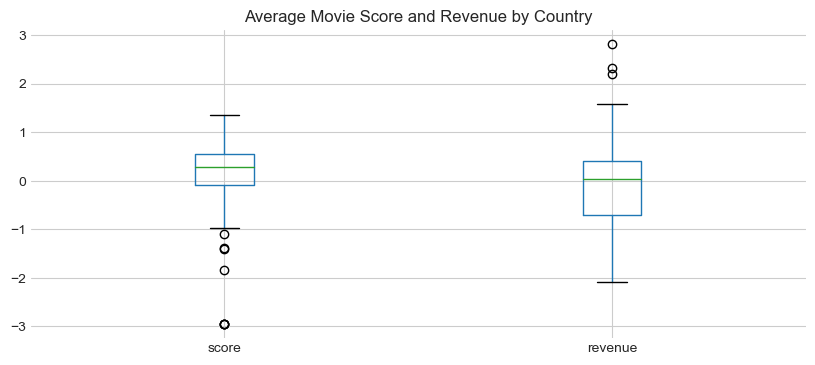

In [51]:
# Boxplot for average movie score and revenue by country
average_scores_revenues.boxplot(column=['score', 'revenue'], figsize=(10, 4))
# sns.boxplot(x="country", y=["score", 'revenue'], data=average_scores_revenues)
plt.title('Average Movie Score and Revenue by Country')
plt.savefig('images/Geographic/Average-Movie-Score&Revenue-by-Country.png')  # Save the graph as an image file
plt.show()

In [52]:
# Generating the count for each of the 16 MBTI personalities in each movie
mbti_counts = df_mbti.groupby(['movie_name', 'mbti']).size().unstack(fill_value=0)

mbti_counts_reset = mbti_counts.reset_index()
mbti_counts_reset.columns.name = None

# Displaying the counts
mbti_counts_reset.head()

movie_name  ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  \
0                      #Alive     0     0     0     0     0     0     0     0   
1      ...And Justice For All     1     0     0     1     0     0     1     0   
2                  07/27/1978     0     0     0     0     0     0     0     0   
3         10 Cloverfield Lane     0     0     0     0     0     1     1     1   
4  10 Things I Hate About You     1     0     0     1     1     0     0     0   

   INFJ  INFP  INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP  
0     0     0     0     0     0     0     1     0  
1     0     0     0     0     0     0     0     0  
2     0     1     0     0     1     0     0     0  
3     0     0     0     0     0     0     0     0  
4     0     2     1     0     0     0     0     1

In [53]:
# merge the data to the original movie dataset
df_imdb_mbti = df_imdb_map.merge(mbti_counts_reset, left_on='movie_name', right_on='movie_name', how='left')

In [54]:
df_imdb_mbti.drop('Unnamed: 0', axis=1, inplace=True)

In [55]:
df_imdb_mbti.head()

movie_name release_date  score  \
0                    Creed Iii   2023-03-02   73.0   
1     Avatar: The Way Of Water   2022-12-15   78.0   
2  The Super Mario Bros. Movie   2023-04-05   76.0   
3                      Mummies   2023-01-05   70.0   
4                    Supercell   2023-03-17   61.0   

                                           genre       budget       revenue  \
0                                  Drama, Action   75000000.0  2.716167e+08   
1             Science Fiction, Adventure, Action  460000000.0  2.316795e+09   
2  Animation, Adventure, Family, Fantasy, Comedy  100000000.0  7.244590e+08   
3  Animation, Comedy, Family, Adventure, Fantasy   12300000.0  3.420000e+07   
4                                         Action   77000000.0  3.409420e+08   

                    country  release_year      continent  ENFJ  ...  ESTJ  \
0                 Australia        2023.0        Oceania   NaN  ...   NaN   
1                 Australia        2022.0        Oceania   NaN  ...   NaN   
2                 Australia        2023.0        Oceania   NaN  ...   NaN   
3                 Australia        2023.0        Oceania   NaN  ...   NaN   
4  United States of America        2023.0  North America   NaN  ...   NaN   

   ESTP  INFJ  INFP  INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 25 columns]

In [56]:
# fillna in each columns with the mean of the column values group by country
numeric_columns = df_imdb_mbti.select_dtypes(include=['number']).columns
df_imdb_mbti.dropna(subset=numeric_columns, inplace=True)

In [57]:
df_imdb_mbti.head()

movie_name release_date  score  \
11  The Exorcist   2022-11-02   55.0   
58  A Bronx Tale   1994-05-20   78.0   
68        Avatar   2009-12-17   76.0   
75     John Wick   2014-11-26   74.0   
95        Scream   2022-01-13   67.0   

                                          genre       budget       revenue  \
11                                       Horror   12000000.0  4.282145e+08   
58                                 Drama, Crime   10000000.0  1.728790e+07   
68  Action, Adventure, Fantasy, Science Fiction  237000000.0  2.923706e+09   
75                             Action, Thriller   30000000.0  7.595880e+07   
95                    Horror, Mystery, Thriller   24000000.0  1.388748e+08   

      country  release_year      continent  ENFJ  ...  ESTJ  ESTP  INFJ  INFP  \
11     Mexico        2022.0  North America   0.0  ...   0.0   1.0   2.0   0.0   
58  Australia        1994.0        Oceania   0.0  ...   1.0   0.0   0.0   0.0   
68  Australia        2009.0        Oceania   1.0  ...   1.0   1.0   1.0   0.0   
75  Australia        2014.0        Oceania   1.0  ...   2.0   5.0   0.0   0.0   
95  Australia        2022.0        Oceania   0.0  ...   0.0   1.0   1.0   0.0   

    INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP  
11   0.0   0.0   0.0   0.0   0.0   0.0  
58   0.0   0.0   1.0   0.0   0.0   0.0  
68   0.0   2.0   0.0   0.0   2.0   1.0  
75   0.0   0.0   2.0   0.0   3.0   2.0  
95   1.0   0.0   0.0   1.0   1.0   0.0  

[5 rows x 25 columns]

In [58]:
print(len(df_imdb_mbti))

2339


In [59]:
df_imdb_mbti.to_csv("data/cleaned/df_map_mbti.csv")

### Investigate the reprensentative countries

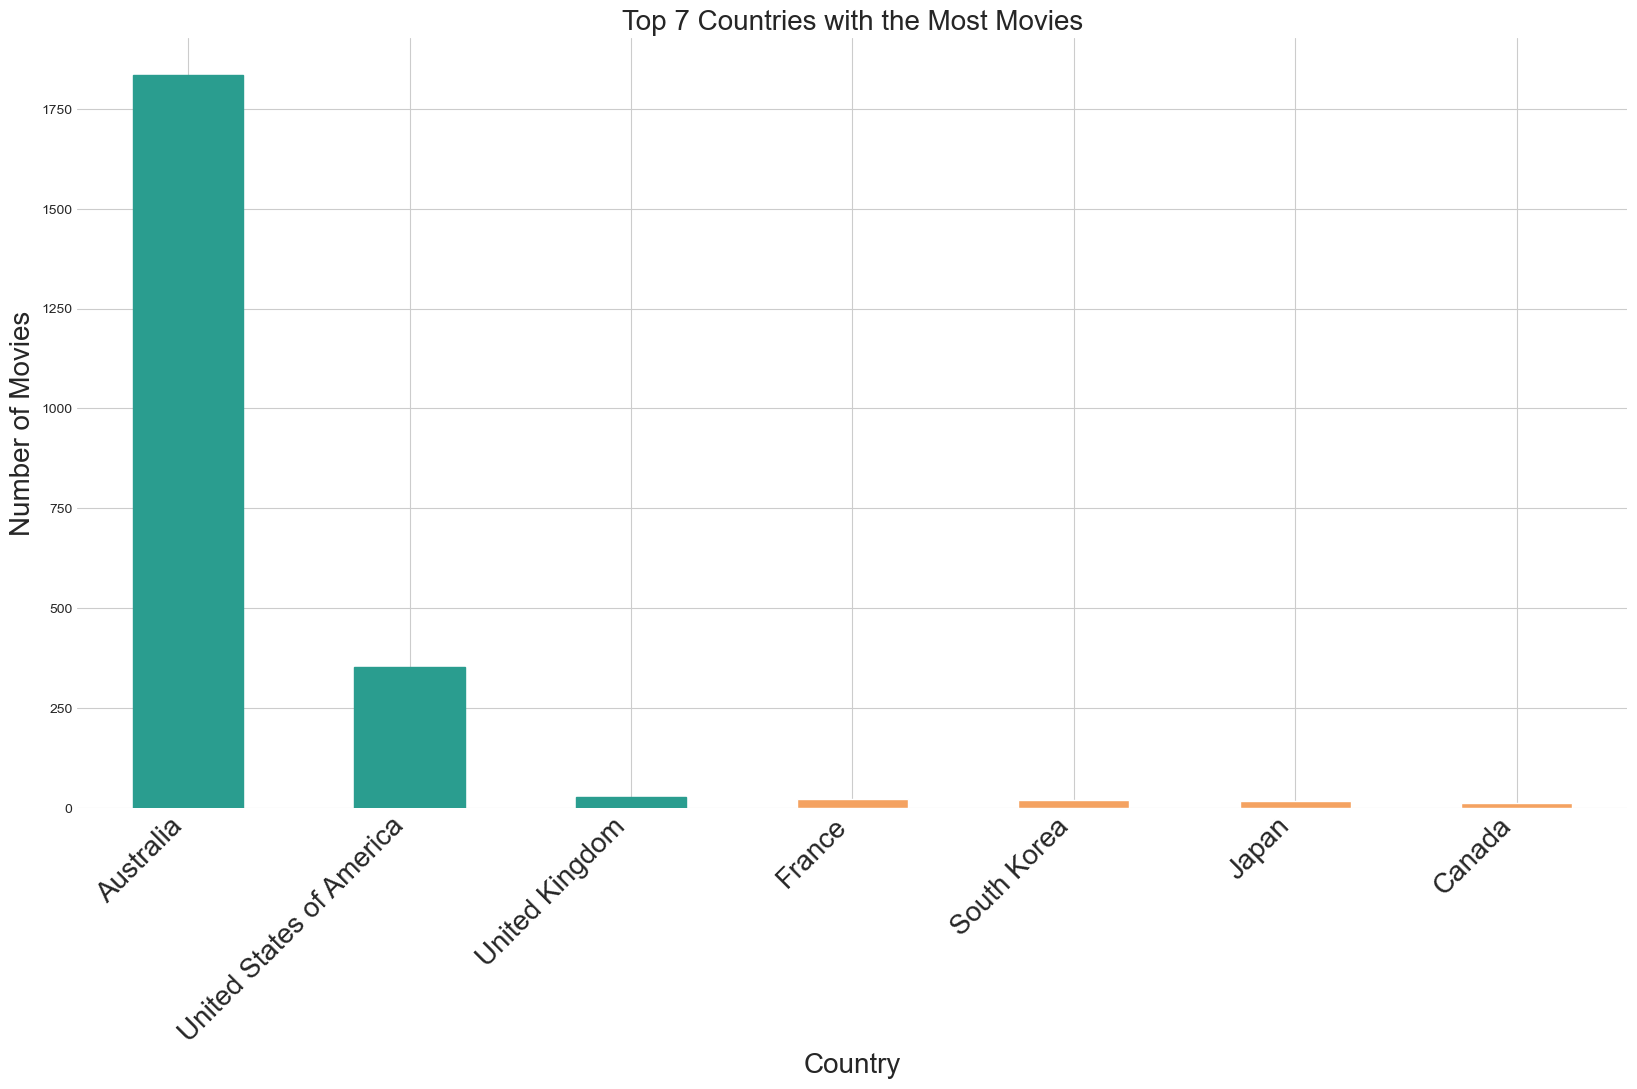

In [60]:
## List the top 7 countries with the most movies
top_count = df_imdb_mbti['country'].value_counts().head(7)

## Plot them and highlight the top 3
plt.figure(figsize=(20, 10))
ax = plt.gca()
top_count.plot.bar(ax=ax, color="#F4A261")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=20)
ax.set_title('Top 7 Countries with the Most Movies',fontsize=20)
ax.set_xlabel('Country', fontsize=20)
ax.set_ylabel('Number of Movies', fontsize=20)

# Highlighting the top 3 countries
for i in range(3):
    ax.get_children()[i].set_color('#2A9D8F')

plt.savefig('images/Geographic/Count_Country.png')  # Save the graph as an image file


In [61]:
## Plot the top 3 count in australia and United States of America
top_3_countries = ['Australia', 'United States of America', 'United Kingdom']
df_imdb_mbti_top3 = df_imdb_mbti[df_imdb_mbti['country'].isin(top_3_countries)]

df_imdb_mbti_top3.columns

Index(['movie_name', 'release_date', 'score', 'genre', 'budget', 'revenue',
       'country', 'release_year', 'continent', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP',
       'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ',
       'ISFP', 'ISTJ', 'ISTP'],
      dtype='object')

In [62]:
personalities_list = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ',
       'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP',
       'ISTJ', 'ISTP']
print(len(personalities_list))

16


### Distributions of MBTI in top3 countries

In [63]:
# Gradient Color generation
import numpy as np
# Reattempting the calculation for gradient colors between "#F72585" (pink) and "#4CC9F0" (cyan)

# Convert hex colors to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

start_color_pink_cyan = hex_to_rgb("#03045E")
end_color_pink_cyan = hex_to_rgb("#CAF0F8")

# Convert the RGB tuples to numpy arrays
start_color_pink_cyan_np = np.array(start_color_pink_cyan)
end_color_pink_cyan_np = np.array(end_color_pink_cyan)

# Initialize array for RGB values of the gradient
gradient_rgb_pink_cyan = np.zeros((16, 3), dtype=int)

gradient_steps = np.linspace(0, 1, 16)

# Interpolate between pink and cyan colors
for i, step in enumerate(gradient_steps):
    gradient_rgb_pink_cyan[i] = np.round(start_color_pink_cyan_np * (1 - step) + end_color_pink_cyan_np * step).astype(int)

# Convert RGB values to hexadecimal
gradient_hex_pink_cyan = ['#' + ''.join('{:02x}'.format(val) for val in color) for color in gradient_rgb_pink_cyan]
gradient_hex_pink_cyan

['#03045e',
 '#101468',
 '#1e2373',
 '#2b337d',
 '#384387',
 '#455391',
 '#53629c',
 '#6072a6',
 '#6d82b0',
 '#7a92ba',
 '#88a1c5',
 '#95b1cf',
 '#a2c1d9',
 '#afd1e3',
 '#bde0ee',
 '#caf0f8']

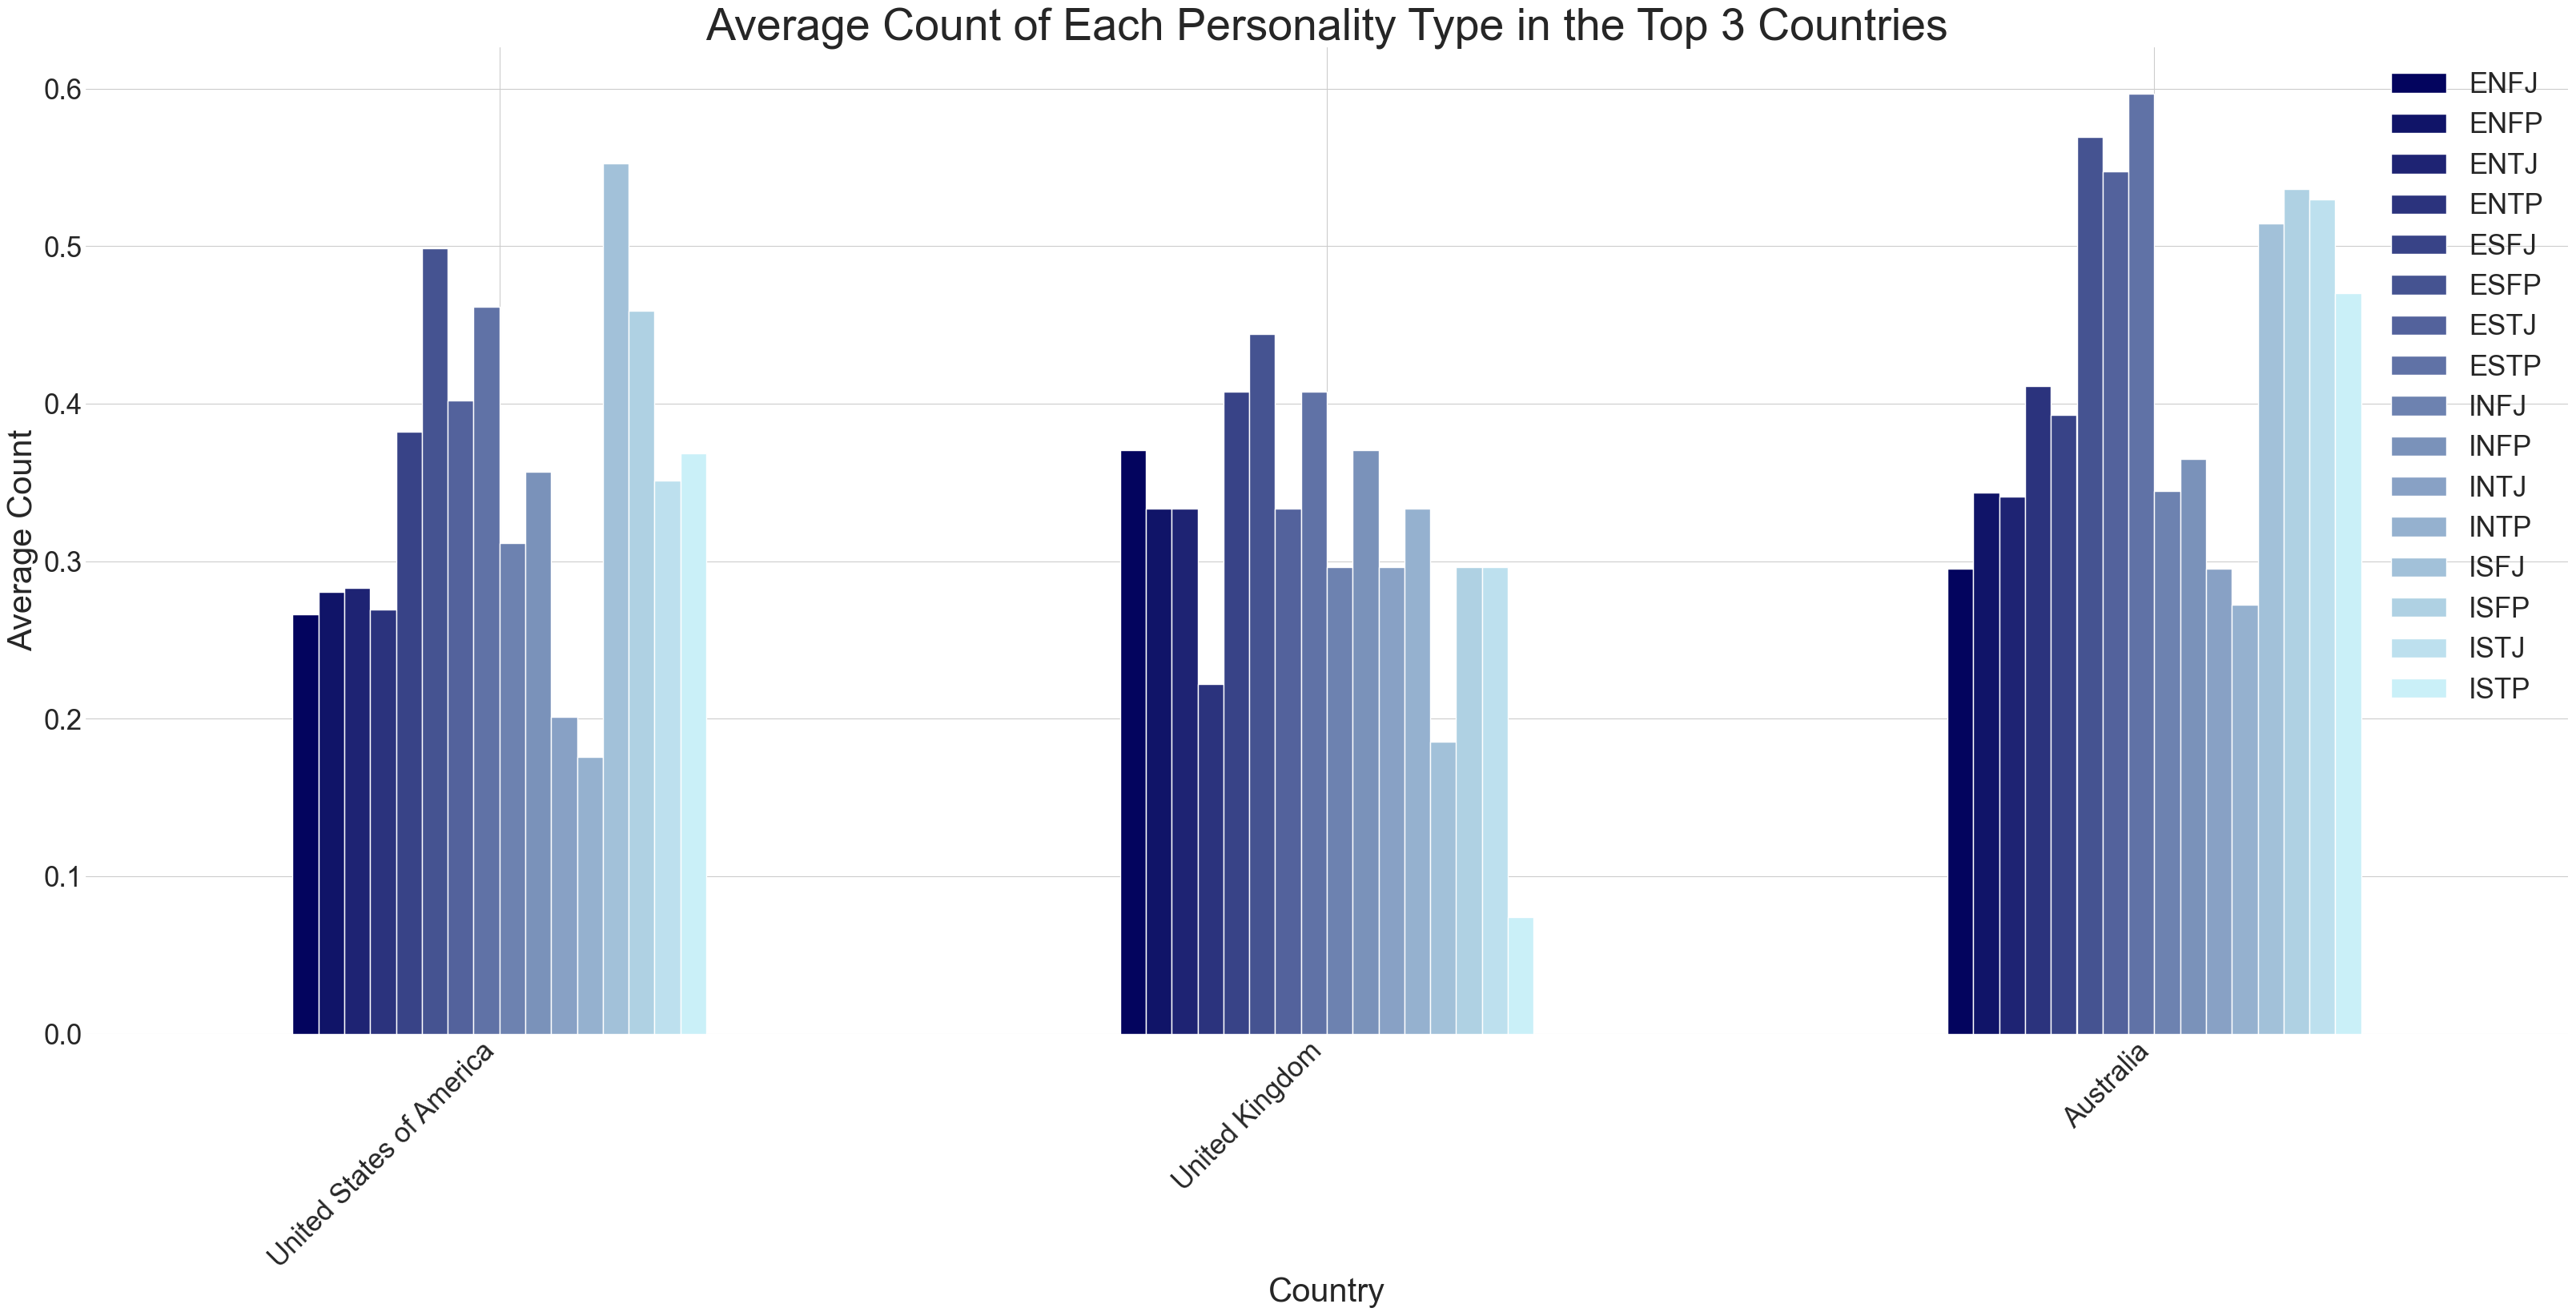

In [64]:
# Set the color style
sns.set_style("whitegrid")

# Plotting the average count of each personality type in the top 3 countries, make it in order
plt.figure(figsize=(40, 16))
ax = plt.gca()
average_count = df_imdb_mbti_top3.groupby('country')[personalities_list].mean().sort_values(by='country', ascending=False).plot.bar(ax=ax, color=['#03045e',
 '#101468',
 '#1e2373',
 '#2b337d',
 '#384387',
 '#455391',
 '#53629c',
 '#6072a6',
 '#6d82b0',
 '#7a92ba',
 '#88a1c5',
 '#95b1cf',
 '#a2c1d9',
 '#afd1e3',
 '#bde0ee',
 '#caf0f8'], fontsize=25)
ax.legend(fontsize=25)
# Plot the three personality types with the highest mean corresponding to each country 
ax.set_autoscale_on(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)
ax.set_title('Average Count of Each Personality Type in the Top 3 Countries', fontsize=40)
ax.set_ylabel('Average Count', fontsize=30)
ax.set_xlabel('Country', fontsize=30)
plt.savefig('images/Geographic/MBTI_Count_Country.png')  # Save the graph as an image file
plt.show()


/var/folders/zq/p2d6bynj3zzdl_5hz8cv2qqr0000gn/T/ipykernel_25475/2218653779.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



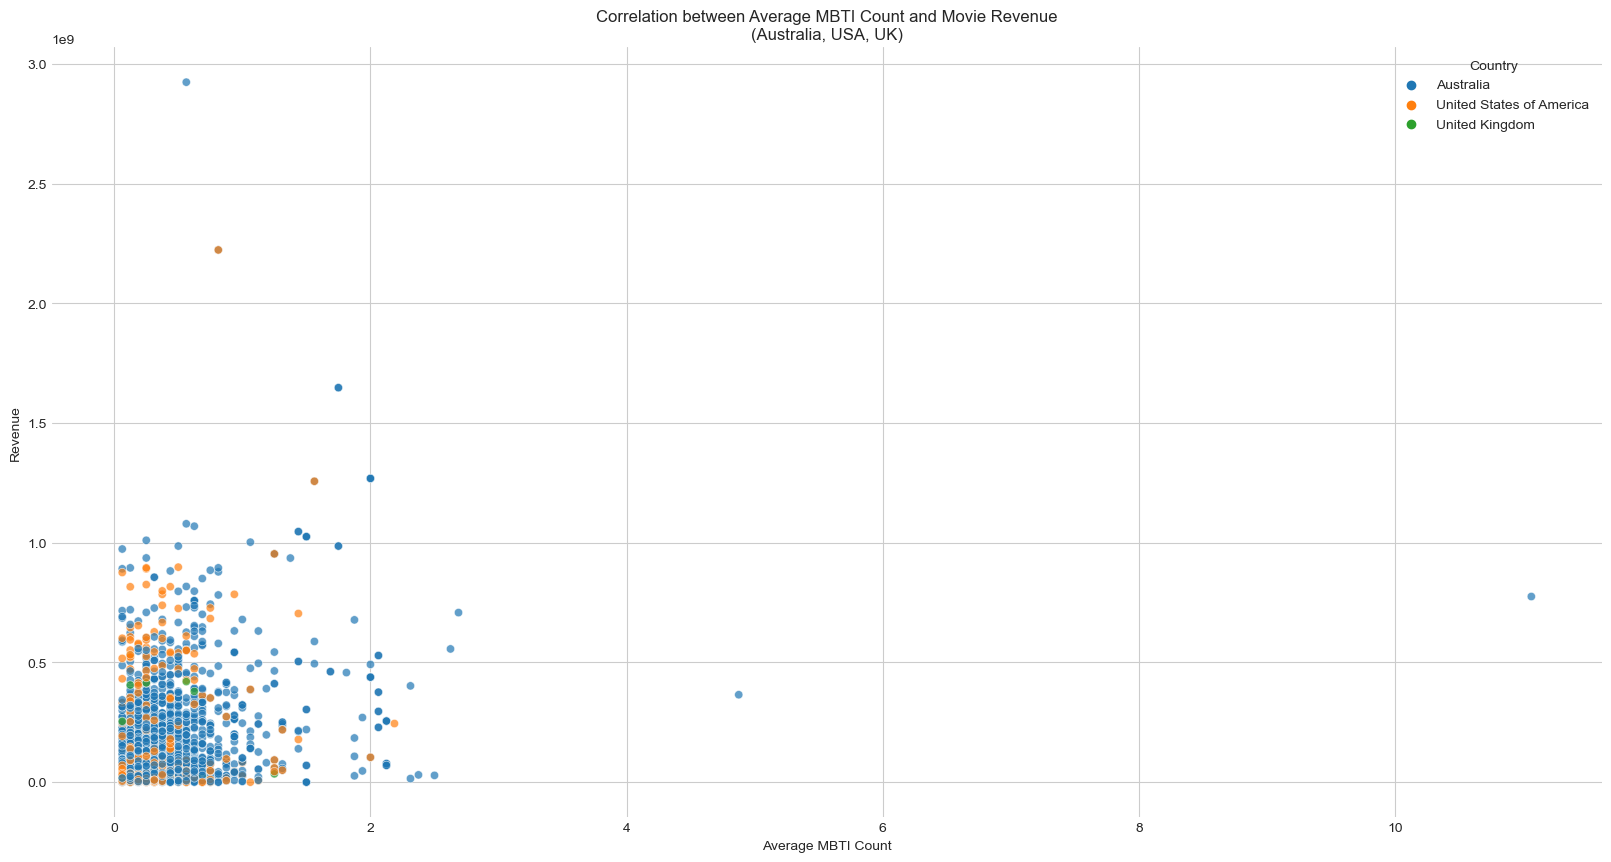

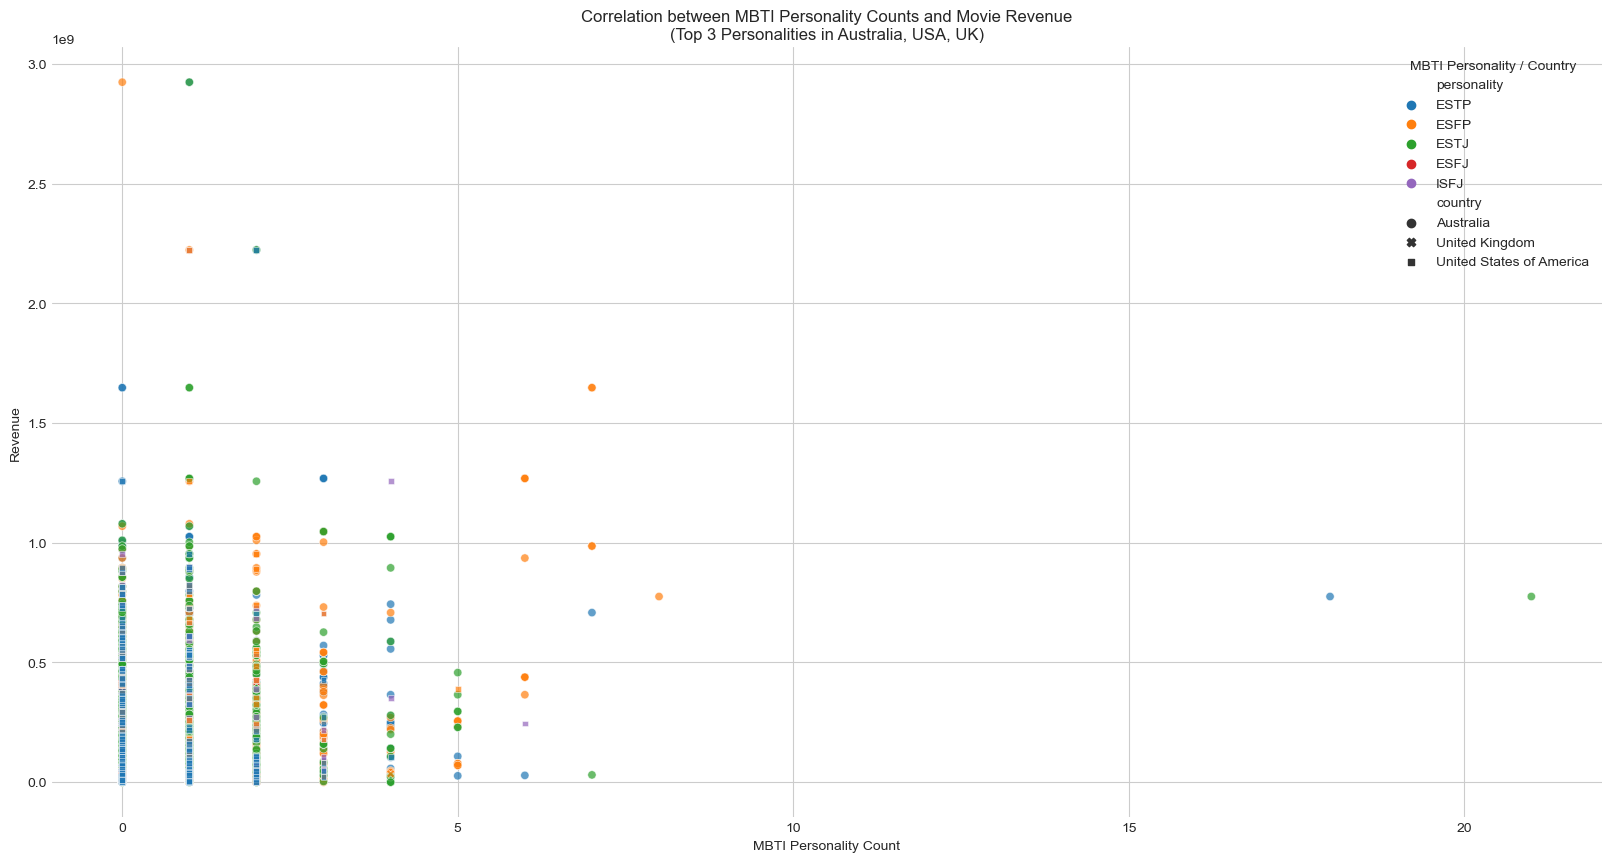

In [65]:
# Filtering the dataset for movies released in Australia, USA, and Japan
filtered_df = df_imdb_mbti[df_imdb_mbti['country'].isin(['Australia', 'United States of America', 'United Kingdom'])]

# Extracting MBTI columns
mbti_columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 
                'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

# Calculating the average count for the 16 MBTI personalities for each movie
filtered_df['average_mbti'] = filtered_df[mbti_columns].mean(axis=1)

# Analyzing the correlation between these average counts and the movie revenues
correlation = filtered_df[['average_mbti', 'revenue']].corr()

# Visualizing the findings
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_df, x='average_mbti', y='revenue', hue='country', alpha=0.7)
plt.title('Correlation between Average MBTI Count and Movie Revenue\n(Australia, USA, UK)')
plt.xlabel('Average MBTI Count')
plt.ylabel('Revenue')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# correlation


# Calculating the average count for each MBTI personality in each country
average_mbti_by_country = filtered_df.groupby('country')[mbti_columns].mean()

# Finding the top 3 personalities with the highest average count in each country
top_mbti_countries = average_mbti_by_country.apply(lambda x: x.nlargest(3).index, axis=1)

# Filtering the dataset for these top 3 personalities in each country
filtered_mbti_data = []
for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        temp_df = filtered_df[['country', 'revenue', mbti]]
        temp_df = temp_df[temp_df['country'] == country]
        temp_df.rename(columns={mbti: 'mbti_count'}, inplace=True)
        temp_df['personality'] = mbti
        filtered_mbti_data.append(temp_df)

filtered_mbti_df = pd.concat(filtered_mbti_data)

# Analyzing the correlation between these MBTI counts and the movie revenues
correlation_mbti_revenue = filtered_mbti_df.groupby('personality')[['mbti_count', 'revenue']].corr().iloc[0::2, -1]

# Visualizing the findings
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_mbti_df, x='mbti_count', y='revenue', hue='personality', style='country', alpha=0.7)
plt.title('Correlation between MBTI Personality Counts and Movie Revenue\n(Top 3 Personalities in Australia, USA, UK)')
plt.xlabel('MBTI Personality Count')
plt.ylabel('Revenue')
plt.legend(title='MBTI Personality / Country')
plt.grid(True)
plt.savefig('images/Geographic/MBTI-Count_Corr_Revenue.png')  # Save the graph as an image file
plt.show()

# correlation_mbti_revenue, top_mbti_countries


### Correlation of MBTI and Revenue

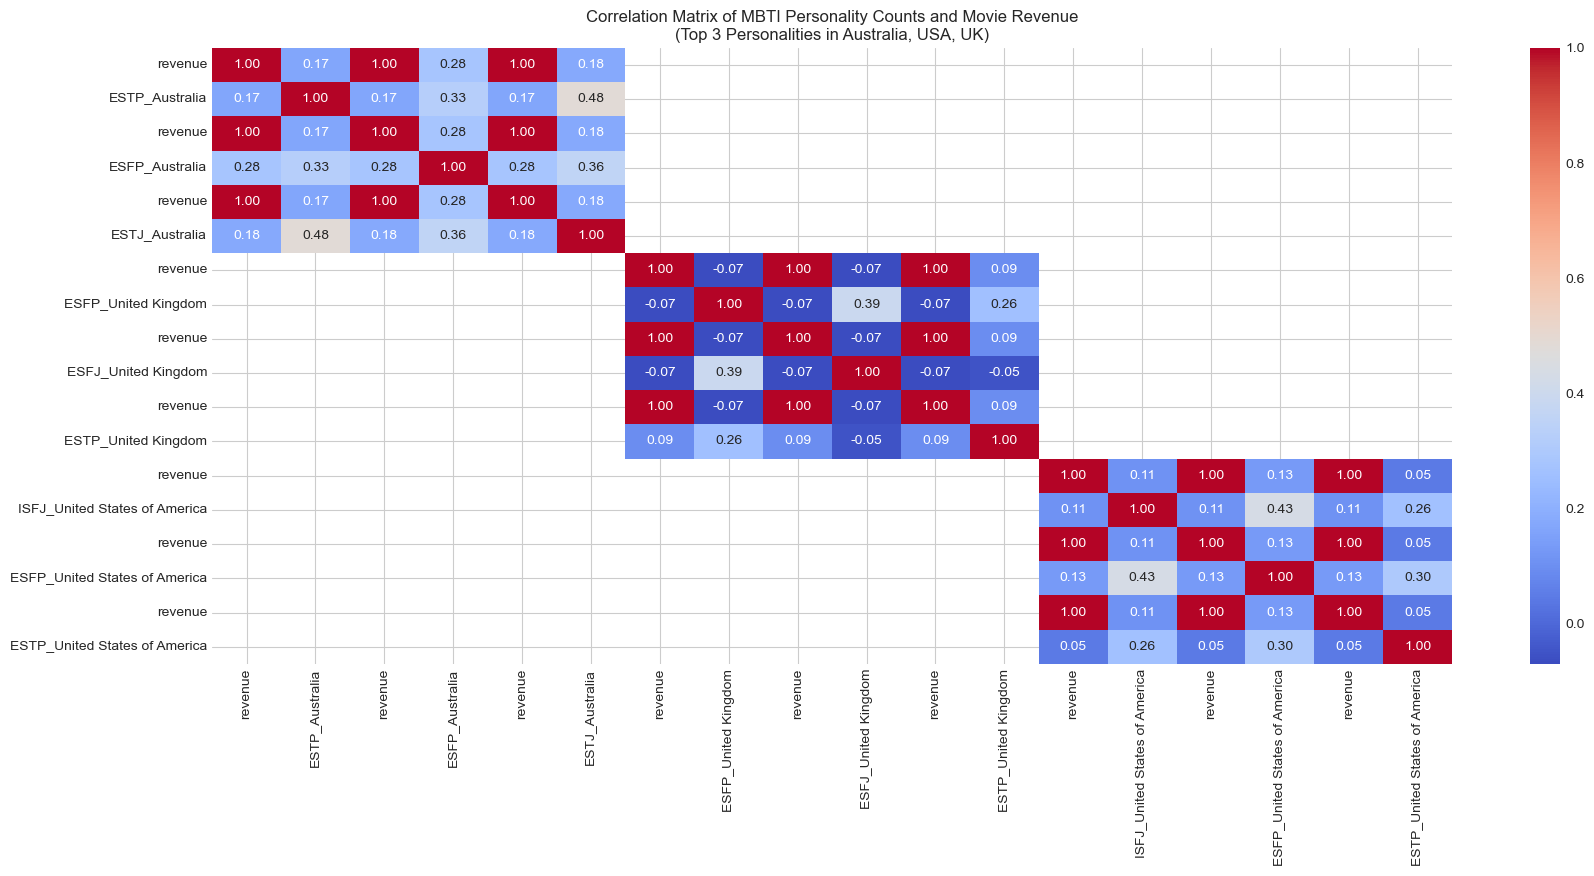

In [66]:
# Creating a new DataFrame for correlation analysis
sns.set_style('whitegrid')
correlation_data = []

for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        country_data = filtered_df[filtered_df['country'] == country]
        correlation_data.append(country_data[['revenue', mbti]].rename(columns={mbti: f"{mbti}_{country}"}))

# Concatenating the data for correlation analysis
correlation_df = pd.concat(correlation_data, axis=1)

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(20, 8))
corr_matrix = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MBTI Personality Counts and Movie Revenue\n(Top 3 Personalities in Australia, USA, UK)')
plt.savefig('images/Geographic/Revenue_Corr_Country.png')  # Save the graph as an image file
plt.show()



### Correlation of MBTI and scores

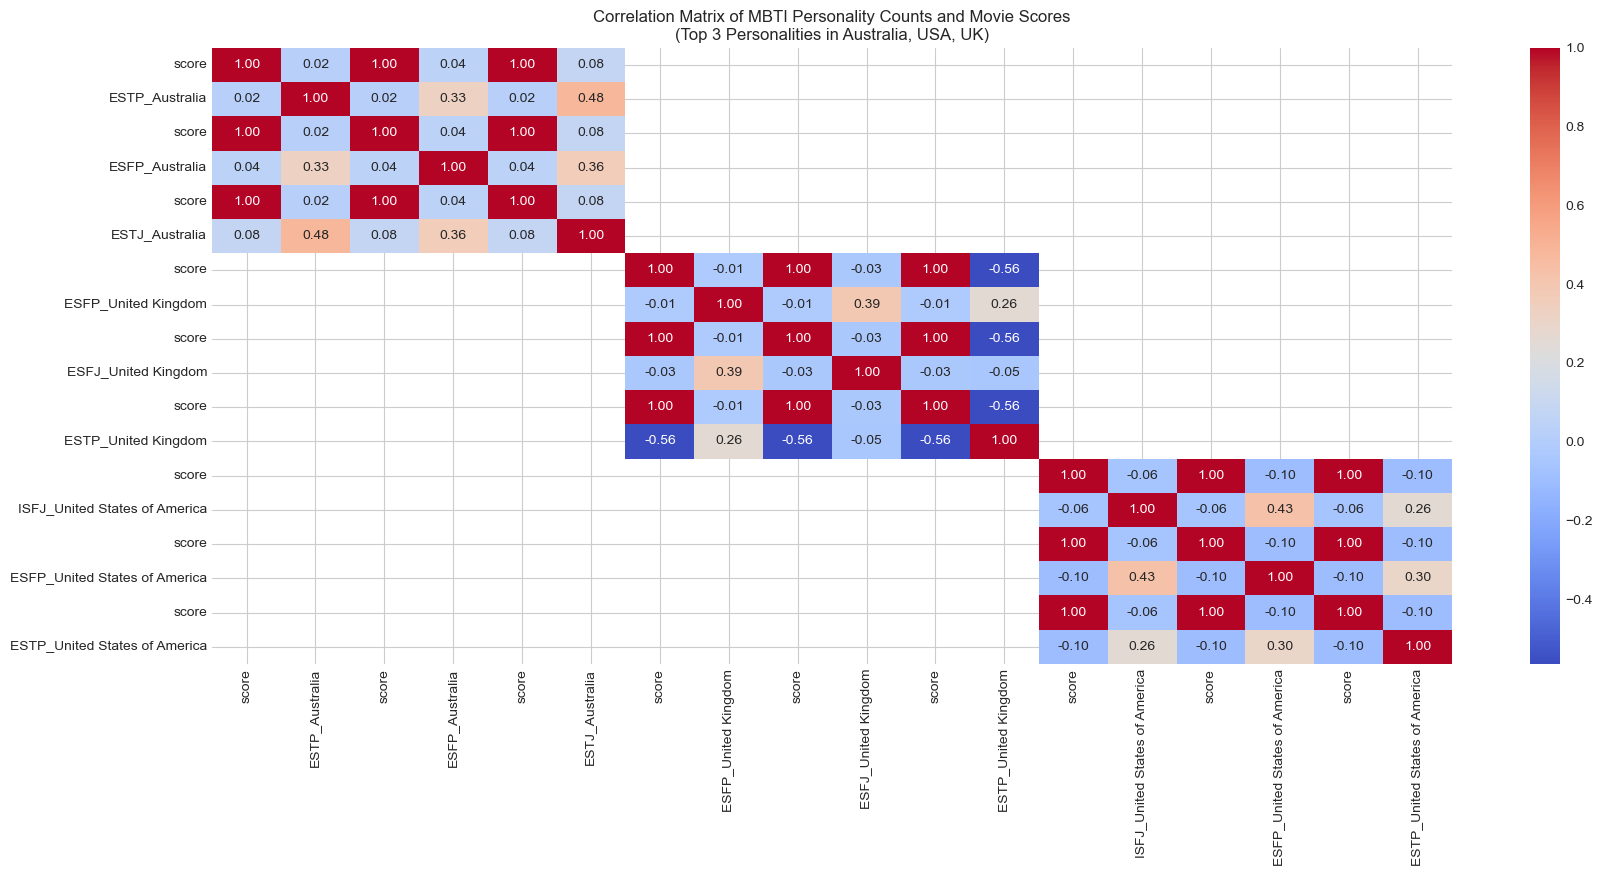

In [67]:
# Creating a new DataFrame for correlation analysis with movie scores
correlation_data_score = []

for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        country_data = filtered_df[filtered_df['country'] == country]
        correlation_data_score.append(country_data[['score', mbti]].rename(columns={mbti: f"{mbti}_{country}"}))

# Concatenating the data for correlation analysis
correlation_df_score = pd.concat(correlation_data_score, axis=1)

# Calculating the correlation matrix
correlation_matrix_score = correlation_df_score.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix_score, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MBTI Personality Counts and Movie Scores\n(Top 3 Personalities in Australia, USA, UK)')
plt.savefig('images/Geographic/Score_Corr_Country.png')  # Save the graph as an image file
plt.show()



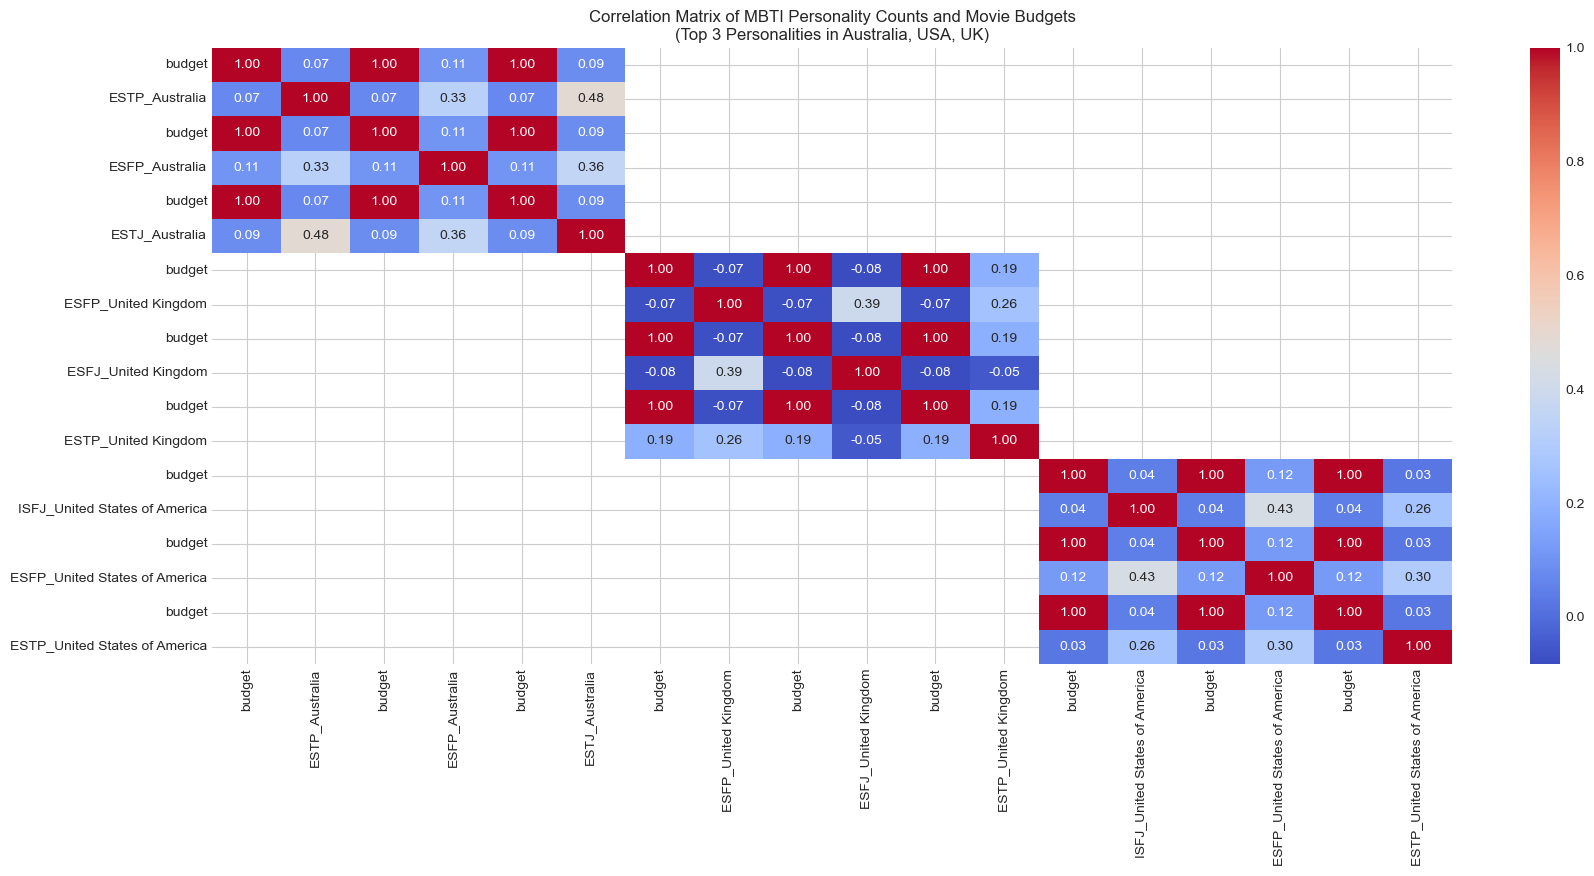

In [68]:
# Creating a new DataFrame for correlation analysis with movie scores
correlation_data_score = []

for country in top_mbti_countries.index:
    for mbti in top_mbti_countries[country]:
        country_data = filtered_df[filtered_df['country'] == country]
        correlation_data_score.append(country_data[['budget', mbti]].rename(columns={mbti: f"{mbti}_{country}"}))

# Concatenating the data for correlation analysis
correlation_df_score = pd.concat(correlation_data_score, axis=1)

# Calculating the correlation matrix
correlation_matrix_score = correlation_df_score.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix_score, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MBTI Personality Counts and Movie Budgets\n(Top 3 Personalities in Australia, USA, UK)')
plt.savefig('images/Geographic/Budgets_Corr_Country.png')  # Save the graph as an image file
plt.show()

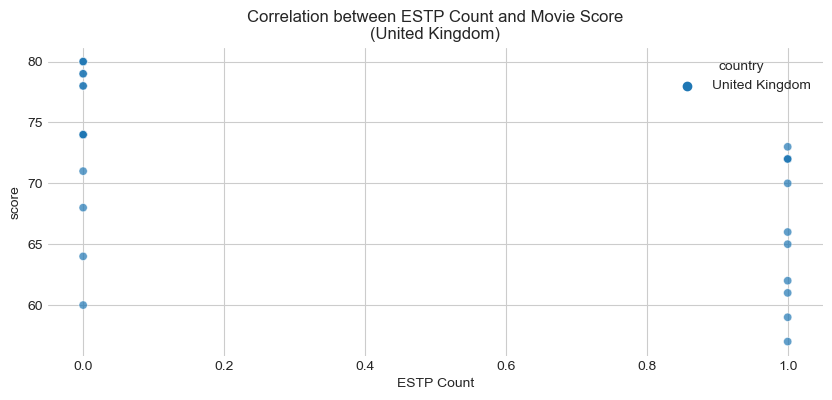

In [69]:
# plot the correlation between score and ESTP in UK
plt.figure(figsize=(10, 4))
sns.scatterplot(data=filtered_df[filtered_df['country'] == 'United Kingdom'], x='ESTP', y='score', hue='country', alpha=0.7)
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom)')
plt.xlabel('ESTP Count')
plt.ylabel('score')
plt.grid(True)
plt.show()

In [70]:
# List the movie with the highest ESTP count in United Kingdom
filtered_df[filtered_df['country'] == 'United Kingdom'].sort_values(by=['ESTP', 'score'], ascending=False).head(10)

movie_name release_date  score  \
9087                 Becoming Jane   2007-03-09   73.0   
7567            Dangerous Liaisons   1989-03-10   72.0   
7568            Dangerous Liaisons   1989-03-10   72.0   
8130                     Jane Eyre   2011-09-09   72.0   
5684                   The Duchess   2008-09-05   70.0   
5541     Girl With A Pearl Earring   2004-01-16   66.0   
4282  Mowgli: Legend Of The Jungle   2018-12-07   65.0   
5942                   Gnome Alone   2018-10-19   62.0   
6699                Mansfield Park   2007-03-18   61.0   
7095                         Creep   2005-01-28   59.0   

                                              genre       budget      revenue  \
9087                                 Romance, Drama   16500000.0   39380831.0   
7567                                 Drama, Romance   24200000.0   10447579.0   
7568                                 Drama, Romance   14000000.0   34700000.0   
8130                                 Drama, Romance   26648000.0   34710627.0   
5684                        Drama, History, Romance   27000000.0   45160110.0   
5541                                 Drama, Romance   12000000.0   43153588.0   
4282                               Adventure, Drama  175000000.0   20267371.6   
5942  Family, Adventure, Animation, Comedy, Fantasy   16740000.0   10800715.0   
6699                                Drama, Tv Movie   62900000.0  414820827.8   
7095                      Horror, Thriller, Mystery  139000000.0  405888913.2   

             country  release_year continent  ENFJ  ...  ESTP  INFJ  INFP  \
9087  United Kingdom        2007.0    Europe   1.0  ...   1.0   0.0   0.0   
7567  United Kingdom        1989.0    Europe   1.0  ...   1.0   0.0   0.0   
7568  United Kingdom        1989.0    Europe   1.0  ...   1.0   0.0   0.0   
8130  United Kingdom        2011.0    Europe   1.0  ...   1.0   1.0   3.0   
5684  United Kingdom        2008.0    Europe   1.0  ...   1.0   0.0   0.0   
5541  United Kingdom        2004.0    Europe   0.0  ...   1.0   0.0   1.0   
4282  United Kingdom        2018.0    Europe   0.0  ...   1.0   1.0   0.0   
5942  United Kingdom        2018.0    Europe   0.0  ...   1.0   0.0   0.0   
6699  United Kingdom        2007.0    Europe   1.0  ...   1.0   0.0   1.0   
7095  United Kingdom        2005.0    Europe   0.0  ...   1.0   0.0   0.0   

      INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP  average_mbti  
9087   0.0   0.0   1.0   0.0   0.0   0.0        0.3125  
7567   0.0   0.0   0.0   0.0   0.0   0.0        0.2500  
7568   0.0   0.0   0.0   0.0   0.0   0.0        0.2500  
8130   0.0   0.0   1.0   0.0   2.0   0.0        1.2500  
5684   0.0   0.0   0.0   1.0   1.0   0.0        0.2500  
5541   1.0   0.0   0.0   0.0   0.0   1.0        0.5000  
4282   1.0   0.0   0.0   2.0   1.0   0.0        0.3750  
5942   0.0   1.0   0.0   1.0   0.0   0.0        0.1875  
6699   0.0   0.0   0.0   0.0   0.0   0.0        0.2500  
7095   0.0   0.0   0.0   0.0   0.0   0.0        0.1250  

[10 rows x 26 columns]

In [71]:
filtered_df[filtered_df['country'] == 'United Kingdom'].sort_values(by=['ESTP', 'score'], ascending=True).head(10)

movie_name release_date  score  \
6707               Dorian Gray   2009-09-09   60.0   
10134  Lady Chatterley'S Lover   2015-09-06   64.0   
888    Lady Chatterley'S Lover   2022-10-14   68.0   
7696                Straw Dogs   1972-01-30   71.0   
2754                   The Fly   1987-02-13   74.0   
3519                    Lolita   1962-09-11   74.0   
3520                    Lolita   1962-09-11   74.0   
6463            The Wicker Man   1973-12-01   74.0   
7213         A Christmas Carol   1984-10-09   74.0   
7736                  Dogville   2004-02-13   78.0   

                                  genre       budget      revenue  \
6707           Fantasy, Drama, Thriller   10500000.0    4706919.0   
10134                    Romance, Drama  102000000.0  254278668.2   
888                      Drama, Romance   68800000.0  226866064.6   
7696             Crime, Drama, Thriller   25000000.0   11253821.0   
2754            Horror, Science Fiction   15000000.0   60629159.0   
3519             Drama, Comedy, Romance   55000000.0    1147784.0   
3520             Drama, Comedy, Romance    2000000.0    9250000.0   
6463                             Horror     810000.0   61653477.2   
7213   Drama, Fantasy, Tv Movie, Family  104200000.0  379238515.8   
7736             Crime, Drama, Thriller   10000000.0   16680836.0   

              country  release_year continent  ENFJ  ...  ESTP  INFJ  INFP  \
6707   United Kingdom        2009.0    Europe   0.0  ...   0.0   0.0   1.0   
10134  United Kingdom        2015.0    Europe   0.0  ...   0.0   0.0   0.0   
888    United Kingdom        2022.0    Europe   0.0  ...   0.0   0.0   0.0   
7696   United Kingdom        1972.0    Europe   0.0  ...   0.0   0.0   0.0   
2754   United Kingdom        1987.0    Europe   0.0  ...   0.0   0.0   0.0   
3519   United Kingdom        1962.0    Europe   0.0  ...   0.0   1.0   0.0   
3520   United Kingdom        1962.0    Europe   0.0  ...   0.0   1.0   0.0   
6463   United Kingdom        1973.0    Europe   1.0  ...   0.0   0.0   0.0   
7213   United Kingdom        1984.0    Europe   2.0  ...   0.0   2.0   1.0   
7736   United Kingdom        2004.0    Europe   0.0  ...   0.0   1.0   0.0   

       INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP  average_mbti  
6707    0.0   0.0   0.0   0.0   0.0   0.0        0.1875  
10134   0.0   1.0   0.0   0.0   0.0   0.0        0.0625  
888     0.0   1.0   0.0   0.0   0.0   0.0        0.0625  
7696    0.0   1.0   0.0   0.0   0.0   0.0        0.0625  
2754    0.0   1.0   0.0   0.0   0.0   0.0        0.1250  
3519    0.0   1.0   0.0   1.0   0.0   0.0        0.5000  
3520    0.0   1.0   0.0   1.0   0.0   0.0        0.5000  
6463    0.0   0.0   0.0   0.0   1.0   0.0        0.2500  
7213    2.0   0.0   1.0   0.0   1.0   0.0        0.6250  
7736    1.0   0.0   0.0   0.0   0.0   0.0        0.1875  

[10 rows x 26 columns]

### ESTP and movie score, focus on UK

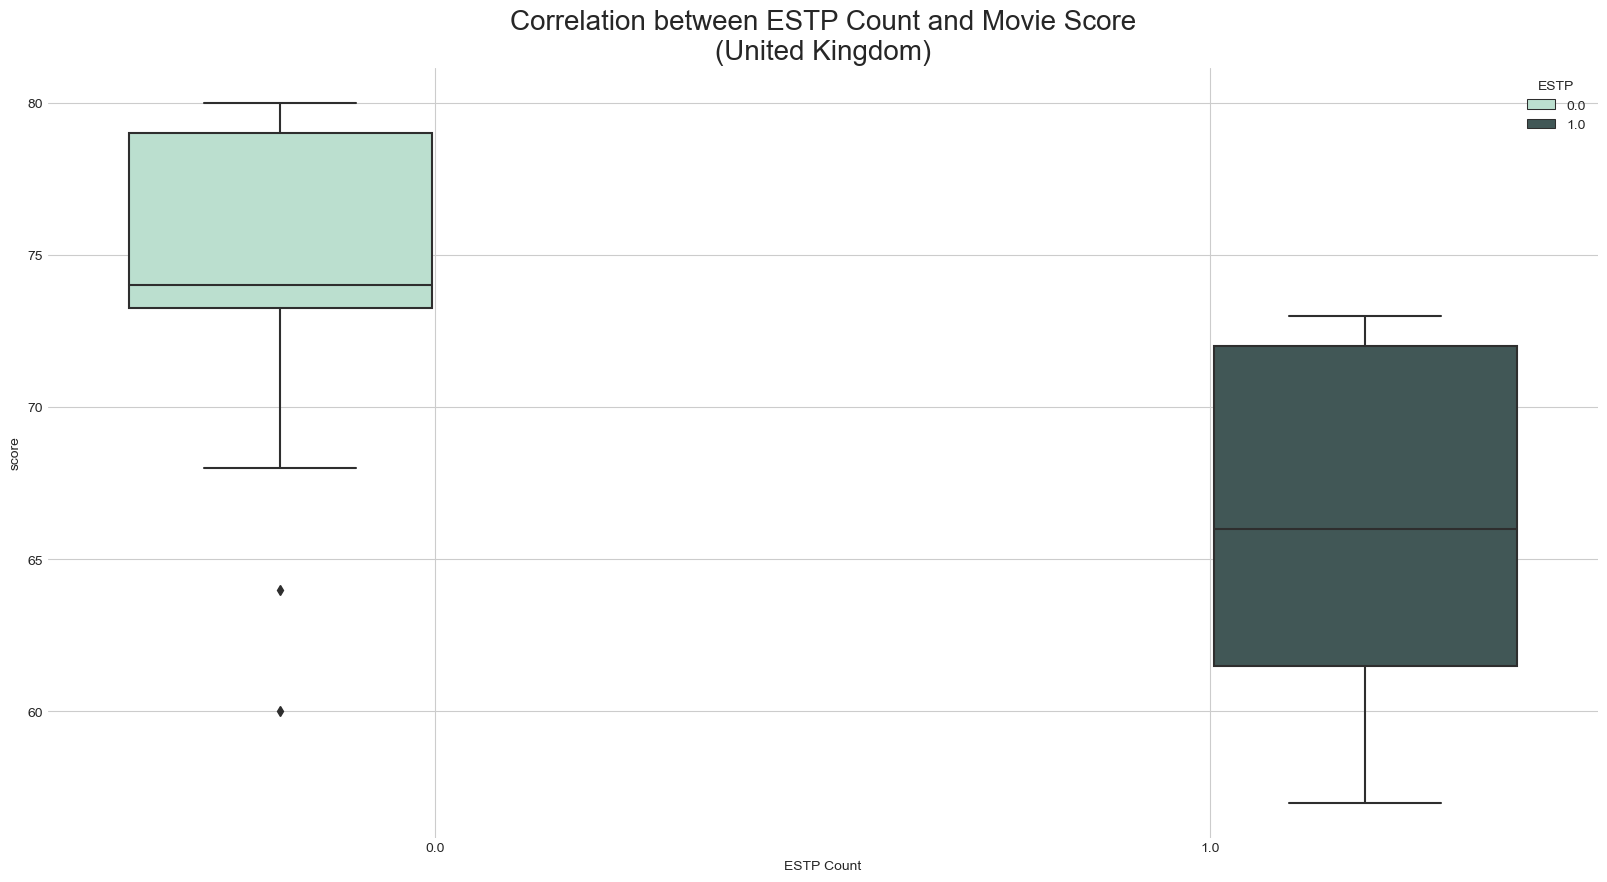

In [72]:
# Plot the boxplot of score in UK with and without ESTP
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df[filtered_df['country'] == 'United Kingdom'], x='ESTP', y='score', hue='ESTP', palette=["#B5E5CF", "#3D5B59"])
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom)', fontsize=20,)
plt.xlabel('ESTP Count')
plt.ylabel('score')
plt.grid(True)
plt.savefig('images/Geographic/ESTP_Score_UK.png')  # Save the graph as an image file

plt.show()

In [73]:
# Filter out the movie genres that contain 'Romance' and do not have NaN values
filtered_df_romance = filtered_df[filtered_df['genre'].str.contains('Romance') & filtered_df['genre'].notna()]
filtered_df_romance.head()

movie_name release_date  score  \
132        Life In A Year   2020-11-27   83.0   
216    The Little Mermaid   2023-05-26    0.0   
247  Fifty Shades Of Grey   2015-02-12   59.0   
309               Titanic   1997-12-18   79.0   
330         Me Before You   2016-06-16   79.0   

                                   genre       budget       revenue  \
132                       Drama, Romance   90000000.0  6.278511e+08   
216  Adventure, Family, Fantasy, Romance  205000000.0  1.783599e+08   
247             Drama, Romance, Thriller   40000000.0  5.707950e+08   
309                       Drama, Romance  200000000.0  2.222986e+09   
330                       Drama, Romance   20000000.0  2.080649e+08   

                      country  release_year      continent  ENFJ  ...  ESTP  \
132  United States of America        2020.0  North America   1.0  ...   0.0   
216  United States of America        2023.0  North America   0.0  ...   2.0   
247                 Australia        2015.0        Oceania   0.0  ...   3.0   
309                 Australia        1997.0        Oceania   0.0  ...   2.0   
330                 Australia        2016.0        Oceania   0.0  ...   0.0   

     INFJ  INFP  INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP  average_mbti  
132   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0        0.3125  
216   0.0   2.0   1.0   0.0   3.0   2.0   2.0   3.0        1.4375  
247   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0        0.6875  
309   1.0   0.0   0.0   0.0   1.0   1.0   3.0   0.0        0.8125  
330   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0        0.1875  

[5 rows x 26 columns]

### Focus on Romance Genre in UK

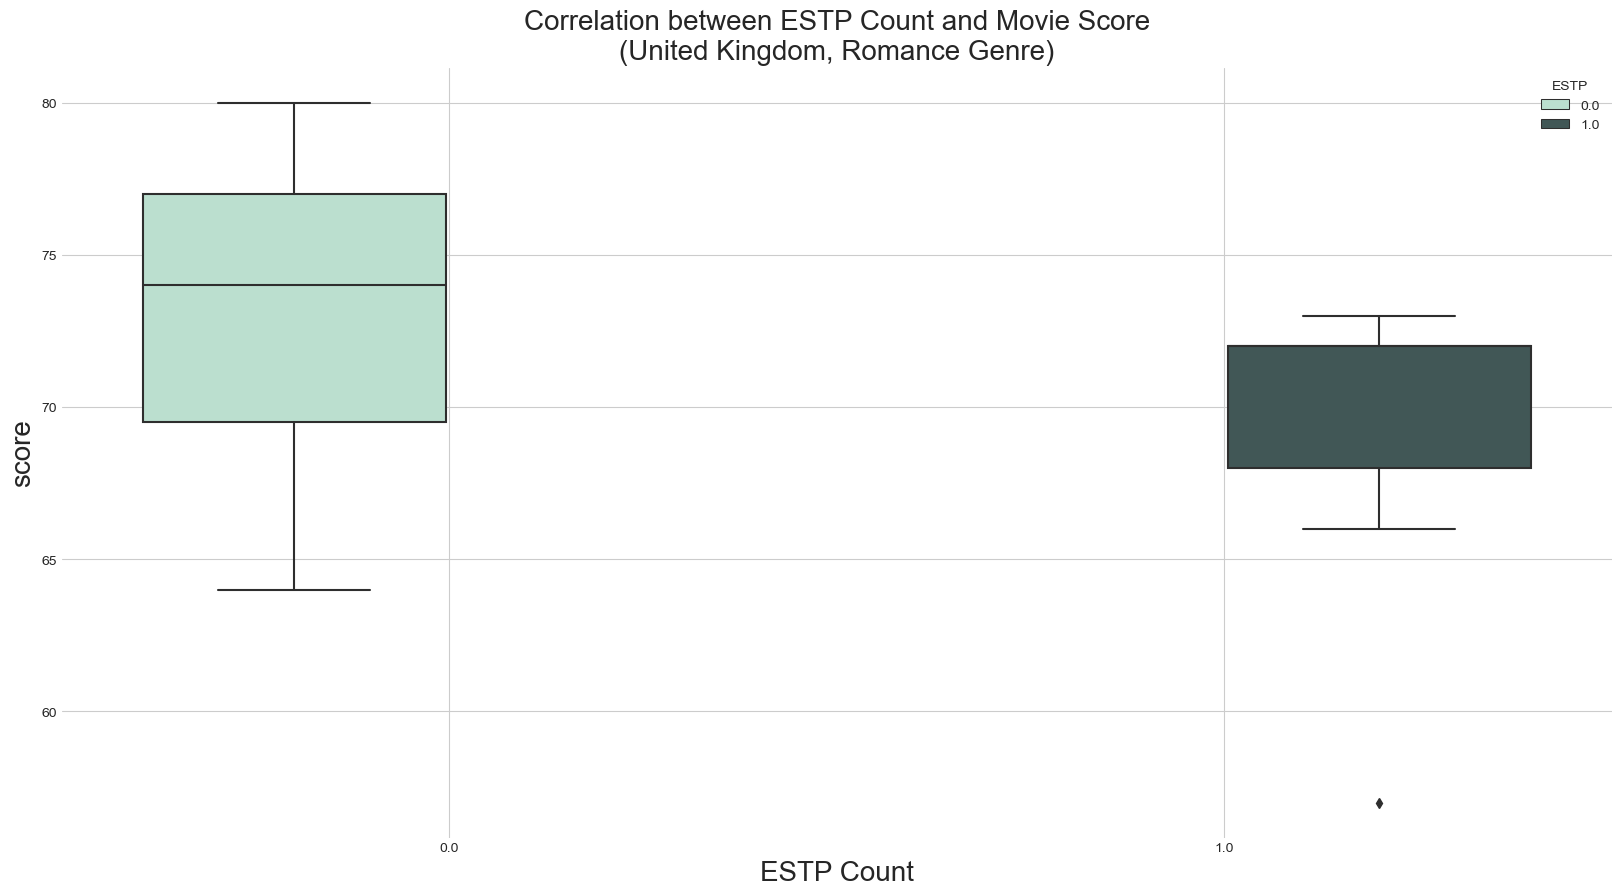

In [74]:
# Draw the boxplot of score in UK with and without ESTP
plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_df_romance[filtered_df_romance['country'] == 'United Kingdom'], x='ESTP', y='score', hue='ESTP', palette=["#B5E5CF", "#3D5B59"])
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom, Romance Genre)', fontsize=20)
plt.xlabel('ESTP Count', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.grid(True)
plt.savefig('images/Geographic/ESTP_Romance_UK.png')  # Save the graph as an image file
plt.show()


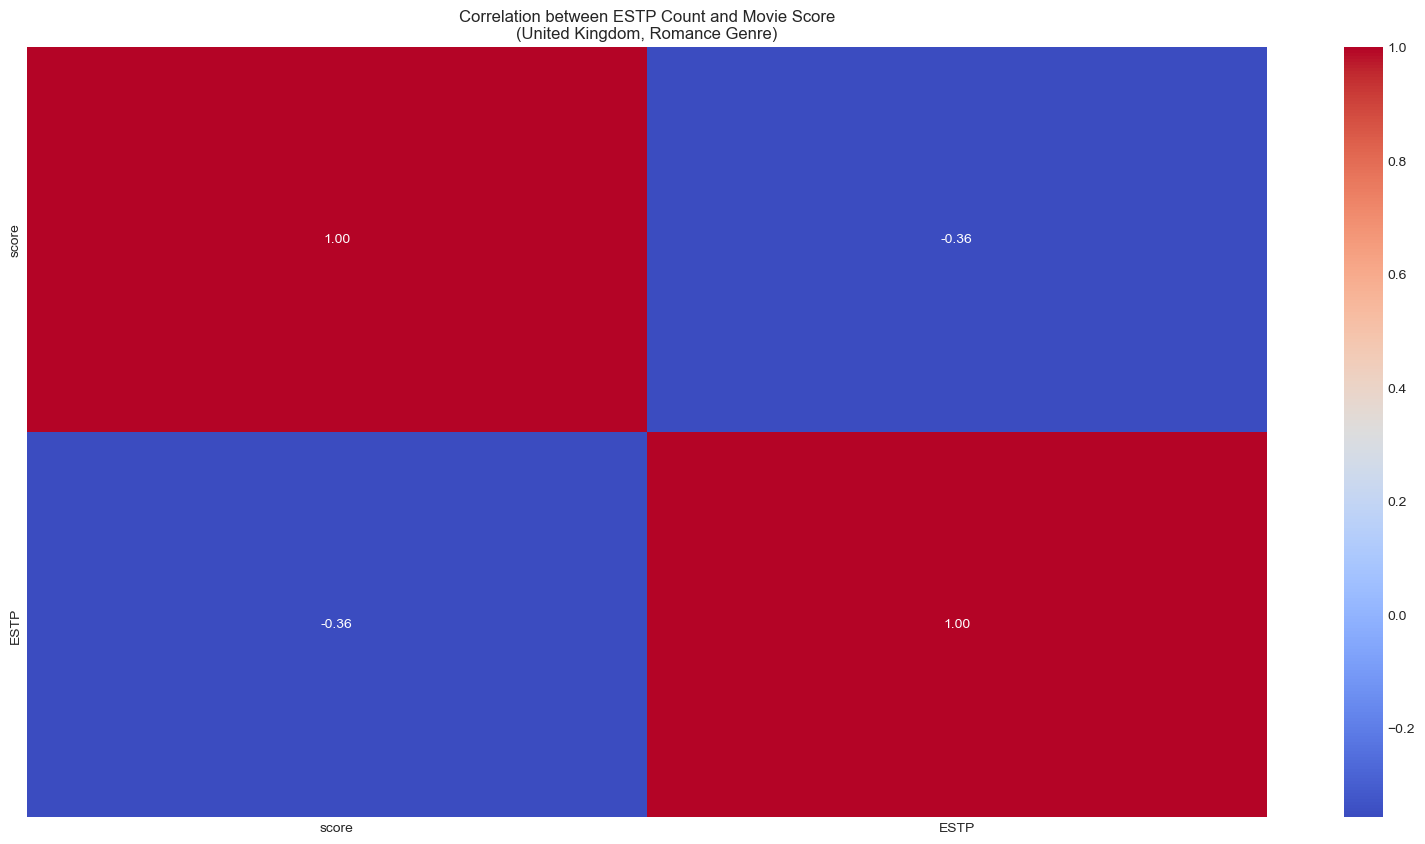

In [75]:
# Draw the correlation matrix of score and ESTP in UK
plt.figure(figsize=(20, 10))
sns.heatmap(filtered_df_romance[filtered_df_romance['country'] == 'United Kingdom'][['score', 'ESTP']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom, Romance Genre)')
plt.savefig('images/Geographic/ESTP_Romance_UK_heatmap.png')  # Save the graph as an image file
plt.show()

### Zoom out to top3 landscape

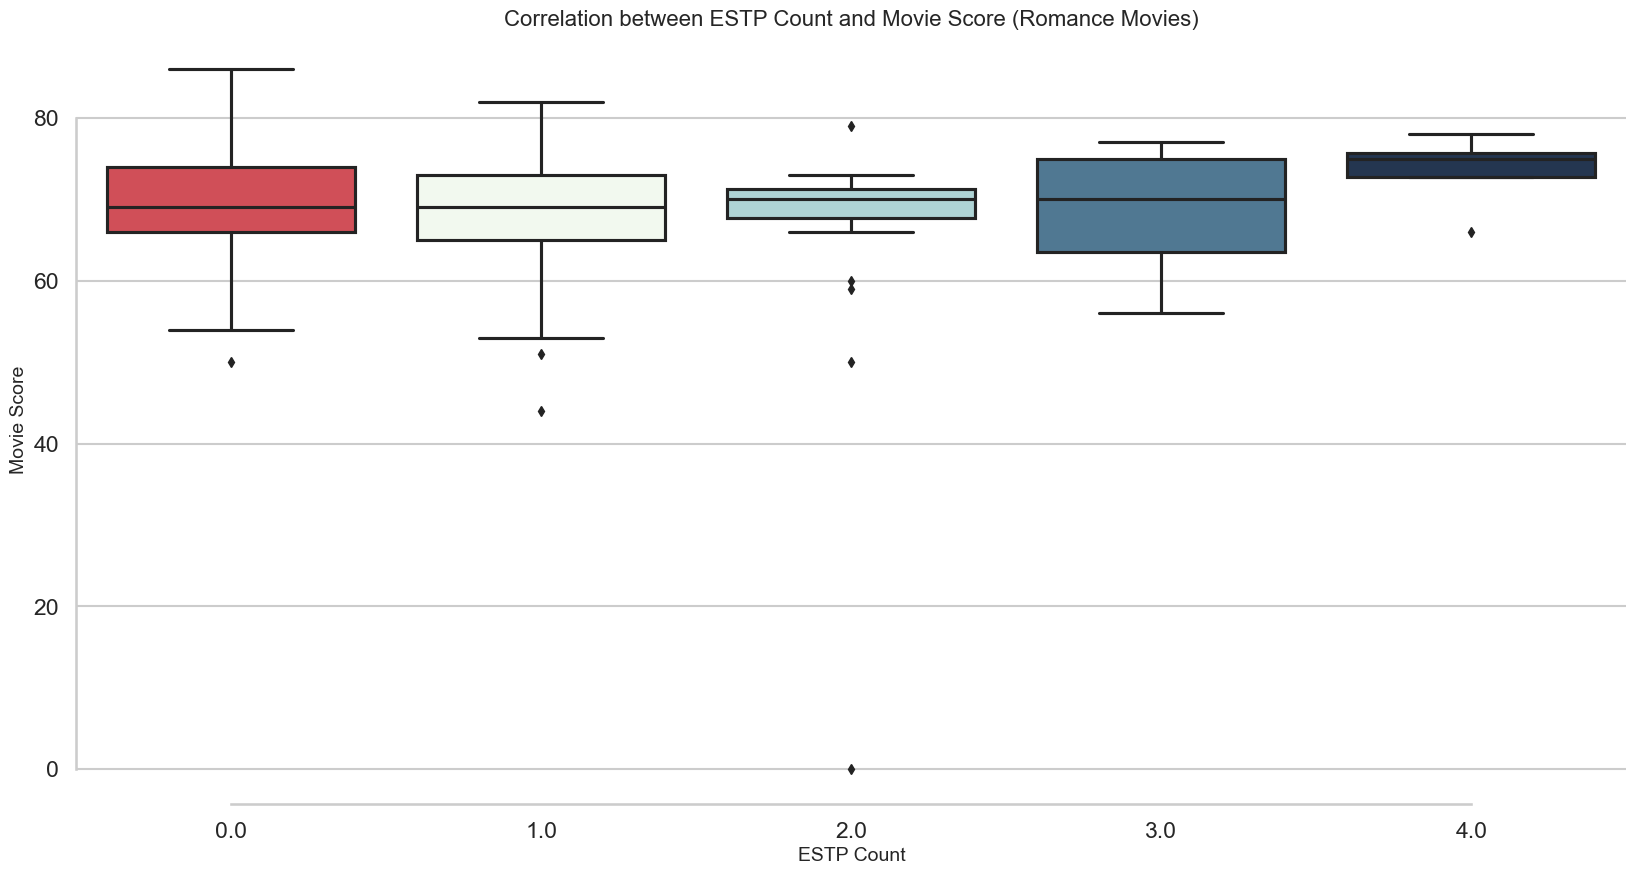

In [76]:
# # Plot the boxplot of score over the world with and without ESTP
# plt.figure(figsize=(10, 4))
# sns.boxplot(data=filtered_df_romance, x='ESTP', y='score')
# plt.title('Correlation between ESTP Count and Movie Score\n(Romance Movies)')
# plt.xlabel('ESTP Count')
# plt.ylabel('score')
# plt.grid(True)
# plt.show()


# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Set the context to "talk" for larger fonts and lines
sns.set_context('talk')

# Choose a nice color palette
sns.set_palette('pastel')

# Create the boxplot with Seaborn
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='ESTP', y='score', data=filtered_df_romance, palette=["#E63946", "#F1FAEE", "#A8DADC", "#457B9D", "#1D3557"])

# Despine the plot
sns.despine(trim=True)

# Set the labels and title
ax.set_xlabel('ESTP Count', fontsize=14)
ax.set_ylabel('Movie Score', fontsize=14)
ax.set_title('Correlation between ESTP Count and Movie Score (Romance Movies)', fontsize=16)
plt.savefig('images/Geographic/ESTP_Romance_Country.png')  # Save the graph as an image file

In [77]:
# Calculate the length of the movie in Europe but not in UK
filtered_df[filtered_df['continent'] == 'Europe']['country'].nunique()

1

In [78]:
# Filter out the movie genres that contain 'Thriller' and do not have NaN values
filtered_df_dramma = filtered_df[filtered_df['genre'].str.contains('Drama') & filtered_df['genre'].notna()]
filtered_df_dramma.head()

movie_name release_date  score                genre  \
58           A Bronx Tale   1994-05-20   78.0         Drama, Crime   
109  The Ten Commandments   1958-12-12   78.0       Drama, History   
110  The Ten Commandments   1958-12-12   78.0       Drama, History   
115                 Creed   2015-11-26   74.0                Drama   
127         Hacksaw Ridge   2016-10-07   82.0  Drama, History, War   

         budget      revenue    country  release_year continent  ENFJ  ...  \
58   10000000.0   17287898.0  Australia        1994.0   Oceania   0.0  ...   
109  13500000.0   85433929.0  Australia        1958.0   Oceania   1.0  ...   
110  10000000.0    1051907.0  Australia        1958.0   Oceania   1.0  ...   
115  37000000.0  173567581.0  Australia        2015.0   Oceania   0.0  ...   
127  40000000.0  169023926.0  Australia        2016.0   Oceania   1.0  ...   

     ESTP  INFJ  INFP  INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP  average_mbti  
58    0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0         0.375  
109   0.0   0.0   0.0   0.0   0.0   2.0   1.0   2.0   0.0         0.500  
110   0.0   0.0   0.0   0.0   0.0   2.0   1.0   2.0   0.0         0.500  
115   0.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0         0.125  
127   1.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0         0.375  

[5 rows x 26 columns]

### Focus on Drama

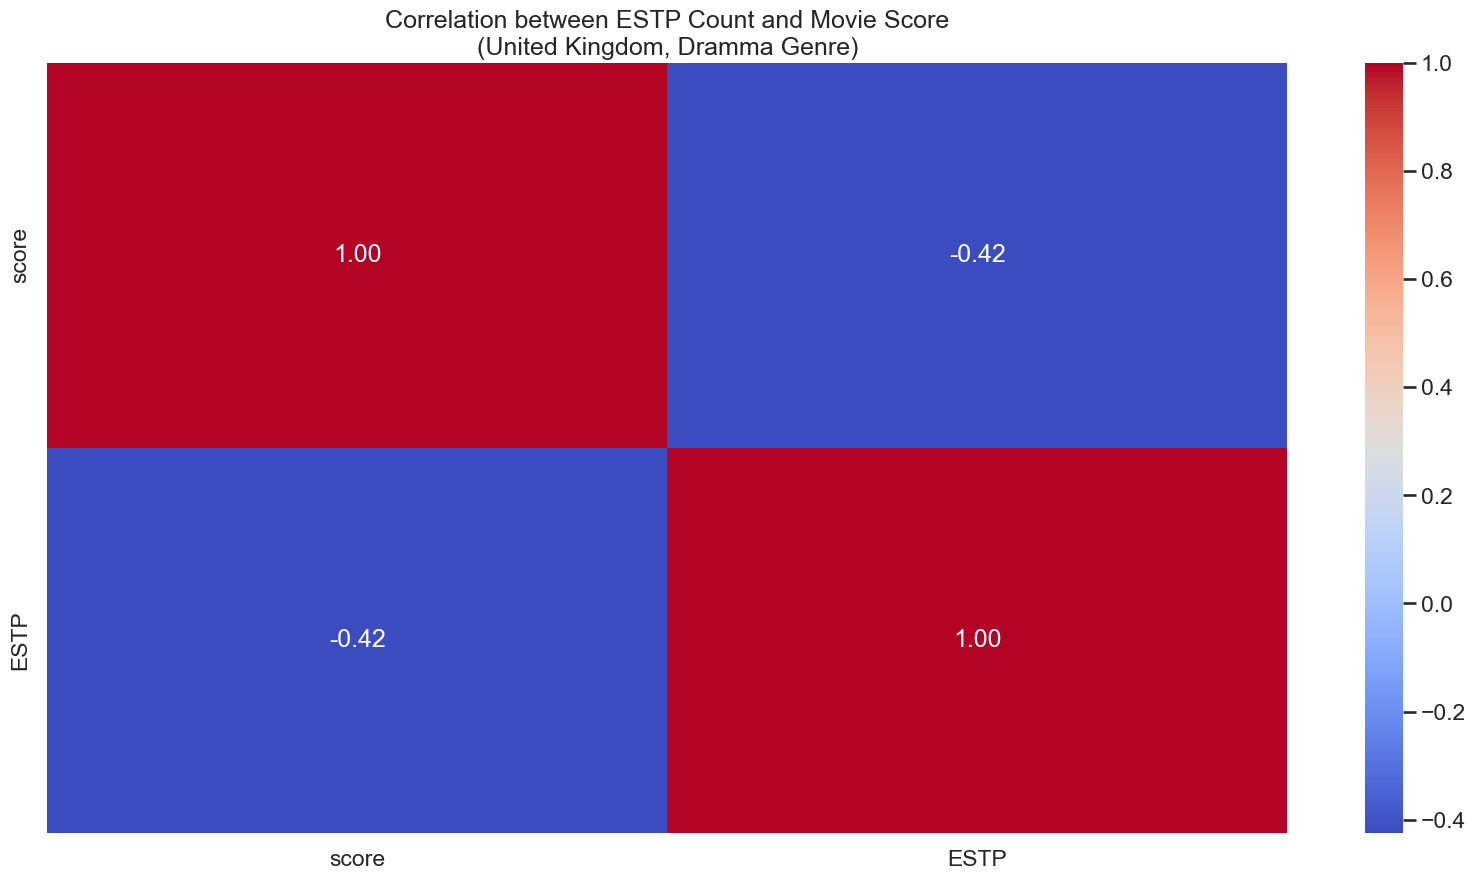

In [79]:
# Draw the correlation matrix of score and ESTP in UK
plt.figure(figsize=(20, 10))
sns.heatmap(filtered_df_dramma[filtered_df_dramma['country'] == 'United Kingdom'][['score', 'ESTP']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between ESTP Count and Movie Score\n(United Kingdom, Dramma Genre)')
plt.savefig('images/Geographic/ESTP_Drama_UK_heatmap.png')  # Save the graph as an image file
plt.show()

### Zoom out to global landscape

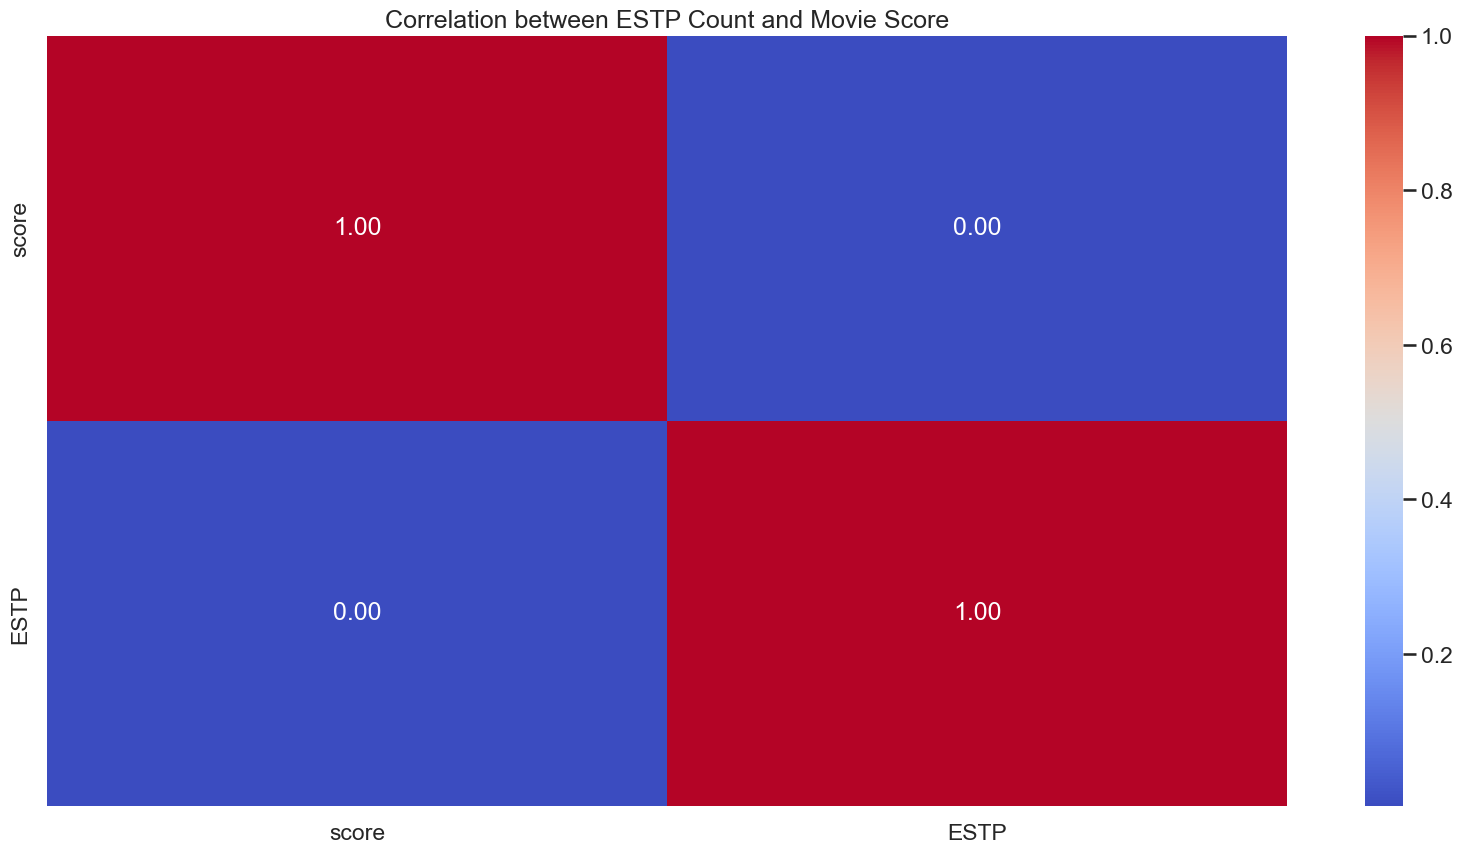

In [80]:
# Plot the correlation matrix of score and ESTP over the world
plt.figure(figsize=(20, 10))
sns.heatmap(df_imdb_mbti[['score', 'ESTP']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between ESTP Count and Movie Score')
plt.show()